Participants: 
- August Høgsted, s204630 
- Clara Regine Hoeg Kold, s204623 
- Emma Christine Berggrein Andersen, s204605 
- Fridtjof Cerup-Simonsen, s204625 

# Table of Content
Section 1: **Introduction + Data Analysis \& Visualizations**<br> <br>
Section 2: **Exploratory Component** <br> <br>
Section 3: **Prediction Challenge**<br> <br>
Section 4: **Conclusions**<br> <br>

# Section 1: Introduction + Data Analysis \& Visualizations

In the first section of the report, a brief introduction will be made. The purpose of the introduction is:
1. **Data collection**: Importing the needed tools and the data <br> <br>
2. **Data cleaning**: Adjusting data-types and removing missing data and outliers (with focus on timeduration)  <br> <br>
3. **Visualizations**: A few visualizations will be presented to get an overview of the data before the EDA and prediciton challenge begin <br> <br>
4. **Data Pre-processing**: Selecting the most appropriate features and transformation and splitting of data  <br> <br>


#### 1. Data Collection

In [1]:
# Import the necessary libraries
import pandas as pd 
import numpy as np
from keras import regularizers
import datetime as dt
from keras.callbacks import EarlyStopping
import seaborn as sns; sns.set()
from scipy import stats
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
%matplotlib inline 
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score
import time
import os
import csv
import seaborn as sns
import matplotlib.pyplot as plt
#import plotly.express as px


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense, Dropout

from keras.losses import mean_squared_error
from keras.optimizers import Adam

from sklearn.metrics import confusion_matrix, recall_score, accuracy_score, precision_score


# Suppress pandas SettingWithCopyWarnings
pd.options.mode.chained_assignment = None  # Suppress warnings

: 

In [302]:
# Reading Raw Data
#raw_data = pd.read_csv("/Users/fridtjofcerup-simonsen/Library/CloudStorage/OneDrive-DanmarksTekniskeUniversitet/Intro BA/Proj/Trips_2018.csv")
#df = raw_data

df = pd.read_csv("/Users/clarareginekold/Desktop/DTU/42577 Introduction to Business Analytics/Project/Trips_2018.csv")

# First few samples of the dataset:
df.head()

ParserError: Error tokenizing data. C error: Calling read(nbytes) on source failed. Try engine='python'.

#### 2. Data Cleaning

We ensure all features have the appropriate data type

In [ ]:
df.dtypes

Unnamed: 0                   int64
tripduration                 int64
starttime                   object
stoptime                    object
start_station_id           float64
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_latitude       float64
end_station_longitude      float64
bikeid                       int64
usertype                    object
birth_year                   int64
gender                       int64
dtype: object

In [ ]:
# Change type to datetime
df['starttime'] = pd.to_datetime(df['starttime'], format = "%Y-%m-%d %H:%M:%S.%f") # change format to datatime
df['stoptime'] = pd.to_datetime(df['stoptime'], format = "%Y-%m-%d %H:%M:%S.%f") # change format to datatime

First we check for missing values and we see that there are 2497 NaN values for station IDs. This is almost 0,0\% of the dataset, so they are simply removed.

In [ ]:
df.isnull().sum()

#Sample of datapoints that have NaN
#df.loc[df["end_station_id"].isnull()].head()

Unnamed: 0                    0
tripduration                  0
starttime                     0
stoptime                      0
start_station_id           2497
start_station_latitude        0
start_station_longitude       0
end_station_id             2497
end_station_latitude          0
end_station_longitude         0
bikeid                        0
usertype                      0
birth_year                    0
gender                        0
dtype: int64

In [ ]:
# We remove these 2497 rows
df = df.dropna()

We make sure there are no duplicates

In [ ]:
#There are no duplicates 
df.duplicated().sum()

0

As a next step, we investigate the tripduration to make sure outliers are handled correctly before prediction challenge. 

In [ ]:
# Calculate basic statistics for tripduration
df['tripduration'].describe()

count    1.754584e+07
mean     9.884746e+02
std      1.889591e+04
min      6.100000e+01
25%      3.580000e+02
50%      6.050000e+02
75%      1.060000e+03
max      1.951005e+07
Name: tripduration, dtype: float64

The field 'tripduration' has a lot of ourlier as the IQR spans in the range [358;1060] while the max tripduration recorded is 19510050. We choose to remove two percent outliers:

In [ ]:
Q2 = np.percentile(df['tripduration'], 2)
Q98 = np.percentile(df['tripduration'], 98)
range = Q98 - Q2

# Define lower and upper bounds
lower_bound = Q2 -  range
upper_bound = Q98 +  range

# Filter the training data to keep only the data points within the range
df_old = df #We keep the old df for visualizations
df = df[(df['tripduration'] >= lower_bound) & (df['tripduration'] <= upper_bound)]

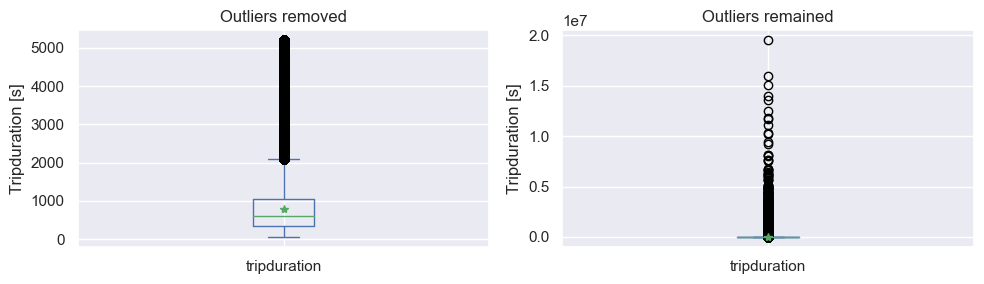

In [ ]:
#Plot settings
fig, axes = plt.subplots(1, 2, figsize=(10, 3))

# Boxplots for Outliers removed
df[['tripduration']].plot(kind='box', ax=axes[0], showmeans=True, meanprops={'marker': '*'})
axes[0].set_title('Outliers removed')
axes[0].set_ylabel('Tripduration [s]')
axes[0].grid(True)

# Boxplots for Outliers remained
df_old[['tripduration']].plot(kind='box', ax=axes[1], showmeans=True, meanprops={'marker': '*'})
axes[1].set_title('Outliers remained')
axes[1].set_ylabel('Tripduration [s]')
axes[1].grid(True)

#Plotting
plt.tight_layout()
plt.show()

The above boxplots show the range of 'tripduration' before and after outliers has been removed. Going forward we will investigate the data set without outliers

In [ ]:
#Plot settings
fig, axes = plt.subplots(1, 2, figsize=(10, 3))

# Boxplots for Outliers removed
sns.histplot(df['tripduration'], kde=True, ax=axes[0])
axes[0].set_title('Outliers removed')
axes[0].set_ylabel('Tripduration [s]')
axes[0].grid(True)

# Boxplots for Outliers remained
sns.histplot(df_old['tripduration'], kde=True, ax=axes[1])
axes[1].set_title('Outliers remained')
axes[1].set_ylabel('Tripduration [s]')
axes[1].grid(True)

#Plotting
plt.tight_layout()
plt.show()

KeyboardInterrupt: 

#### 3. Visualizations

Now that the data is collected and cleaned properly, a few visualizations of the data will be presented below

In [ ]:
# Basic numbers for dataset
num_stations = df['start_station_id'].nunique()
num_trips = len(df)
num_bikes = df['bikeid'].nunique()

print(f"Number of Stations: {num_stations}")
print(f"Number of Trips: {num_trips}")
print(f"Number of Bikes: {num_bikes}")

Number of Stations: 818
Number of Trips: 17458474
Number of Bikes: 15009


To get better overview of where the stations are located, we create an interactive HeatMap (package: plotly).

In [ ]:
#We groupby each start station and count the number of occurences
heatmap_data = df.groupby(['start_station_latitude', 'start_station_longitude']).size().reset_index(name='count')

# Create heatmap
fig = px.density_mapbox(heatmap_data, lat='start_station_latitude', lon='start_station_longitude', z='count', 
                        center=dict(lat=40.7320, lon=-74.0007), zoom=12, 
                        mapbox_style="open-street-map", range_color=[0, heatmap_data['count'].max()])

#Plotting
fig.update_layout(width=800, height=800, autosize=False)
fig.show()

To get a better view of how much each bike is used, we create a histogram. The histogram below shows how the majority of bikes average around 1100-1200 trips each year. 

In [ ]:
import plotly.express as px

# Group by 'bikeid' to get the count of trips for each bike
bike_trip_counts = df.groupby('bikeid').size().reset_index(name='trip_counts')

# Calculate average trips per bike for the red line
avg_trips = bike_trip_counts['trip_counts'].mean()

#Plotting
fig = px.histogram(bike_trip_counts, x='trip_counts', nbins=50, 
                   title='Distribution of Trips per Bike', 
                   labels={'trip_counts':'Number of Trips'})

#Vertical line for average trips per bike
fig.add_shape(
    type='line',
    x0=avg_trips,
    x1=avg_trips,
    y0=0,
    y1=1,
    yref='paper',
    line=dict(color='red')
)
fig.show()


In the next visualizations, we look at the user-profiles. We see that the majority of users are men and subscribtion based. 

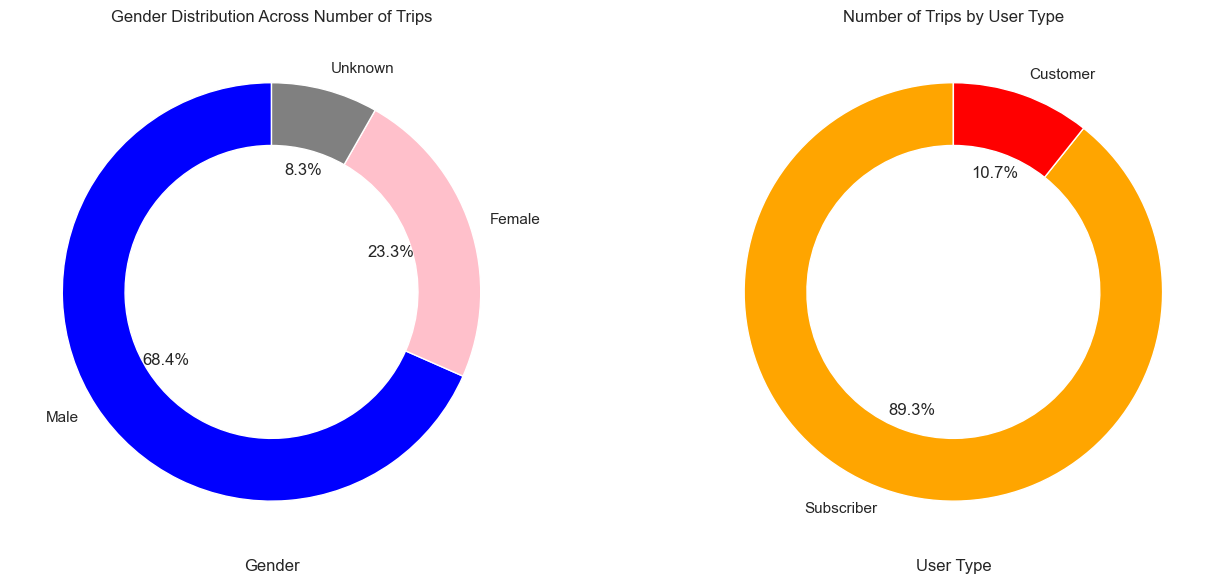

In [ ]:
#Plot settings
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

#Couting for each gender
gender_dict = {1: 'Male', 2: 'Female', 0: 'Unknown'}
df['gender'].replace(gender_dict, inplace=True)
gender_counts = df['gender'].value_counts()
user_types = df['usertype'].value_counts()


# Gender Distribution
gender_counts.plot(ax=ax[0], kind='pie', colors=['blue', 'pink', 'gray'], autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.3))
ax[0].set_title('Gender Distribution Across Number of Trips')
ax[0].set_ylabel('')
ax[0].set_xlabel('Gender')

# User type
user_types.plot(ax=ax[1], kind='pie', colors=['orange', 'red'], autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.3))
ax[1].set_title('Number of Trips by User Type')
ax[1].set_ylabel('') #Removing y axis
ax[1].set_xlabel('User Type')

#Plotting
plt.tight_layout()
plt.show()


In the next visualization the genders are further split into their age. Most of the users are centered around age 30. However, here there also seems to be a major outlier where 1.300.000 million users are of unknown gender and age 49.

In [ ]:
# Calculate the age of users
df['user_age'] = 2018 - df['birth_year']

# Group by age and gender
age_gender_grouping = df.groupby(['user_age', 'gender'])

# Get the trip counts
trip_counts = age_gender_grouping['tripduration'].count()

# Resetting the index
trip_data = trip_counts.reset_index(name='num_trips')

# Filtering data to keep ages below 100
filtered_data = trip_data[trip_data['user_age'] < 100]

# Plotting the data with an extended color palette
chart = px.bar(filtered_data, x='user_age', y='num_trips', color='gender',
               title='Number of Trips by Gender and User Age',
               labels={'user_age':'User Age', 'num_trips':'Number of Trips', 'gender':'Gender'},
               color_discrete_map={
                   'Female': "#1f77b4",
                   'Male': "#ff7f0e",
                   'Unknown': "#d62728"   # Color for 'Unknown'
               })
chart.update_layout(hovermode='x')
chart.show()


In [ ]:
#outlier_data = df[(df['user_age'] == 49) & (df['gender'] == 'Unknown')]
#outlier_data


#### 4. Pre-processing

Only a subset of the features will be regarded futher on. Given the research qeustions for the EDA and the prediction challenge, the below variables are dropped. We also saw a major outlier in the age-feature that further incentized us to focus on trip duration and stations instead of user-profiles.

In [ ]:
# Drop fields
df.drop(['Unnamed: 0','usertype', 'birth_year', 'gender'], axis=1, inplace=True)

# Section 2: Exploratory Data Analysis (EDA)

From the introduction, the heatmap of the stations caught our interest in particular. For the exploratory Data Analysis we seek to answer the below research question and subquestions

### How does the temporal trends and variations affect bike rental behaviours?
#### 1. How does demand- and usage-patterns for bike rentals vary across time-periods (hours, days, months)?
#### 2. How can classification between high- and low-demand support decision-making for station-maintenance?

#### **EDA: Bike rentals and time usage across time periods**

As a first step in our EDA, we will dive into an analysis of time. We will divide the analysis into two parts: <br>
1. Time duration and number of trips across time-periods (hour of day, day of week and month of year) <br>
2. A heatmap with three dimensions: hours, weekday and either timeduration or trips

In [ ]:
#We creat a copy for this part of the analysis:
df1 = df.copy()

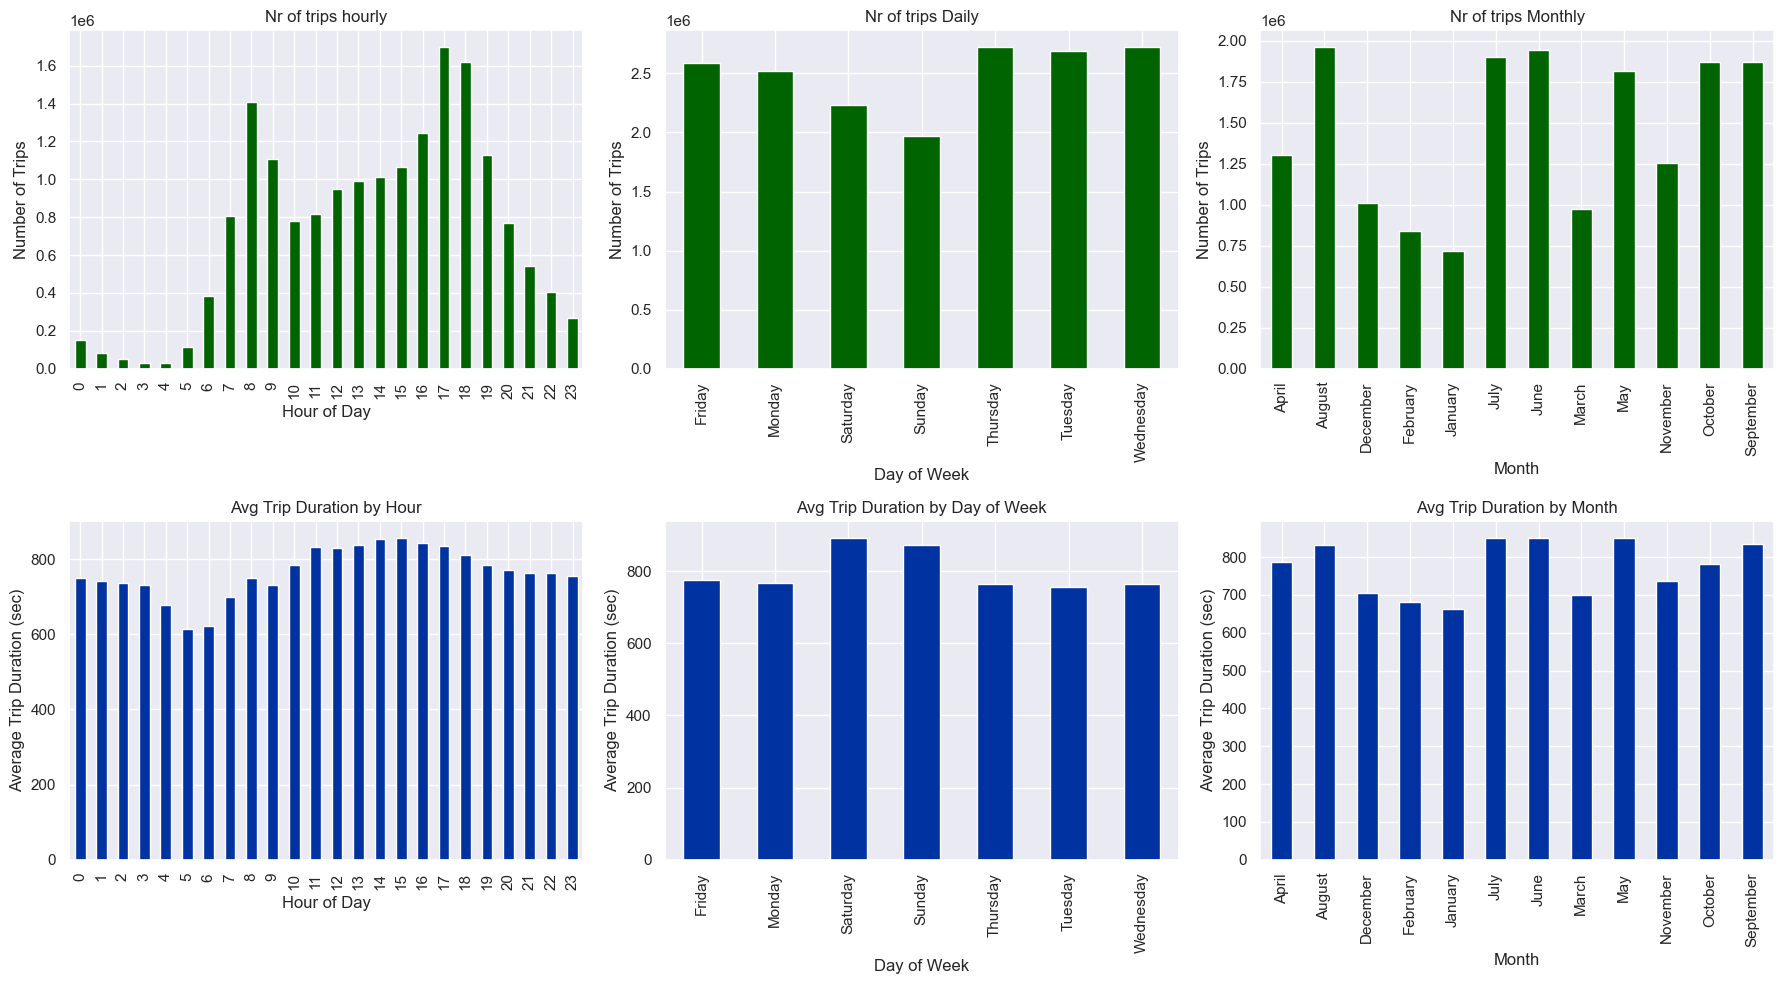

In [ ]:
#We add three columns: Start hour of trip, start day of trip, start month of trip
df1['start_hour'] = df1['starttime'].dt.hour
df1['day_of_week'] = df1['starttime'].dt.day_name()
df1['month'] = df1['starttime'].dt.month_name()


#For the first row of plots, we look at number of trips with respect to chosen timeperiod:
distribution_hrs = df1.groupby('start_hour').size()
distribution_week = df1.groupby('day_of_week').size()
distribution_month = df1.groupby('month').size()

#For the second row of plots, we look at average time duration with respect to chosen timeperiod:
avg_dur_hrs = df1.groupby('start_hour')['tripduration'].mean()
avg_dur_weekday = df1.groupby('day_of_week')['tripduration'].mean()
avg_dur_month = df1.groupby('month')['tripduration'].mean()


#Plotting settings:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))  # Adjusted the figure size for better visibility
c1 = "#006400"
c2 = "#0033A1"

#Plotting for number of trips
#Hours
distribution_hrs.plot(kind='bar', ax=axes[0,0], title='Nr of trips hourly', color = c1)
axes[0,0].set_xlabel('Hour of Day')
axes[0,0].set_ylabel('Number of Trips')
# Weekly
distribution_week.plot(kind='bar', ax=axes[0,1], title='Nr of trips Daily', color = c1)
axes[0,1].set_xlabel('Day of Week')
axes[0,1].set_ylabel('Number of Trips')
# Monthly
distribution_month.plot(kind='bar', ax=axes[0,2], title='Nr of trips Monthly', color = c1)
axes[0,2].set_xlabel('Month')
axes[0,2].set_ylabel('Number of Trips')

# Average trip duration
# Hourly
avg_dur_hrs.plot(kind='bar', ax=axes[1,0], title='Avg Trip Duration by Hour', color=c2)
axes[1,0].set_xlabel('Hour of Day')
axes[1,0].set_ylabel('Average Trip Duration (sec)')
# Weekly
avg_dur_weekday.plot(kind='bar', ax=axes[1,1], title='Avg Trip Duration by Day of Week', color = c2)
axes[1,1].set_xlabel('Day of Week')
axes[1,1].set_ylabel('Average Trip Duration (sec)')
# Monthly
avg_dur_month.plot(kind='bar', ax=axes[1,2], title='Avg Trip Duration by Month', color = c2)
axes[1,2].set_xlabel('Month')
axes[1,2].set_ylabel('Average Trip Duration (sec)')

plt.tight_layout()
plt.show()


The first row of three plots shows the total number of trips by looking across different time periods. Looking from left to right, it can be seen that rides primarilry happens in the monrning 07-09 (people going to work) and in the evening 16-18 (people going home from work). On the weekly distribution, the main takeaway is that rides primarily happens on the weekdays. In the weekends there is a slight drop and especially on sundays. Lastly, it can be seen from the monthtly distribution that trips occur during the summer and not so much during the winter - May to October is peak demand.  
<br> <br>
The second row of plots shows the average tripduration across time periods. Looking from left to right, the first plot does not have as clear trends as previously. For the hourly-plot is seem like the longest rides occurs in the middle of the day. On the second plot, it is however more evident that longer rides occur during weekends. Similarily, longer rides happen in the summer, but not as evident compared to previous plots. These longer rides during midday and weekends most likely happens because of toursits exploring NYC or locals doing the errands or shopping. When it's about commuting to work og home, people want to finish the task as soon as possible.
<br><br>

While these plots give a great overview of the number of trips and tripduration, we want to understand it further. For the next part, we will create the heatmap, to see how number of trips and tripduration might change when we include hour of day and day of week into the same visualization.

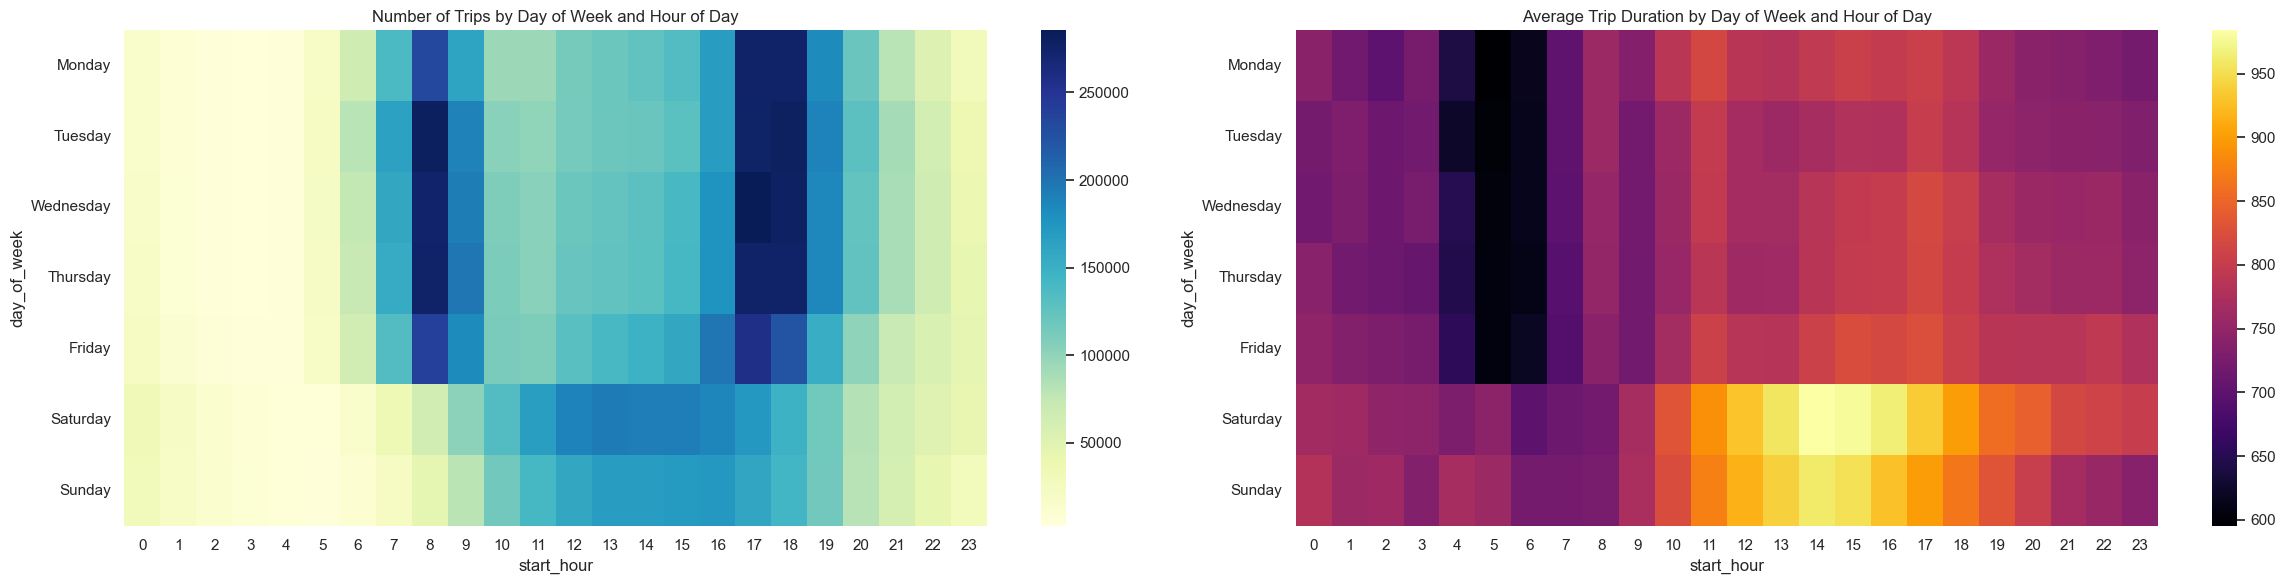

In [ ]:
#Data for number of trips
data_heat_trips = df1.groupby(['day_of_week', 'start_hour']).size().unstack()

#Data for trip duration
data_heat_dur = df1.pivot_table(index='day_of_week', columns='start_hour', values='tripduration', aggfunc='mean')

#Plotting Settings
#Ordering from Monday - Sunday
order_day = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
data_heat_trips = data_heat_trips.reindex(order_day)
data_heat_dur = data_heat_dur.reindex(order_day)
fig, axes = plt.subplots(1, 2, figsize=(24, 6))

#Plotting number of trips
sns.heatmap(data_heat_trips, cmap='YlGnBu', annot=False, fmt='d', ax=axes[0])
axes[0].set_title('Number of Trips by Day of Week and Hour of Day')

#Plotting average trip duration
sns.heatmap(data_heat_dur, cmap='inferno', annot=False, ax=axes[1])
axes[1].set_title('Average Trip Duration by Day of Week and Hour of Day')

plt.tight_layout()
plt.show()


The above plots actually seems to provide additional insights. For both plots there seems to be a distinct difference between weekdays and weekends. Supported by previous plots, number of trips primarily occurs during in the morning or evening rush hours (to or from work). However, from last plots it was very hard to see that, in the weekends, the number of trips actually occurs during midday in the wekends. Similarily for average trip duration. The trip duration is drastically longer in weekends during midday compared to weekdays.
<br> <br>
Contuining, we want to dive into the left plot i.e number of trips. Because of this pattern-difference in weekend and weekdays, it can be benefical and critical for CitiBike to differ correctly. For example, it might be better to work on bike- and station-maintenance in the middle of the day for weekdays. However, in the weekends, it is much better to work on maintenance in the evenings or mornings. Even though workers can reallocate bicycles during night with cars/trucks etc, we assume that they wont fix bixes and stations in the middle of the night as this requires lighting, comfortable setting and safety. 
<br> <br>
Another essential part, is that some stations might be used much more in the weekdays and vice versa. For example, stations close to tourist spots might experience more traffic on weekends, while those near business areas might be busier on weekdays. Therefore this adds another level of complexity. Maybe some stations needs to be maintained during weekdays and some during weekends. The next EDA-part will consist of four sections that in the end will lead to a classifcation model:
1. Firstly, it will define a measure (called stress) for whether a station is busy at a given hour <br>
2. Secondly, it will give an overview of the stressed stations during weekends and weekdays <br>
3. Thirdly, it will dive into two specific stations to show their patterns and to support the hypothesis <br>
4. Lastly, it will create a model that classifies a station as busy based on time of hour and whether it's weekend <br>

#### **EDA: Classification of demand based on weekdays and weeekends**

For this part we will first create the correct dataset, called 'grouped'. It will include the measure on whether a station is stressed or not. First of all we will do some data preparation

In [ ]:
#Create a copy of dataset
df_class = df.copy()


In [ ]:
#We only keep the relevant columns
df_class.drop(['Unnamed: 0','usertype', 'birth_year', 'gender'], axis=1, inplace=True)
df_class.drop(['stoptime', 'start_station_latitude', 'start_station_longitude', 'end_station_id', 'end_station_latitude','end_station_longitude', 'bikeid'], axis=1, inplace=True)
df_class['hour_of_day'] = df_class['starttime'].dt.hour


In [ ]:
#We set startime to index and make sure correct datetype 
df_class['starttime'] = pd.to_datetime(df_class['starttime'])
df_class.set_index('starttime', inplace=True)

#We resample on an hourly basis and groupby station id
grouped = df_class.groupby('start_station_id').resample('H').agg({'tripduration': 'count'})

# Extract the hour from the resampled 'starttime' index
grouped['hour_of_day'] = grouped.index.get_level_values(1).hour
# Reset index
grouped.reset_index(inplace=True)

#Adding its weeknd as column
#Correct renameing
grouped.rename(columns={'tripduration': 'pickups'}, inplace=True)
grouped['is_weekend'] = grouped['starttime'].dt.dayofweek >= 5
grouped.head(10)

start_station_id           starttime  pickups  hour_of_day  is_weekend
0              72.0 2018-01-01 13:00:00        1           13       False
1              72.0 2018-01-01 14:00:00        0           14       False
2              72.0 2018-01-01 15:00:00        3           15       False
3              72.0 2018-01-01 16:00:00        0           16       False
4              72.0 2018-01-01 17:00:00        0           17       False
5              72.0 2018-01-01 18:00:00        1           18       False
6              72.0 2018-01-01 19:00:00        0           19       False
7              72.0 2018-01-01 20:00:00        0           20       False
8              72.0 2018-01-01 21:00:00        1           21       False
9              72.0 2018-01-01 22:00:00        0           22       False

In [ ]:
#Everything above 75th percentile is considered stress/busy
stress_threshold=np.percentile(grouped['pickups'], 75)
len(grouped[grouped.pickups>stress_threshold])

1486005

In [ ]:
#The dataset to be used for further on looks like this
grouped['stress']=grouped['pickups'].apply(lambda x: x>stress_threshold)
grouped.head()

start_station_id           starttime  pickups  hour_of_day  is_weekend  \
0              72.0 2018-01-01 13:00:00        1           13       False   
1              72.0 2018-01-01 14:00:00        0           14       False   
2              72.0 2018-01-01 15:00:00        3           15       False   
3              72.0 2018-01-01 16:00:00        0           16       False   
4              72.0 2018-01-01 17:00:00        0           17       False   

   stress  
0   False  
1   False  
2   False  
3   False  
4   False

We are now ready to analyze the data and support the decision to make a classification model. In the two visualization below, we can see the top 50 busiest stations on weekdays and weekdays. We can also see that 27 of all the stations represented, occur in both 'busy weekday' and 'busy weekend'. This can be interpreted, that some stations naturally are stressed at all times of the week. However and more importantly, there also seems to be some stations that are only busy in weekdays and not weekends and vice versa. In practice, 23 stations are only stressed on weekdays and not on weekends and 23 other stations are onnly stressed on weekends and not on weekdays. 

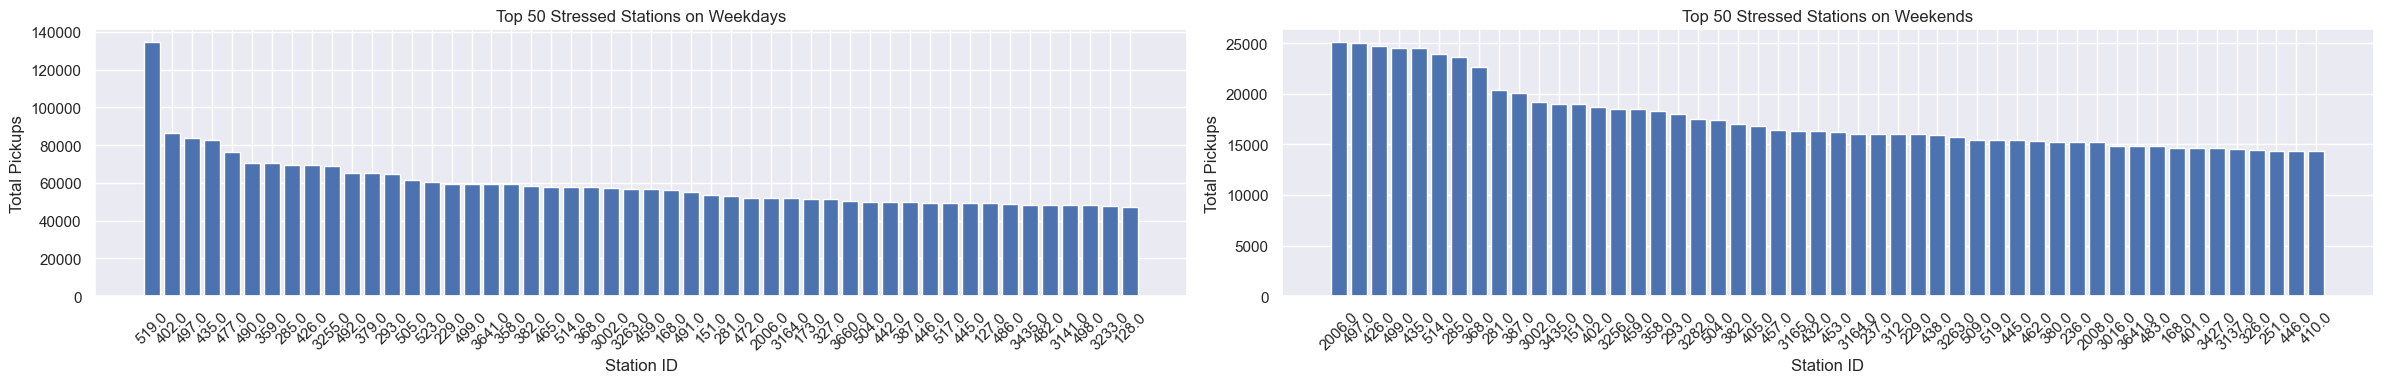

There are 27 stations that are both in the top 50 weekdays and top 50 weekends.


In [ ]:
import matplotlib.pyplot as plt

# Filter the data for weekdays and weekends
weekday_data = grouped[grouped['is_weekend'] == False]
weekend_data = grouped[grouped['is_weekend'] == True]

# Aggregate the total pickups for each station
weekday_stress = weekday_data.groupby('start_station_id').agg({'pickups': 'sum'}).reset_index()
weekend_stress = weekend_data.groupby('start_station_id').agg({'pickups': 'sum'}).reset_index()

# Sort the data to get the top 50 stressed stations
top_weekday_stations = weekday_stress.sort_values(by='pickups', ascending=False).head(50)
top_weekend_stations = weekend_stress.sort_values(by='pickups', ascending=False).head(50)

# Set up the subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 4))

# Plot for Weekdays
ax1.bar(top_weekday_stations['start_station_id'].astype(str), top_weekday_stations['pickups'])
ax1.set_title('Top 50 Stressed Stations on Weekdays')
ax1.set_xlabel('Station ID')
ax1.set_ylabel('Total Pickups')
ax1.tick_params(axis='x', rotation=45)

# Plot for Weekends
ax2.bar(top_weekend_stations['start_station_id'].astype(str), top_weekend_stations['pickups'])
ax2.set_title('Top 50 Stressed Stations on Weekends')
ax2.set_xlabel('Station ID')
ax2.set_ylabel('Total Pickups')
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Find the stations that are in both top 50 weekdays and top 50 weekends
common_stations = set(top_weekday_stations['start_station_id']) & set(top_weekend_stations['start_station_id'])

# Count the number of common stations
num_common_stations = len(common_stations)

print(f"There are {num_common_stations} stations that are both in the top 50 weekdays and top 50 weekends.")


##### **Two stations: ID527 \& ID3256**

More specifically we find the stations that are stressed on weekdays but not on weeknds and vice versa. We pick two stations and visualize their patterns and support the previous hypotheses.


In [ ]:
# Stations that are in the top 50 for weekdays but not weekends
weekday_only_stations = set(top_weekday_stations['start_station_id']) - set(top_weekend_stations['start_station_id'])

# Stations that are in the top 50 for weekends but not weekdays
weekend_only_stations = set(top_weekend_stations['start_station_id']) - set(top_weekday_stations['start_station_id'])

# Display the results
print(f"Stations stressed on weekdays but not weekends: {weekday_only_stations}")
print(f"Stations stressed on weekends but not weekdays: {weekend_only_stations}")


Stations stressed on weekdays but not weekends: {128.0, 517.0, 523.0, 3233.0, 173.0, 3255.0, 442.0, 3141.0, 327.0, 3660.0, 465.0, 472.0, 477.0, 482.0, 486.0, 359.0, 490.0, 491.0, 492.0, 498.0, 505.0, 379.0, 127.0}
Stations stressed on weekends but not weekdays: {401.0, 405.0, 410.0, 432.0, 438.0, 312.0, 3256.0, 3137.0, 453.0, 326.0, 3016.0, 457.0, 462.0, 3282.0, 2008.0, 3165.0, 483.0, 3427.0, 236.0, 237.0, 251.0, 380.0, 509.0}


Based on the top 50, we pick station 517 and station 3256. We pick these two because:
- Station 517 is represented on top50 stressed on a weekday but not represented on stressed on a weekend <br>
- Station 3256 is represented on top50 stressed on a weekend but not represented on stressed on a weekday <br>

In [ ]:
# For station 517:
weekend_stressed_517 = grouped[(grouped['start_station_id'] == 517) & (grouped['is_weekend'] == True) & (grouped['stress'] == True)].shape[0]
non_weekend_stressed_517 = grouped[(grouped['start_station_id'] == 517) & (grouped['is_weekend'] == False) & (grouped['stress'] == True)].shape[0]

# For station 3256:
weekend_stressed_3256 = grouped[(grouped['start_station_id'] == 3256) & (grouped['is_weekend'] == True) & (grouped['stress'] == True)].shape[0]
non_weekend_stressed_3256 = grouped[(grouped['start_station_id'] == 3256) & (grouped['is_weekend'] == False) & (grouped['stress'] == True)].shape[0]

print(f"Station 517 stressed times on weekends: {weekend_stressed_517}")
print(f"Station 517 stressed times on non-weekends: {non_weekend_stressed_517}")
print(f"Station 3256 stressed times on weekends: {weekend_stressed_3256}")
print(f"Station 3256 stressed times on non-weekends: {non_weekend_stressed_3256}")

Station 517 stressed times on weekends: 468
Station 517 stressed times on non-weekends: 3035
Station 3256 stressed times on weekends: 1093
Station 3256 stressed times on non-weekends: 2623


The below plots supports the hypothesis. Station 517 could without any deeper problem be repaired during the weekend. However station 3256 is much better off by being repaired during the morning-hours of the weekdays. 

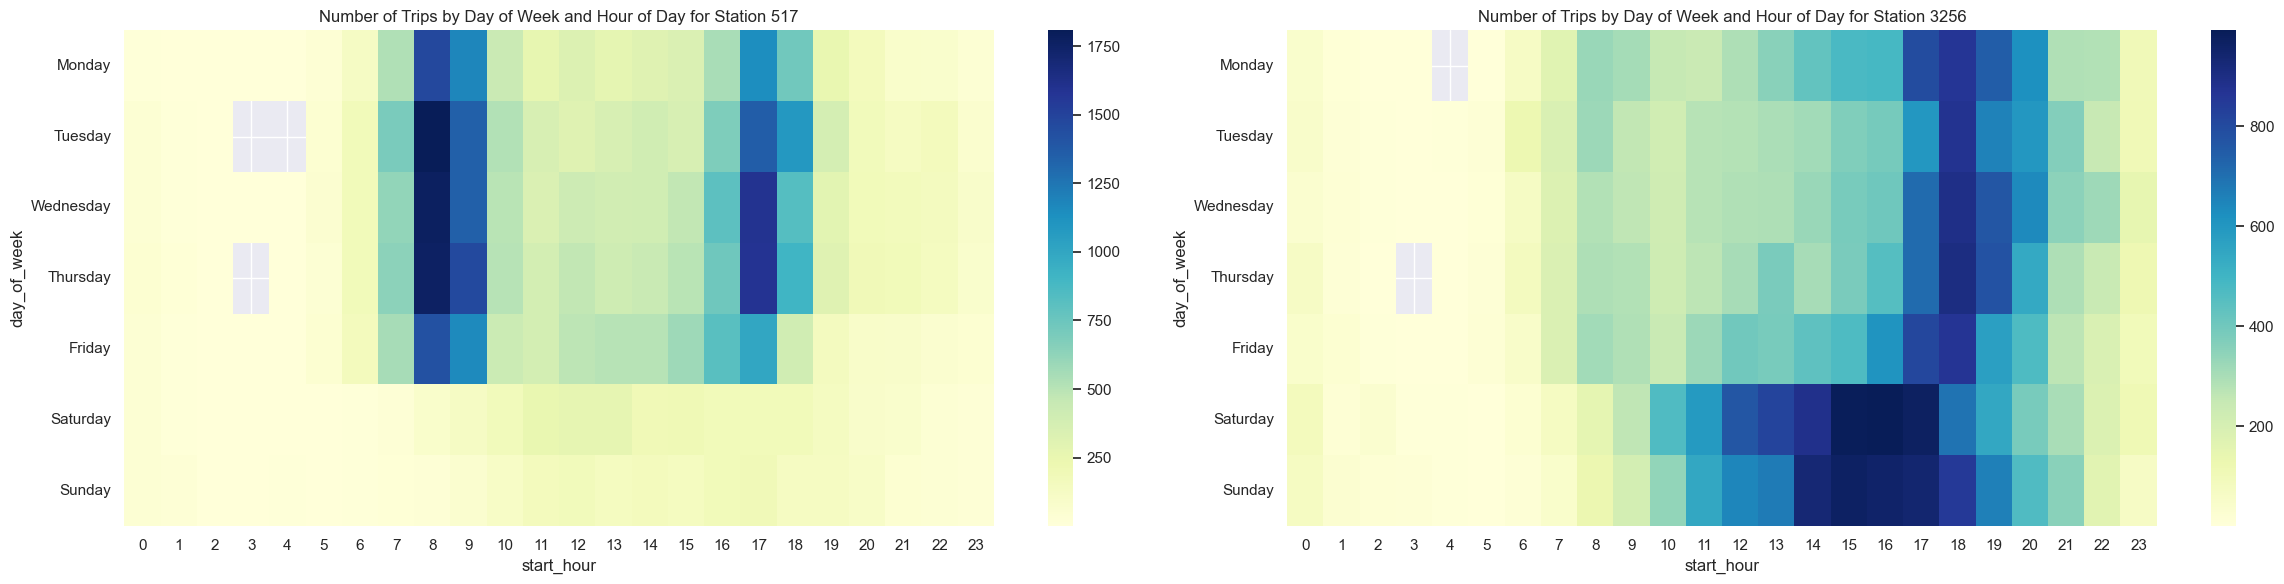

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Extract hour, day, and month data from the 'starttime' column
df['start_hour'] = df['starttime'].dt.hour
df['day_of_week'] = df['starttime'].dt.day_name()
fig, axes = plt.subplots(1, 2, figsize=(24, 6))

# For Station 517
filtered_df_517 = df[df['start_station_id'] == 517]
heatmap_data_517 = filtered_df_517.groupby(['day_of_week', 'start_hour']).size().unstack()
ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
heatmap_data_517 = heatmap_data_517.reindex(ordered_days)
sns.heatmap(heatmap_data_517, cmap='YlGnBu', annot=False, fmt='d', ax=axes[0])
axes[0].set_title('Number of Trips by Day of Week and Hour of Day for Station 517')

# For Station 3256
filtered_df_3256 = df[df['start_station_id'] == 3256]
heatmap_data_3256 = filtered_df_3256.groupby(['day_of_week', 'start_hour']).size().unstack()
heatmap_data_3256 = heatmap_data_3256.reindex(ordered_days)
sns.heatmap(heatmap_data_3256, cmap='YlGnBu', annot=False, fmt='d', ax=axes[1])
axes[1].set_title('Number of Trips by Day of Week and Hour of Day for Station 3256')

plt.tight_layout()
plt.show()


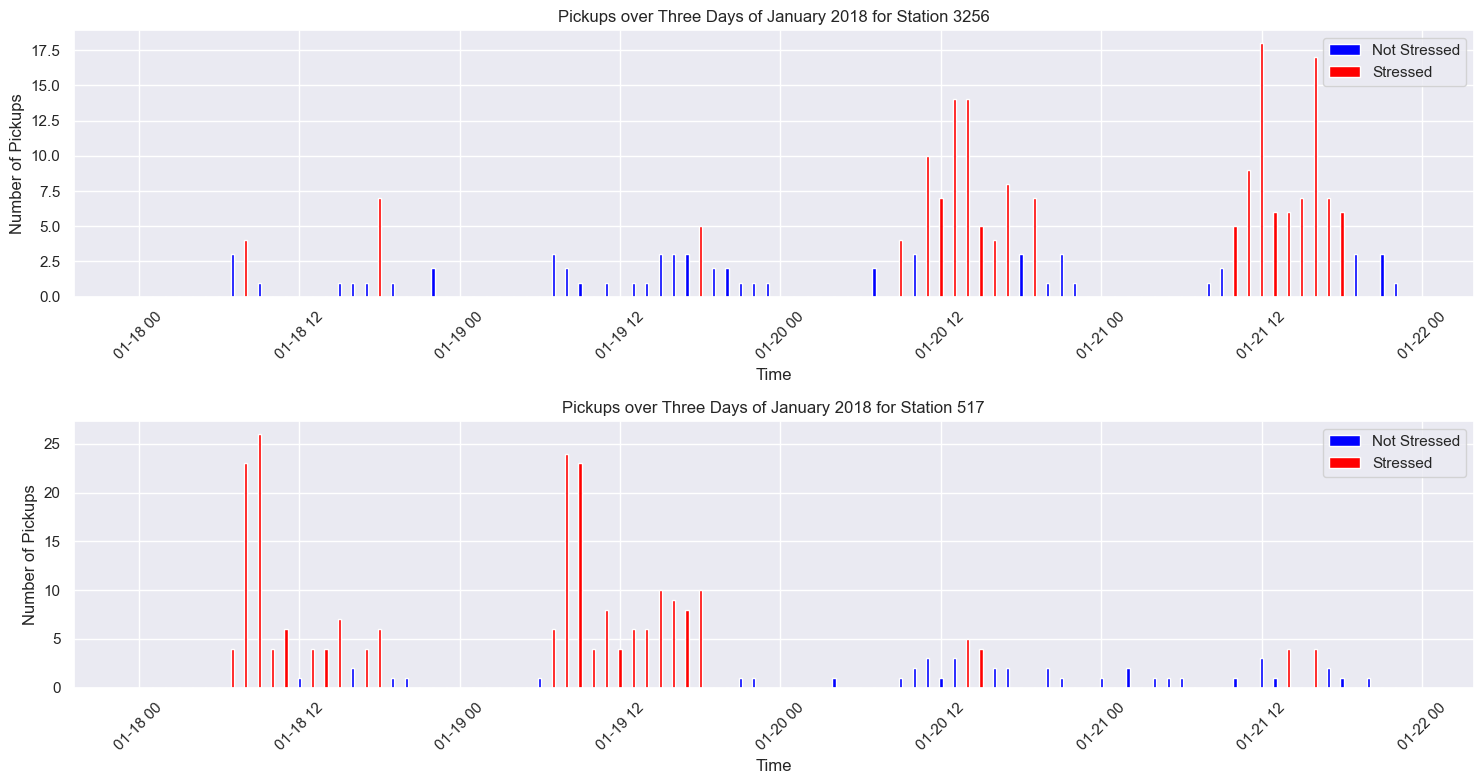

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.dates as mdates

# Define a 2x1 grid of subplots
fig, axes = plt.subplots(2, 1, figsize=(15, 8))

# Assuming the dataframe is named 'grouped'
start_date = pd.Timestamp('2018-01-18')
end_date = pd.Timestamp('2018-01-22')

# For Station 3256
nr = 3256
df_three_days = grouped.loc[(grouped["start_station_id"] == nr) & 
                            (grouped["starttime"] >= start_date) & 
                            (grouped["starttime"] < end_date)]
stressed = df_three_days[df_three_days['stress']]
not_stressed = df_three_days[~df_three_days['stress']]

axes[0].bar(not_stressed['starttime'], not_stressed['pickups'], color='blue', label='Not Stressed', width=0.01)
axes[0].bar(stressed['starttime'], stressed['pickups'], color='red', label='Stressed', width=0.01)
axes[0].set_title("Pickups over Three Days of January 2018 for Station 3256")
axes[0].set_xlabel("Time")
axes[0].set_ylabel("Number of Pickups")
axes[0].legend()
for label in axes[0].get_xticklabels():
    label.set_rotation(45)

# For Station 517
nr = 517
df_three_days = grouped.loc[(grouped["start_station_id"] == nr) & 
                            (grouped["starttime"] >= start_date) & 
                            (grouped["starttime"] < end_date)]
stressed = df_three_days[df_three_days['stress']]
not_stressed = df_three_days[~df_three_days['stress']]

axes[1].bar(not_stressed['starttime'], not_stressed['pickups'], color='blue', label='Not Stressed', width=0.01)
axes[1].bar(stressed['starttime'], stressed['pickups'], color='red', label='Stressed', width=0.01)
axes[1].set_title("Pickups over Three Days of January 2018 for Station 517")
axes[1].set_xlabel("Time")
axes[1].set_ylabel("Number of Pickups")
axes[1].legend()
for label in axes[1].get_xticklabels():
    label.set_rotation(45)

plt.tight_layout()
plt.show()


Lastly, we wanted to support and showcase the hypothesis, that the purpose of stations differs. In the below map we see station 517 as the most northern and 3256 as the sourth out to the pier. Recall that 517 is significantly more stressed during weekdays than weekends. This also fits well with its location: in the middle of the city park avenue. Similarily, station 3256 is out to the pier - right next to the Hudson River Park. Most likely a very attractive place to be during weekends. 

In [ ]:
import plotly.express as px

# Extracting the data for the two stations from your original dataframe
stressed_weekday = df.loc[df["start_station_id"] == 517][["start_station_latitude", "start_station_longitude"]]
stressed_weekend = df.loc[df["start_station_id"] == 3256][["start_station_latitude", "start_station_longitude"]]

# Combine the two dataframes
combined_df = pd.concat([stressed_weekday, stressed_weekend])

# Group by latitude and longitude to get counts for each station
heatmap_data = combined_df.groupby(['start_station_latitude', 'start_station_longitude']).size().reset_index(name='count')

# Create the heatmap
fig = px.density_mapbox(heatmap_data, lat='start_station_latitude', lon='start_station_longitude', z='count',
                        center=dict(lat=40.7320, lon=-74.0007), zoom=12,
                        mapbox_style="open-street-map", range_color=[0, heatmap_data['count'].max()])

# Adjust the aspect ratio
fig.update_layout(width=800, height=800, autosize=False)

fig.show()

#The most northern is 517 which has stressed weekdays
#The most southern is 3256 which has stressed weekends

##### **Classification**

In the above section, we showcased how it can be important to know whether a station is busy or not. We have looked at some visualizations that particularily looks at the hour of the day and whether it weekend. For the next section, we will classify whether a station is busy or not based on the two features: hour of day and whether it weekend

In [ ]:
from sklearn.model_selection import train_test_split
#X = grouped['is_weekend'].astype(int).values.reshape(-1, 1)
X = grouped[['hour_of_day', 'is_weekend']].astype(int).values
y = grouped['stress']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")


Training set size: 5348372
Test set size: 1337094


We get a score of almost 78\%

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

dt=DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt.score(X_test,y_test)



0.7779071628471895

[[1019697   19518]
 [ 277441   20438]]


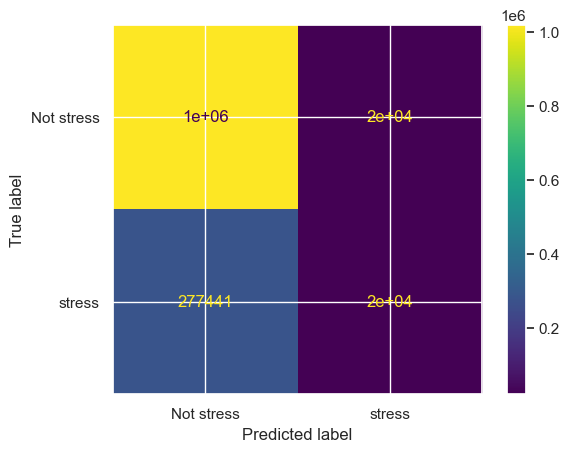

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Calculate the confusion matrix
ypred = dt.predict(X_test)
cm = confusion_matrix(y_test, ypred)

# Create a display object and plot it
display_labels = ['Not stress', 'stress']  # adjust this based on your actual classes
cmd = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=display_labels)
cmd.plot()


cm_classic = confusion_matrix(y_test, ypred)
# Print the confusion matrix
print(cm_classic)


Based on hour of day and whether it's weekend, we can now classify whether a station will be busy or not. 

# Section 3: Prediction Challenge

### **Clustering**

This section will solely focus on clustering to provide valuable insights into the geographical trends of the bike-sharing system demand. The purpose of the clustering is to create a foundation for the prediction model, as it allows for more efficient resource allocation in terms of enhancing user experiences by strategically locating stations and ensuring bike availability during peak times.

When clustering, it is crucial to consider the trade-off between the number of clusters and the amount of resources Citi Bike has available to acoomodate the daily demand. For instance, excessive clusters lead to overfitting and increased bike redistribution efforts, while too few clusters may neglect potential customer segments in New York.

To address this trade-off, the elbow method is chosen to determine the optimal number of bike stations, i.e. clusters for Citi Bike. This technique entails performing K-means clustering on the end station coordinates in the dataset using a range of k values and calculate the the Sum of Squared Errors (SSE) for each k value. By calculating the SSE for a range of cluster numbers, the elbow method helps identify a point on the plot where the reduction in SSE starts to decline. This point signifies the trade-off balance, which is the optimal value for k.

In [ ]:
# Dataframes with id's and coordinates for start stations and end stations
X=df.loc[:,['start_station_id','start_station_latitude','start_station_longitude']]
Y=df.loc[:,['end_station_id','end_station_latitude','end_station_longitude']]

In [ ]:
K_clusters = range(20,26) # Range of k
kmeans = [KMeans(n_clusters=i) for i in K_clusters] # Performing K-means
Y_axis = df[['end_station_latitude']]
X_axis = df[['end_station_longitude']]
score = [kmeans[i].fit(Y_axis).score(Y_axis) for i in range(len(kmeans))] # Calculating SSE
# Visualize
plt.plot(K_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

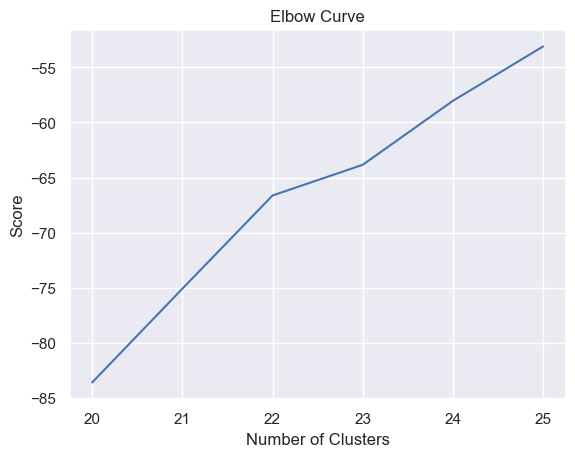

We can see that the score starts to level off after 22 clusters, which is the optimal number. It is important to note that the dataset from Citi Bike is fairly large, and consists of 819 unique end stations. Generally, it would be good practice to run a larger range of k values, however due to the limited computing power, this range was the most applicable.

In [ ]:
kmeans = KMeans(n_clusters = 22, init ='k-means++')
kmeans.fit(X[X.columns[1:3]]) # Compute k-means clustering.
X['cluster_label'] = kmeans.fit_predict(X[X.columns[1:3]])
centers_start = kmeans.cluster_centers_ # Coordinates of cluster centers.
labels_start = kmeans.predict(X[X.columns[1:3]]) # Labels of each point


kmeans = KMeans(n_clusters = 22, init ='k-means++')
kmeans.fit(Y[Y.columns[1:3]]) # Compute k-means clustering.
Y['cluster_label'] = kmeans.fit_predict(Y[Y.columns[1:3]])
centers_end = kmeans.cluster_centers_ # Coordinates of cluster centers.
labels_end = kmeans.predict(Y[Y.columns[1:3]]) # Labels of each point

X.plot.scatter(x = 'start_station_latitude', y = 'start_station_longitude', c=labels_start, s=50, cmap='viridis')
plt.scatter(centers_start[:, 0], centers_start[:, 1], c='black', s=200, alpha=0.5)

Y.plot.scatter(x = 'end_station_latitude', y = 'end_station_longitude', c=labels_end, s=50, cmap='viridis')
plt.scatter(centers_end[:, 0], centers_end[:, 1], c='black', s=200, alpha=0.5)

df["start_cluster"] = X["cluster_label"]
df["end_cluster"] = Y["cluster_label"]

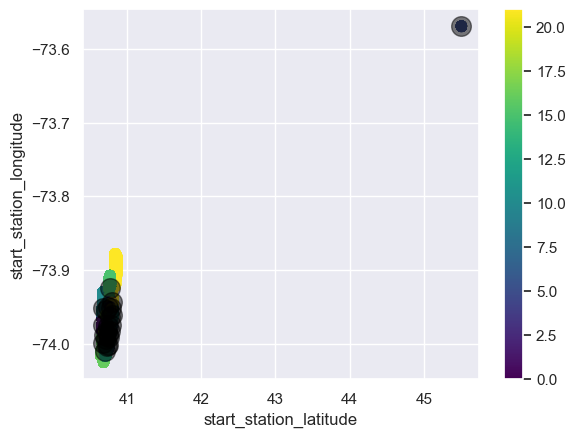

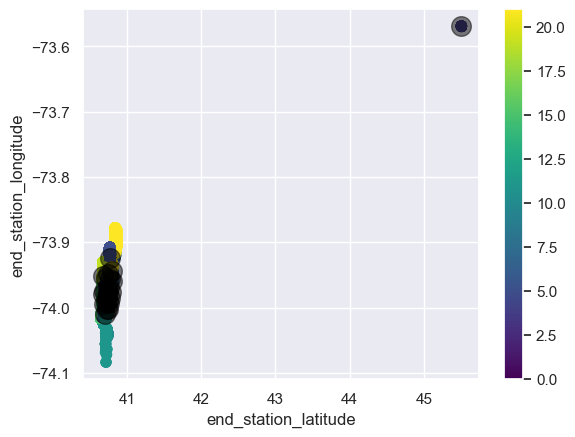

We see from the two plots that we have a concentrated area of both start- and end coordinates from the bikes, which could look like an outlier. Therefore, we must count the occurences of latitude values that are bigger than 45.

In [ ]:
print("Occurences of start latitude values larger than 45:", len(df[df.start_station_latitude > 45]))
print("Occurences of end latitude values larger than 45:", len(df[df.start_station_latitude > 45]))

As the occurences are low compared, this cluster will be treated as an outlier by removing it from the data.

In [ ]:
df = df[(df['start_station_latitude'] < 45) & (df['end_station_latitude'] < 45)]
centers_start = centers_start[centers_start[:, 0] < 45]
centers_end = centers_end[centers_end[:, 0] < 45]

We then update the dataframe with respect to the new clusters.

In [ ]:
df.plot.scatter(x = 'start_station_latitude', y = 'start_station_longitude', c=df.start_cluster.to_numpy(), s=50, cmap='viridis')
plt.scatter(centers_start[:, 0], centers_start[:, 1], c='black', s=200, alpha=0.5)

df.plot.scatter(x = 'end_station_latitude', y = 'end_station_longitude', c=df.end_cluster.to_numpy(), s=50, cmap='viridis')
plt.scatter(centers_end[:, 0], centers_end[:, 1], c='black', s=200, alpha=0.5)

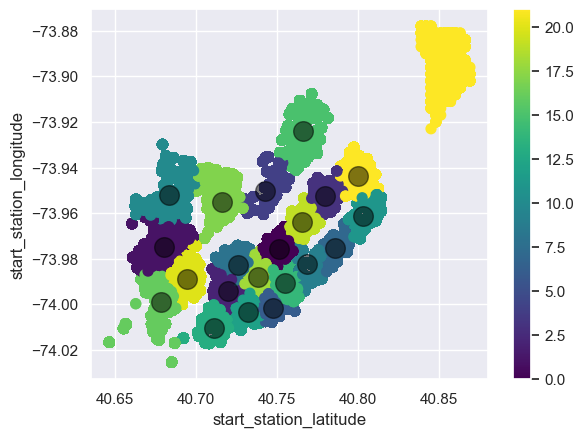

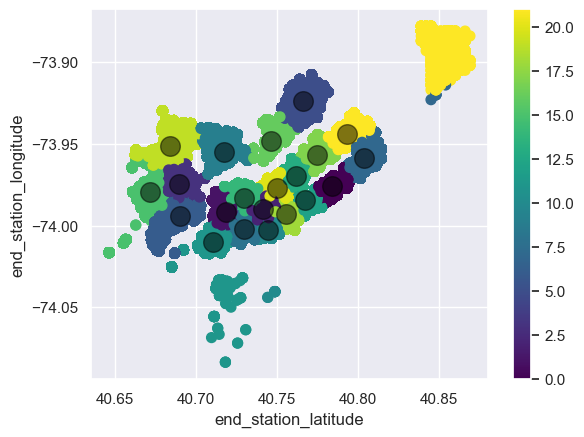

In [ ]:
#save the cluster as csv: 
project_folder = '/Users/augusthogsted/Desktop/Intro to BA'
df_cluster_processed = os.path.join(project_folder, 'df_cluster_processed.csv') 
df.to_csv(df_cluster_processed, index = False)

In [ ]:
df.head()

### **Predictions**

Now that the clusters have been created, we want to start predicting the demand of bikes for given clusters for the next day. We both want to predict the number of pickups and dropoffs. To do so, two regression models has been applied, a linear regression model and a Neural Network. 


Since we will use the clustered data from now on, we will load the saved CSV file of the clustered data

In [306]:
cluster_data = pd.read_csv("/Users/clarareginekold/Desktop/DTU/42577 Introduction to Business Analytics/Project/df_cluster_processed.csv")

Before we start predicting the number of pickups per 15 minute interval, we investigate which 2 clusters are the most commonly used. 

In [307]:
# Group the data by the 'cluster_start' column and count occurrences
cluster_counts_start = cluster_data['cluster_start'].value_counts()
cluster_counts_end = cluster_data['cluster_end'].value_counts()

# Sort the counts in descending order and take the top 3
top_3_clusters_start = cluster_counts_start.head(2)
top_3_clusters_end = cluster_counts_end.head(2)

# Get the cluster values without counts
top_clusters_start = top_3_clusters_start.index.values
top_clusters_end = top_3_clusters_end.index.values

print("The 2 most common cluster_start are:", top_clusters_start, "\n")
print("The 2 most common cluster_end are:", top_clusters_end)


The 2 most common cluster_start are: [17  4] 

The 2 most common cluster_end are: [16  1]


#### Data Preparations: Pick-ups

Now we prepare the data regarding pickups. 

The data is then aggregated to 15-minute intervals. From hereon out, the pickups and dropsoff will be investigated in these 15-minute intervals. 

In [308]:
# Get a list of unique clusters
unique_clusters = cluster_data['cluster_start'].unique() # there are 21 clusters 

# Create a dictionary to store DataFrames for each cluster
cluster_data_frames_start = {}

# Loop through each cluster
for cluster_id in unique_clusters:
    # Filter the data for the current cluster
    data = cluster_data[cluster_data['cluster_start'] == cluster_id]

    # Check if 'starttime' column exists in the filtered data
    if 'starttime' in data:
        # Convert 'starttime' to datetime
        data['starttime'] = pd.to_datetime(data['starttime'])

        # Set 'starttime' as the index
        data.set_index('starttime', inplace=True)

        # Group by 'cluster_start', resample to 15-minute intervals, and calculate count and mean
        aggregated_data_start = data.groupby([pd.Grouper(freq='15T')]).agg({'cluster_start': 'count', 'tripduration': 'mean'}).reset_index()

        # Rename the columns for clarity
        aggregated_data_start = aggregated_data_start.rename(columns={'cluster_start': 'pickup_count', 'tripduration': 'average_tripduration'})

        # Store the aggregated data for the current cluster in the dictionary
        cluster_data_frames_start[cluster_id] = aggregated_data_start

# Output 
cluster_data_frames_start

{13:                 starttime  pickup_count  average_tripduration
 0     2018-01-01 00:15:00             1            364.000000
 1     2018-01-01 00:30:00             7           1123.857143
 2     2018-01-01 00:45:00             4            673.750000
 3     2018-01-01 01:00:00             3            531.000000
 4     2018-01-01 01:15:00             4            590.750000
 ...                   ...           ...                   ...
 35034 2018-12-31 22:45:00             3            708.333333
 35035 2018-12-31 23:00:00             1            794.000000
 35036 2018-12-31 23:15:00             0                   NaN
 35037 2018-12-31 23:30:00             1           1161.000000
 35038 2018-12-31 23:45:00             1           1027.000000
 
 [35039 rows x 3 columns],
 12:                 starttime  pickup_count  average_tripduration
 0     2018-01-01 00:00:00             3            373.333333
 1     2018-01-01 00:15:00             2            452.500000
 2     2018-01-01 

Moreover, additional columns containing the date, hour, and minute of the datapoint is created. These column will be useful to base the predictions on, as we expect that there will be a daily pattern of both pickups and drop-offs of bikes. 

In [309]:
# Loop through each cluster DataFrame in the dictionary
for cluster_id, cluster_df in cluster_data_frames_start.items():
    
    # Convert 'starttime' to datetime
    cluster_df['starttime'] = pd.to_datetime(cluster_df['starttime'])

    # Extract date, hour, and minute
    cluster_df['date'] = cluster_df['starttime'].dt.date
    cluster_df['hour'] = cluster_df['starttime'].dt.hour
    cluster_df['minute'] = cluster_df['starttime'].dt.minute

    # Calculate quarter_of_hour
    cluster_df['quarter_of_hour'] = (cluster_df['hour'] * 4) + (cluster_df['minute'] // 15) + 1

    # Calculate day_of_week (0 = Monday, 6 = Sunday)
    cluster_df['day_of_week'] = cluster_df['starttime'].dt.dayofweek

# Output 
cluster_data_frames_start

{13:                 starttime  pickup_count  average_tripduration        date  \
 0     2018-01-01 00:15:00             1            364.000000  2018-01-01   
 1     2018-01-01 00:30:00             7           1123.857143  2018-01-01   
 2     2018-01-01 00:45:00             4            673.750000  2018-01-01   
 3     2018-01-01 01:00:00             3            531.000000  2018-01-01   
 4     2018-01-01 01:15:00             4            590.750000  2018-01-01   
 ...                   ...           ...                   ...         ...   
 35034 2018-12-31 22:45:00             3            708.333333  2018-12-31   
 35035 2018-12-31 23:00:00             1            794.000000  2018-12-31   
 35036 2018-12-31 23:15:00             0                   NaN  2018-12-31   
 35037 2018-12-31 23:30:00             1           1161.000000  2018-12-31   
 35038 2018-12-31 23:45:00             1           1027.000000  2018-12-31   
 
        hour  minute  quarter_of_hour  day_of_week  
 0   

It is made sure that there are no null-values. 

In [310]:
for cluster_id, cluster_df in cluster_data_frames_start.items():
    cluster_df.fillna(0, inplace=True) 

In order to acheive the best model, in the sense that's able to predict unseen values correctly, we need to split the dataset into a training and test set. As we will be using hyperparameters in the neural network, we furthermore split the training set into a training and validation set, in order to evaluate the parameters chosen without interfering with the test set. 

The dataset is divided as follows:
- Training set: 2018-01-01 to 2018-09-30 
- Validation set: 2018-09-30 to 2018-10-31 
- Test set: 2018-11-01 to 2018-12-31


The datasets are furthermore split in two; features_to_use and target_variables, in order to specify which features will be used to predict our target, in this case we will use date time related features to predict the number of pickups, and dropsoff respectively. 

In [311]:
# Define date ranges for training, validation, and test sets
train_start = pd.to_datetime('2018-01-01')
train_end = pd.to_datetime('2018-08-31')
val_start = pd.to_datetime('2018-08-31')
val_end = pd.to_datetime('2018-09-30')
test_start = pd.to_datetime('2018-10-01')
test_end = pd.to_datetime('2018-12-31')

# Define your feature and target columns
feature_columns = ['quarter_of_hour', 'hour', 'minute', 'day_of_week', 'average_tripduration']
target_columns = ['pickup_count']

# Create dictionaries to store training, validation, and test sets for each cluster
X_train_clusters_start = {} 
X_val_clusters_start = {} 
X_test_clusters_start = {} 
y_train_clusters_start = {} 
y_val_clusters_start = {} 
y_test_clusters_start = {} 

# Loop through each cluster DataFrame in the dictionary
for cluster_id, cluster_df in cluster_data_frames_start.items():
    # Convert 'starttime' to datetime
    cluster_df['starttime'] = pd.to_datetime(cluster_df['starttime'])
    
    # Filter the dataset based on date ranges
    train_set_start = cluster_df[(cluster_df['starttime'] >= train_start) & (cluster_df['starttime'] <= train_end)]
    val_set_start = cluster_df[(cluster_df['starttime'] >= val_start) & (cluster_df['starttime'] <= val_end)]
    test_set_start = cluster_df[(cluster_df['starttime'] >= test_start) & (cluster_df['starttime'] <= test_end)]
    
    # Extract feature and target columns for each set
    X_train_start = train_set_start[feature_columns]
    X_val_start = val_set_start[feature_columns]
    X_test_start = test_set_start[feature_columns]
    y_train_start = train_set_start[target_columns]
    y_val_start = val_set_start[target_columns]
    y_test_start = test_set_start[target_columns]
    
    # Store the data for the current cluster in the dictionaries
    X_train_clusters_start[cluster_id] = X_train_start
    X_val_clusters_start[cluster_id] = X_val_start
    X_test_clusters_start[cluster_id] = X_test_start
    y_train_clusters_start[cluster_id] = y_train_start
    y_val_clusters_start[cluster_id] = y_val_start
    y_test_clusters_start[cluster_id] = y_test_start

# Output 
cluster_data_frames_start

{13:                 starttime  pickup_count  average_tripduration        date  \
 0     2018-01-01 00:15:00             1            364.000000  2018-01-01   
 1     2018-01-01 00:30:00             7           1123.857143  2018-01-01   
 2     2018-01-01 00:45:00             4            673.750000  2018-01-01   
 3     2018-01-01 01:00:00             3            531.000000  2018-01-01   
 4     2018-01-01 01:15:00             4            590.750000  2018-01-01   
 ...                   ...           ...                   ...         ...   
 35034 2018-12-31 22:45:00             3            708.333333  2018-12-31   
 35035 2018-12-31 23:00:00             1            794.000000  2018-12-31   
 35036 2018-12-31 23:15:00             0              0.000000  2018-12-31   
 35037 2018-12-31 23:30:00             1           1161.000000  2018-12-31   
 35038 2018-12-31 23:45:00             1           1027.000000  2018-12-31   
 
        hour  minute  quarter_of_hour  day_of_week  
 0   

#### Data Preparations: Drop-offs

Now we prepare the data regarding drop-offs. 

The data is then aggregated to 15-minute intervals. From hereon out, the pickups and dropsoff will be investigated in these 15-minute intervals. 

In [312]:
# Get a list of unique clusters
unique_clusters = cluster_data['cluster_end'].unique() # there are 21 clusters 

# Create a dictionary to store DataFrames for each cluster
cluster_data_frames_end = {}

# Loop through each cluster
for cluster_id in unique_clusters:
    # Filter the data for the current cluster
    data = cluster_data[cluster_data['cluster_end'] == cluster_id]

    # Check if 'starttime' column exists in the filtered data
    if 'stoptime' in data:
        # Convert 'starttime' to datetime
        data['stoptime'] = pd.to_datetime(data['stoptime'])

        # Set 'starttime' as the index
        data.set_index('stoptime', inplace=True)

        # Group by 'cluster_start', resample to 15-minute intervals, and calculate count and mean
        aggregated_data_end = data.groupby([pd.Grouper(freq='15T')]).agg({'cluster_end': 'count', 'tripduration': 'mean'}).reset_index()

        # Rename the columns for clarity
        aggregated_data_end = aggregated_data_end.rename(columns={'cluster_end': 'dropoff_count', 'tripduration': 'average_tripduration'})

        # Store the aggregated data for the current cluster in the dictionary
        cluster_data_frames_end[cluster_id] = aggregated_data_end

# Output 
cluster_data_frames_end

{8:                  stoptime  dropoff_count  average_tripduration
 0     2018-01-01 00:30:00              1                 489.0
 1     2018-01-01 00:45:00              0                   NaN
 2     2018-01-01 01:00:00              0                   NaN
 3     2018-01-01 01:15:00              1                 858.0
 4     2018-01-01 01:30:00              1                 639.0
 ...                   ...            ...                   ...
 35035 2018-12-31 23:15:00              1                 794.0
 35036 2018-12-31 23:30:00              0                   NaN
 35037 2018-12-31 23:45:00              0                   NaN
 35038 2019-01-01 00:00:00              1                 734.0
 35039 2019-01-01 00:15:00              1                3918.0
 
 [35040 rows x 3 columns],
 1:                  stoptime  dropoff_count  average_tripduration
 0     2018-01-01 00:00:00              1            207.000000
 1     2018-01-01 00:15:00              2            328.000000
 2   

As for pickups, additional columns will be added.

In [313]:
# Loop through each cluster DataFrame in the dictionary
for cluster_id, cluster_df in cluster_data_frames_end.items():
    
    # Convert 'stoptime' to datetime
    cluster_df['stoptime'] = pd.to_datetime(cluster_df['stoptime'])

    # Extract date, hour, and minute
    cluster_df['date'] = cluster_df['stoptime'].dt.date
    cluster_df['hour'] = cluster_df['stoptime'].dt.hour
    cluster_df['minute'] = cluster_df['stoptime'].dt.minute

    # Calculate quarter_of_hour
    cluster_df['quarter_of_hour'] = (cluster_df['hour'] * 4) + (cluster_df['minute'] // 15) + 1

    # Calculate day_of_week (0 = Monday, 6 = Sunday)
    cluster_df['day_of_week'] = cluster_df['stoptime'].dt.dayofweek

# Output 
cluster_data_frames_end

{8:                  stoptime  dropoff_count  average_tripduration        date  \
 0     2018-01-01 00:30:00              1                 489.0  2018-01-01   
 1     2018-01-01 00:45:00              0                   NaN  2018-01-01   
 2     2018-01-01 01:00:00              0                   NaN  2018-01-01   
 3     2018-01-01 01:15:00              1                 858.0  2018-01-01   
 4     2018-01-01 01:30:00              1                 639.0  2018-01-01   
 ...                   ...            ...                   ...         ...   
 35035 2018-12-31 23:15:00              1                 794.0  2018-12-31   
 35036 2018-12-31 23:30:00              0                   NaN  2018-12-31   
 35037 2018-12-31 23:45:00              0                   NaN  2018-12-31   
 35038 2019-01-01 00:00:00              1                 734.0  2019-01-01   
 35039 2019-01-01 00:15:00              1                3918.0  2019-01-01   
 
        hour  minute  quarter_of_hour  day_of_w

In [314]:
for cluster_id, cluster_df in cluster_data_frames_end.items():
    cluster_df.fillna(0, inplace=True)

Dividing dataset into train, val, and test set. 
- Training set: 2018-01-01 to 2018-09-30 
- Validation set: 2018-09-30 to 2018-10-31 
- Test set: 2018-11-01 to 2018-12-31

And dividing the dataset into features_to_use and target_variables

In [315]:
# Define date ranges for training, validation, and test sets
train_start = pd.to_datetime('2018-01-01')
train_end = pd.to_datetime('2018-08-31')
val_start = pd.to_datetime('2018-08-31')
val_end = pd.to_datetime('2018-09-30')
test_start = pd.to_datetime('2018-10-01')
test_end = pd.to_datetime('2018-12-31')

# Define your feature and target columns
feature_columns = ['quarter_of_hour', 'hour', 'minute', 'day_of_week', 'average_tripduration']
target_columns = ['dropoff_count']

# Create dictionaries to store training, validation, and test sets for each cluster
X_train_clusters_end = {} 
X_val_clusters_end = {} 
X_test_clusters_end = {} 
y_train_clusters_end = {} 
y_val_clusters_end = {} 
y_test_clusters_end = {} 

# Loop through each cluster DataFrame in the dictionary
for cluster_id, cluster_df in cluster_data_frames_end.items():
    # Convert 'starttime' to datetime
    cluster_df['stoptime'] = pd.to_datetime(cluster_df['stoptime'])
    
    # Filter the dataset based on date ranges
    train_set_end = cluster_df[(cluster_df['stoptime'] >= train_start) & (cluster_df['stoptime'] <= train_end)]
    val_set_end = cluster_df[(cluster_df['stoptime'] >= val_start) & (cluster_df['stoptime'] <= val_end)]
    test_set_end = cluster_df[(cluster_df['stoptime'] >= test_start) & (cluster_df['stoptime'] <= test_end)]
    
    # Extract feature and target columns for each set
    X_train_end = train_set_end[feature_columns]
    X_val_end = val_set_end[feature_columns]
    X_test_end = test_set_end[feature_columns]
    y_train_end = train_set_end[target_columns]
    y_val_end = val_set_end[target_columns]
    y_test_end = test_set_end[target_columns]
    
    # Store the data for the current cluster in the dictionaries
    X_train_clusters_end[cluster_id] = X_train_end 
    X_val_clusters_end[cluster_id] = X_val_end 
    X_test_clusters_end[cluster_id] = X_test_end 
    y_train_clusters_end[cluster_id] = y_train_end 
    y_val_clusters_end[cluster_id] = y_val_end 
    y_test_clusters_end[cluster_id] = y_test_end 


#### **Linear Regression**

We have chosen to use a linear regression, to predict the number of pickups and dropoffs, as this linesr regression was a larger part of this course. However it's also one of the more simpel models, and for this specific case, it might not be the best one either. To use a linear regression, we assume there is a linear relationship between the date-time and the nunber of pickups, however from our inital investigation, we saw that this wasn't the case. The number of pickups and dropoffs rather had two peak period during the day. 

For the practice we will however now try to fit a linear model to this case

##### Pickups

For cluster 17 

In [ ]:
# As we won't test any hyperparameters for the linear regression, we will concatenate the training and validation set:
X_lin_train_c17 = pd.concat([X_train_clusters_start[17], X_val_clusters_start[17]], axis=0)
X_lin_train_c17 = X_lin_train_c17[['quarter_of_hour', 'hour','minute', 'day_of_week']]
X_test_clusters_start_c17 = X_test_clusters_start[17][['quarter_of_hour', 'hour','minute', 'day_of_week']]

y_lin_train_c17 = pd.concat([y_train_clusters_start[17], y_val_clusters_start[17]], axis=0)

Mean Squared Error: tf.Tensor(
[ 102.58827774   42.80600658  223.70205924 ... 3548.67651866 3842.11689195
  147.10262636], shape=(8737,), dtype=float64)
R-squared: 0.16294051140239096


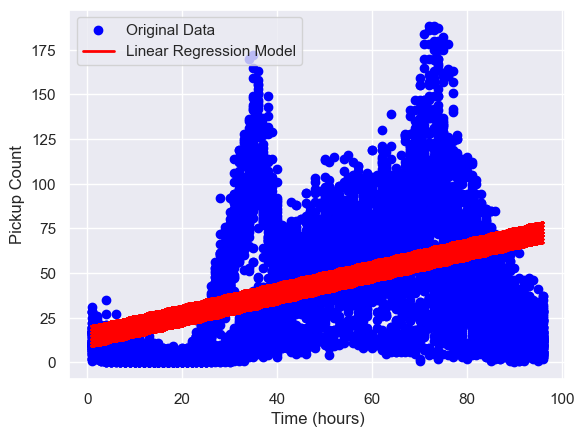

In [ ]:
# Create linear regression model
regr_start = LinearRegression(fit_intercept=False).fit(X_lin_train_c17, y_lin_train_c17)

# Use the trained model to make predictions on the testing set
y_pred_start_c17 = regr_start.predict(X_test_clusters_start_c17)

# Calculate the Mean Squared Error
mse_start = mean_squared_error(y_test_clusters_start[17], y_pred_start_c17)

# Calculate the R-squared (coefficient of determination)
r2_start = r2_score(y_test_clusters_start[17], y_pred_start_c17)

print("Mean Squared Error:", mse_start)
print("R-squared:", r2_start)


# Plot the original data points
plt.scatter(X_test_clusters_start_c17['quarter_of_hour'], y_test_clusters_start[17], color='blue', label='Original Data')

# Plot the predictions made by the model
plt.plot(X_test_clusters_start_c17['quarter_of_hour'], y_pred_start_c17, color='red', linewidth=2, label='Linear Regression Model')

# Add labels and legend
plt.xlabel('Time (hours)')
plt.ylabel('Pickup Count')
plt.legend(loc='best')

# Display the plot
plt.show()

The linear model identifies a positive linear trend throughout the day, however as assumed, the model is not performing very well. The R^2 is 0.16 which is extremely poorly. If we plot the observed values against the predicted values in a 45 degree plot (as seen below), it's also clear to see that the model does not capture the actual pattern. In a 45 degree plot, we would hope for the values to follow the red line, but instead they ate pretty scattered. 

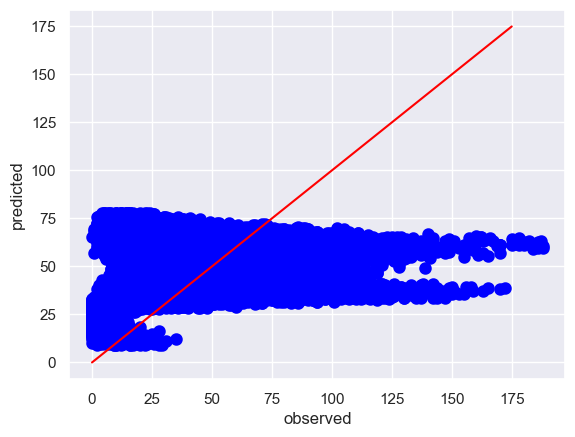

In [ ]:
# Plot outputs
plt.scatter(y_test_clusters_start[17], regr_start.predict(X_test_clusters_start_c17), color='blue',linewidth=3)
plt.plot([0, 175], [0, 175], color="red")
plt.rc('xtick', labelsize=10)    # fontsize of the tick labels
plt.rc('ytick', labelsize=10)    # fontsize of the tick labels
plt.xlabel("observed")
plt.ylabel("predicted")

plt.show()

For cluster 4 

In [ ]:
# As we won't test any hyperparameters for the linear regression, we will concatenate the training and validation set:
X_lin_train_c4 = pd.concat([X_train_clusters_start[4], X_val_clusters_start[4]], axis=0)
X_lin_train_c4 = X_lin_train_c4[['quarter_of_hour', 'hour','minute', 'day_of_week']]
X_test_clusters_start_c4 = X_test_clusters_start[4][['quarter_of_hour', 'hour','minute', 'day_of_week']]

y_lin_train_c4 = pd.concat([y_train_clusters_start[4], y_val_clusters_start[4]], axis=0)

Mean Squared Error: tf.Tensor(
[ 667.57909739  718.94224818  519.32233229 ... 1797.61220076 1251.30596802
  616.90399324], shape=(8737,), dtype=float64)
R-squared: 0.1268580274839045


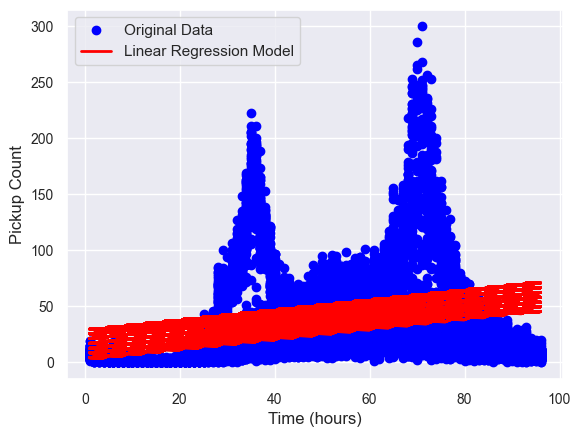

In [ ]:
# Create linear regression model
regr_start = LinearRegression(fit_intercept=False).fit(X_lin_train_c4, y_lin_train_c4)

# Use the trained model to make predictions on the testing set
y_pred_start_c4 = regr_start.predict(X_test_clusters_start_c4)

# Calculate the Mean Squared Error
mse_start = mean_squared_error(y_test_clusters_start[4], y_pred_start_c4)

# Calculate the R-squared (coefficient of determination)
r2_start = r2_score(y_test_clusters_start[4], y_pred_start_c4)

print("Mean Squared Error:", mse_start)
print("R-squared:", r2_start)


# Plot the original data points
plt.scatter(X_test_clusters_start_c4['quarter_of_hour'], y_test_clusters_start[4], color='blue', label='Original Data')

# Plot the predictions made by the model
plt.plot(X_test_clusters_start_c4['quarter_of_hour'], y_pred_start_c4, color='red', linewidth=2, label='Linear Regression Model')

# Add labels and legend
plt.xlabel('Time (hours)')
plt.ylabel('Pickup Count')
plt.legend(loc='best')

# Display the plot
plt.show()

For cluster 4, the model is even performin worse, with a R^2 of 0.13

##### Dropoffs

We repeat the same analysis for dropoffs as we just did for pickups. 

For cluster 16

Mean Squared Error: tf.Tensor(
[ 393.52847246  615.68985441  474.74504267 ... 1883.40871485 1550.29639534
  720.25420155], shape=(8737,), dtype=float64)
R-squared: 0.08541033852261393


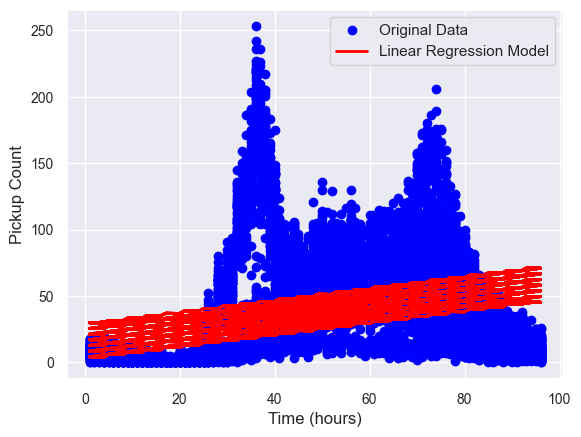

In [ ]:
# Concatenate the training and validation set:
X_lin_train_c16 = pd.concat([X_train_clusters_end[16], X_val_clusters_end[16]], axis=0)
X_lin_train_c16 = X_lin_train_c16[['quarter_of_hour', 'hour','minute', 'day_of_week']]
X_test_clusters_end_c16 = X_test_clusters_end[16][['quarter_of_hour', 'hour','minute', 'day_of_week']]

y_lin_train_c16 = pd.concat([y_train_clusters_end[16], y_val_clusters_end[16]], axis=0)

# Create linear regression model
regr_end_16 = LinearRegression(fit_intercept=False).fit(X_lin_train_c16, y_lin_train_c16)

# Use the trained model to make predictions on the testing set
y_pred_end_c16 = regr_start.predict(X_test_clusters_end_c16)

# Calculate the Mean Squared Error
mse_end_16 = mean_squared_error(y_test_clusters_end[16], y_pred_end_c16)

# Calculate the R-squared (coefficient of determination)
r2_end_16 = r2_score(y_test_clusters_end[16], y_pred_end_c16)

print("Mean Squared Error:", mse_end_16)
print("R-squared:", r2_end_16)


# Plot the original data points
plt.scatter(X_test_clusters_end_c16['quarter_of_hour'], y_test_clusters_end[16], color='blue', label='Original Data')

# Plot the predictions made by the model
plt.plot(X_test_clusters_end_c16['quarter_of_hour'], y_pred_end_c16, color='red', linewidth=2, label='Linear Regression Model')

# Add labels and legend
plt.xlabel('Time (hours)')
plt.ylabel('Pickup Count')
plt.legend(loc='best')

# Display the plot
plt.show()

For cluster 1

Mean Squared Error: tf.Tensor(
[ 393.52847246  615.68985441  353.01317381 ... 1398.62963027 1630.04400217
  667.57909739], shape=(8737,), dtype=float64)
R-squared: 0.1427238148053117


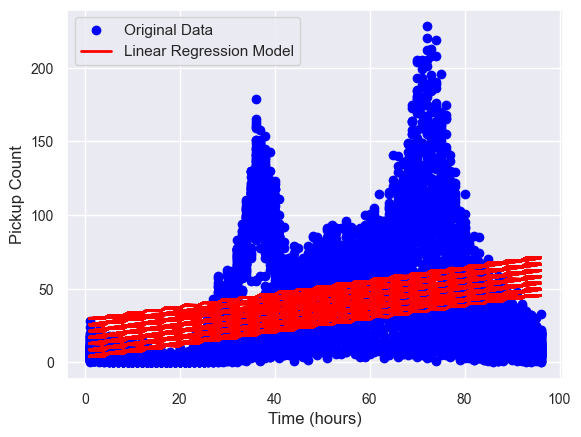

In [ ]:
# Concatenate the training and validation set:
X_lin_train_c1 = pd.concat([X_train_clusters_end[1], X_val_clusters_end[1]], axis=0)
X_lin_train_c1 = X_lin_train_c1[['quarter_of_hour', 'hour','minute', 'day_of_week']]
X_test_clusters_end_c1 = X_test_clusters_end[1][['quarter_of_hour', 'hour','minute', 'day_of_week']]

y_lin_train_c1 = pd.concat([y_train_clusters_end[1], y_val_clusters_end[1]], axis=0)

# Create linear regression model
regr_end_1 = LinearRegression(fit_intercept=False).fit(X_lin_train_c1, y_lin_train_c1)

# Use the trained model to make predictions on the testing set
y_pred_end_c1 = regr_start.predict(X_test_clusters_end_c1)

# Calculate the Mean Squared Error
mse_end_1 = mean_squared_error(y_test_clusters_end[1], y_pred_end_c1)

# Calculate the R-squared (coefficient of determination)
r2_end_1 = r2_score(y_test_clusters_end[1], y_pred_end_c1)

print("Mean Squared Error:", mse_end_1)
print("R-squared:", r2_end_1)


# Plot the original data points
plt.scatter(X_test_clusters_end_c1['quarter_of_hour'], y_test_clusters_end[1], color='blue', label='Original Data')

# Plot the predictions made by the model
plt.plot(X_test_clusters_end_c1['quarter_of_hour'], y_pred_end_c1, color='red', linewidth=2, label='Linear Regression Model')

# Add labels and legend
plt.xlabel('Time (hours)')
plt.ylabel('Pickup Count')
plt.legend(loc='best')

# Display the plot
plt.show()

For the dropoffs, the conclusion is the same as expected. A

#### **Artifical Neural Network**

Firstly, a simple neural network was constructed, with the following hyperparameters as the starting point: 
- Filters = 32 
- Dropout = 0.2 
- Learning rate = 0.2 
- Epochs = 10 
- Batch-size = 32 

After the hyperparameter-tuning, the following ANN architecture was used, as this proved to bring the best predictions. 
The predictions are rounded to the closest whole and positive number, as the predicted number of bikes cannot be a decimal number or negative. 

In [372]:
def train_evaluate_ann(X_train, y_train, X_val, y_val, X_test, y_test):
    
    # Build model 
    model = Sequential() # Initialize the model
    model.add(Dense(128, input_dim = X_train.shape[1], activation = "relu",  kernel_regularizer=regularizers.l2(0.01))) # hidden layer 
    model.add(Dropout(rate = 0.01)) # dropout 
    model.add(Dense(64, input_dim = X_train.shape[1], activation = "relu", kernel_regularizer=regularizers.l2(0.01))) # hidden layer 
    model.add(Dropout(rate = 0.01))  # dropout 
    model.add(Dense(64, input_dim = X_train.shape[1], activation = "relu", kernel_regularizer=regularizers.l2(0.01))) # hidden layer 
    model.add(Dropout(rate = 0.01)) # dropout 
    model.add(Dense(32, input_dim = X_train.shape[1], activation = "relu", kernel_regularizer=regularizers.l2(0.01))) # hidden layer 
    model.add(Dropout(rate = 0.01)) # dropout 
    model.add(Dense(1, activation = "linear"))  # Add an output layer with linear activation 
    model.compile(loss = 'mean_squared_error', optimizer = Adam(learning_rate = 0.001)) # Compile the model with mean squared error (MSE) loss and an optimizer

    # Fit the model
    history = model.fit(X_train, y_train, epochs = 100, batch_size = 32, validation_data = (X_val, y_val)) 
    
    # Predict
    y_pred = model.predict(X_test)
    y_pred = np.maximum(y_pred, 0)  # Ensure non-negative predictions
    y_pred = np.round(y_pred)

    # Visualize 
    plt.plot(range(len(y_pred)), y_pred, label = "Prediction", lw = 0.5) 
    plt.plot(range(len(y_pred)), y_test, label = "Test Data", lw = 0.5) 
    plt.xlabel("Time Interval")
    plt.ylabel("Value")
    plt.legend()
    plt.show()

    # Evaluate the model and print metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(np.mean(mse))
    r2 = r2_score(y_test, y_pred)
    
    return mae, mse, rmse, r2, y_pred, y_test, history 

Now, the ANN is evaluated on the pickups. 

This part of the analysis is only done on cluster 17, which is the most popular cluster. 

Epoch 1/100
727/727 [==============================] - 1s 950us/step - loss: 908.9307 - val_loss: 1147.4930
Epoch 2/100
727/727 [==============================] - 1s 858us/step - loss: 769.7919 - val_loss: 1191.9985
Epoch 3/100
727/727 [==============================] - 1s 826us/step - loss: 732.1979 - val_loss: 1381.8673
Epoch 4/100
727/727 [==============================] - 1s 710us/step - loss: 731.2323 - val_loss: 1185.8030
Epoch 5/100
727/727 [==============================] - 1s 761us/step - loss: 716.6632 - val_loss: 1682.4037
Epoch 6/100
727/727 [==============================] - 1s 768us/step - loss: 721.7209 - val_loss: 1308.0560
Epoch 7/100
727/727 [==============================] - 1s 806us/step - loss: 703.2517 - val_loss: 1205.7449
Epoch 8/100
727/727 [==============================] - 1s 760us/step - loss: 704.2892 - val_loss: 1108.9896
Epoch 9/100
727/727 [==============================] - 1s 725us/step - loss: 700.3271 - val_loss: 1306.2439
Epoch 10/100
727/727 [======

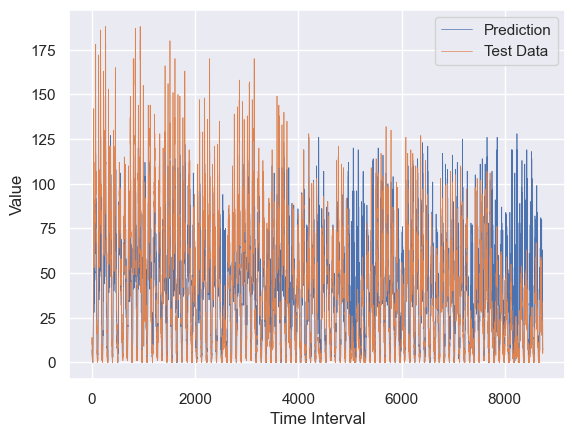

MAE: 14.715806340849262
MSE: tf.Tensor([  9.  81.   4. ...   1. 441.   1.], shape=(8737,), dtype=float32)
RMSE: 22.006258
R2: 0.6236689122603647


In [373]:
# Just doing it for cluster 17 
mae, mse, rmse, r2, y_pred_start, y_test_start, history_start = train_evaluate_ann(X_train_clusters_start[17], y_train_clusters_start[17], X_val_clusters_start[17], y_val_clusters_start[17], X_test_clusters_start[17], y_test_clusters_start[17])
print("MAE:", mae) 
print("MSE:", mse) 
print("RMSE:", rmse) 
print("R2:", r2) 

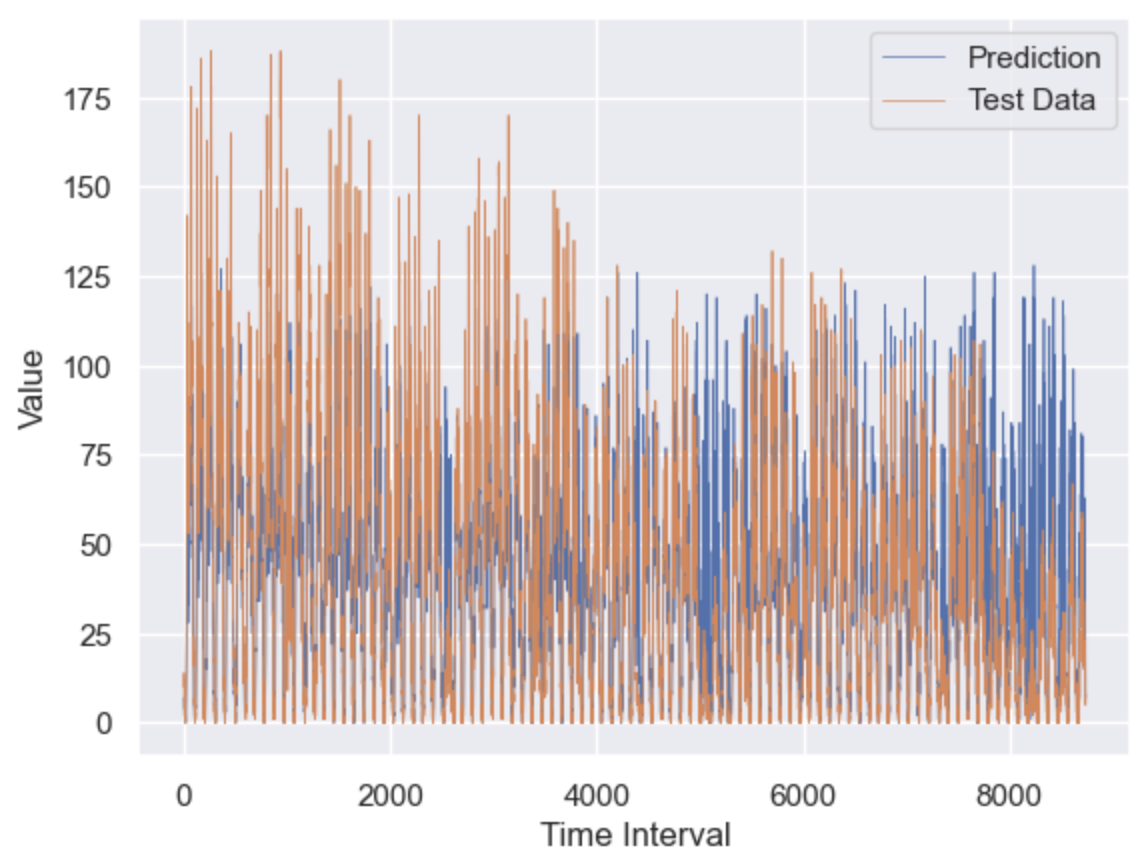

In order to ensure that we are not overfitting, we look at the plot with both the training and the validation errors seen below here. 

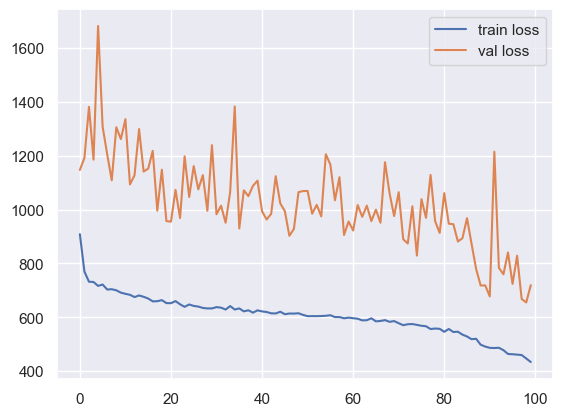

In [374]:
# Checking for overfitting by comparing training error and validation error 
plt.plot(history_start.history["loss"])
plt.plot(history_start.history["val_loss"])
plt.legend(["train loss", "val loss"])
plt.show()

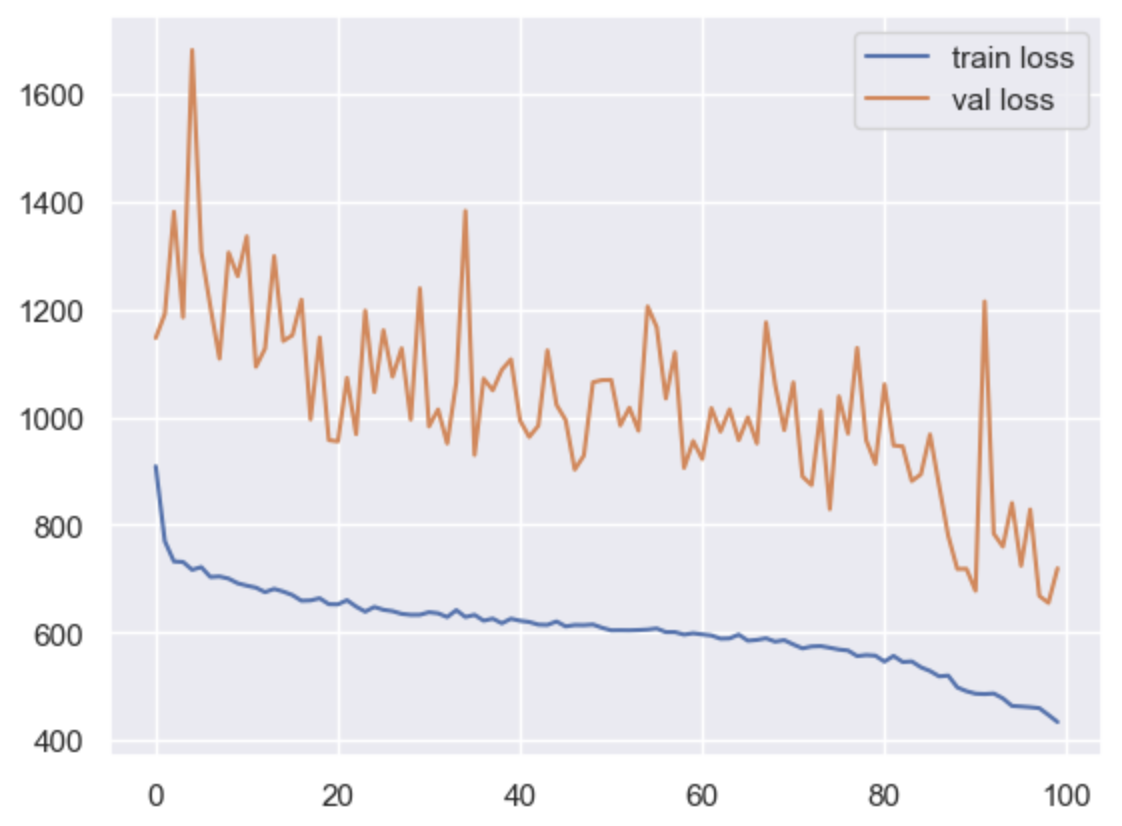

This can perhaps be interpreted as overfitting. The errors should be somewhat the same.

And the ANN is also evaluated on the dropoffs

Epoch 1/100
726/726 [==============================] - 1s 864us/step - loss: 575.1461 - val_loss: 604.1740
Epoch 2/100
726/726 [==============================] - 0s 687us/step - loss: 489.2085 - val_loss: 576.3932
Epoch 3/100
726/726 [==============================] - 1s 697us/step - loss: 474.9750 - val_loss: 586.5933
Epoch 4/100
726/726 [==============================] - 0s 682us/step - loss: 467.4178 - val_loss: 579.2840
Epoch 5/100
726/726 [==============================] - 0s 679us/step - loss: 465.3482 - val_loss: 584.6384
Epoch 6/100
726/726 [==============================] - 0s 680us/step - loss: 462.9860 - val_loss: 591.2228
Epoch 7/100
726/726 [==============================] - 0s 678us/step - loss: 460.2135 - val_loss: 554.2327
Epoch 8/100
726/726 [==============================] - 0s 678us/step - loss: 456.3554 - val_loss: 689.6340
Epoch 9/100
726/726 [==============================] - 0s 681us/step - loss: 447.8026 - val_loss: 600.8300
Epoch 10/100
726/726 [===============

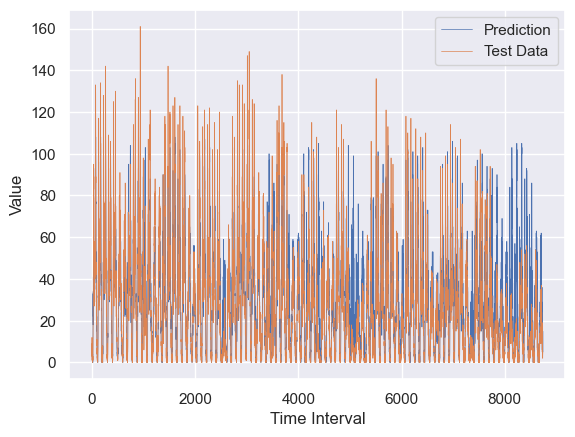

MAE: 10.07920338789058
MSE: tf.Tensor([  9.  49.  16. ...   1. 121.   0.], shape=(8737,), dtype=float32)
RMSE: 15.602801
R2: 0.6711622988707244


In [375]:
# Just doing it for cluster 17 
mae, mse, rmse, r2, y_pred_end, y_test_end, history_end = train_evaluate_ann(X_train_clusters_end[17], y_train_clusters_end[17], X_val_clusters_end[17], y_val_clusters_end[17], X_test_clusters_end[17], y_test_clusters_end[17])
print("MAE:", mae) 
print("MSE:", mse) 
print("RMSE:", rmse) 
print("R2:", r2) 

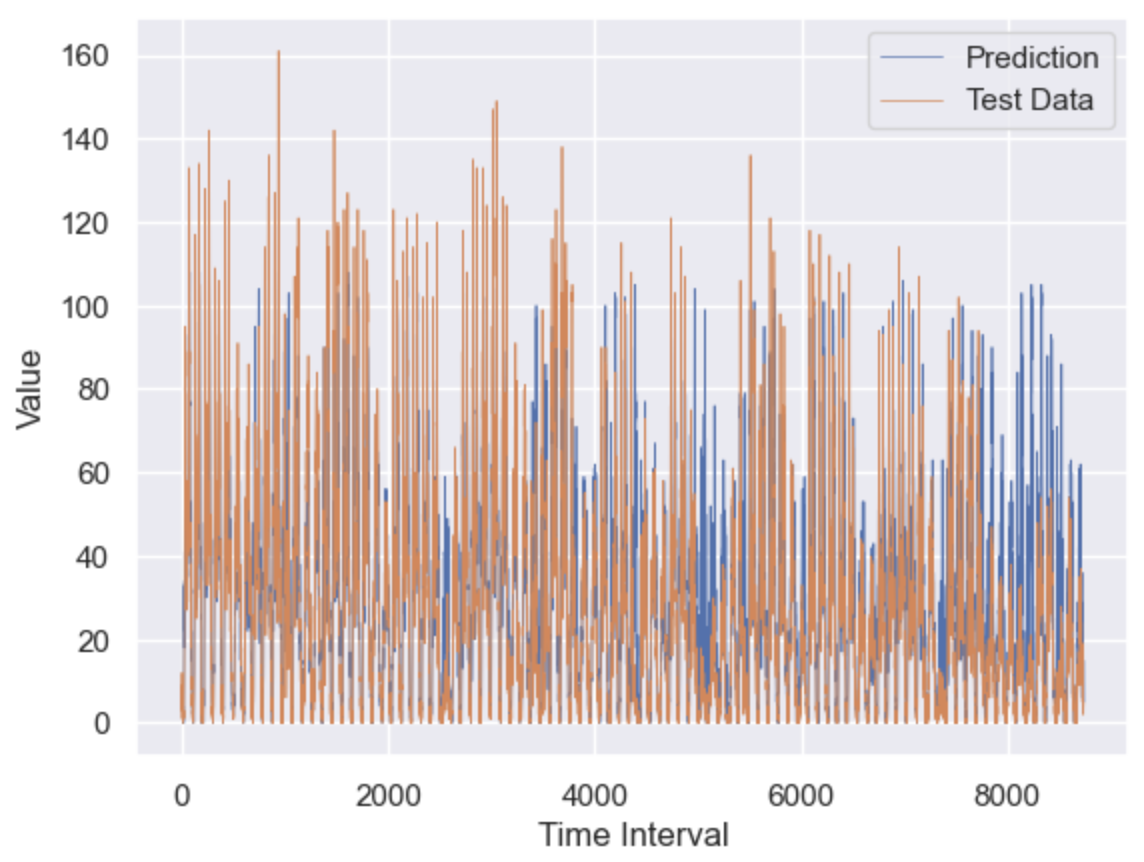

Again, checking for overfitting

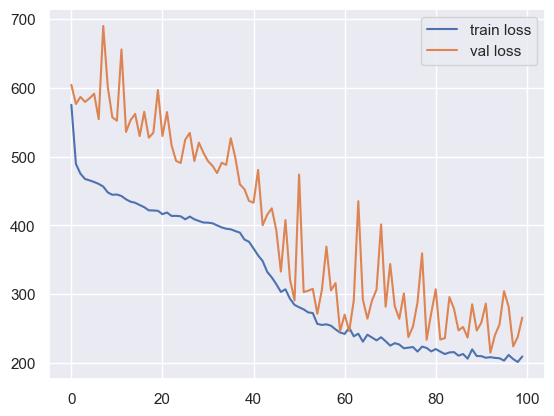

In [376]:
# Checking for overfitting by comparing training error and validation error 
plt.plot(history_end.history["loss"])
plt.plot(history_end.history["val_loss"])
plt.legend(["train loss", "val loss"])
plt.show()

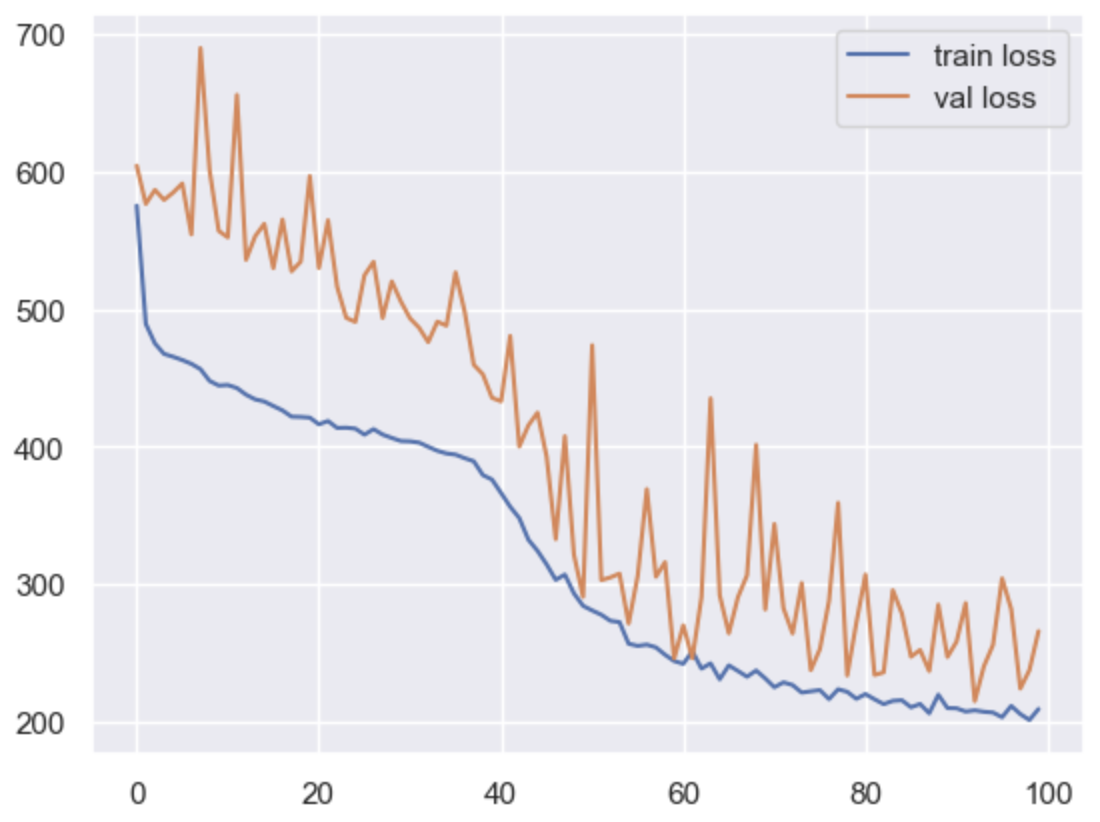

This can perhaps be interpreted as overfitting. The errors should be somewhat the same.

Now we have an ANN that can predict the number of bikes that are picked up and dropped off at one specific cluster. The model can also be used to predict the number of bikes that are picked and dropped off at other clusters. 

To inspect the model, we look at how many bikes are expected to be picked up and droped off in a specific set of 24 hours. 

Below here, we see the specific number of predicted pick-ups in cluster 17 for the specific 24 hours, compared to the actual number of bikes picked up. 

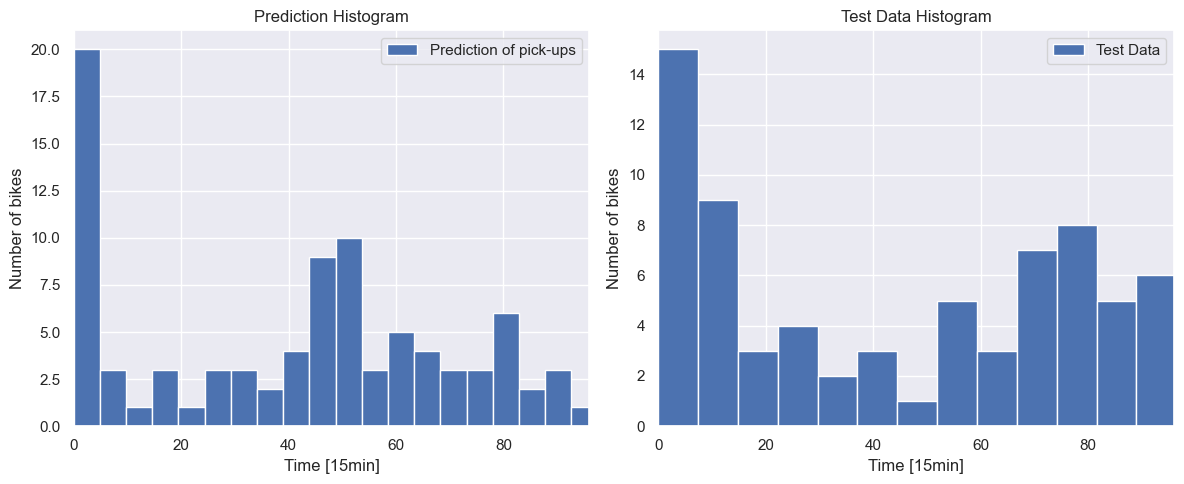

In [377]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Plot the first histogram in the first subplot
axs[0].hist(y_pred_start[:96], bins=24, label="Prediction of pick-ups")
axs[0].set_title("Prediction Histogram")
axs[0].set_xlabel("Time [15min]")
axs[0].set_ylabel("Number of bikes")
axs[0].set_xlim(0, 96)  

# Plot the second histogram in the second subplot
hist, bins, _ = axs[1].hist(y_test_start[:96], bins=24, label="Test Data")
axs[1].set_title("Test Data Histogram")
axs[1].set_xlabel("Time [15min]")
axs[1].set_ylabel("Number of bikes")
axs[1].set_xlim(0, 96)  

# Add a legend to each subplot
axs[0].legend()
axs[1].legend()

# Adjust the layout to prevent overlap
plt.tight_layout()
plt.show()

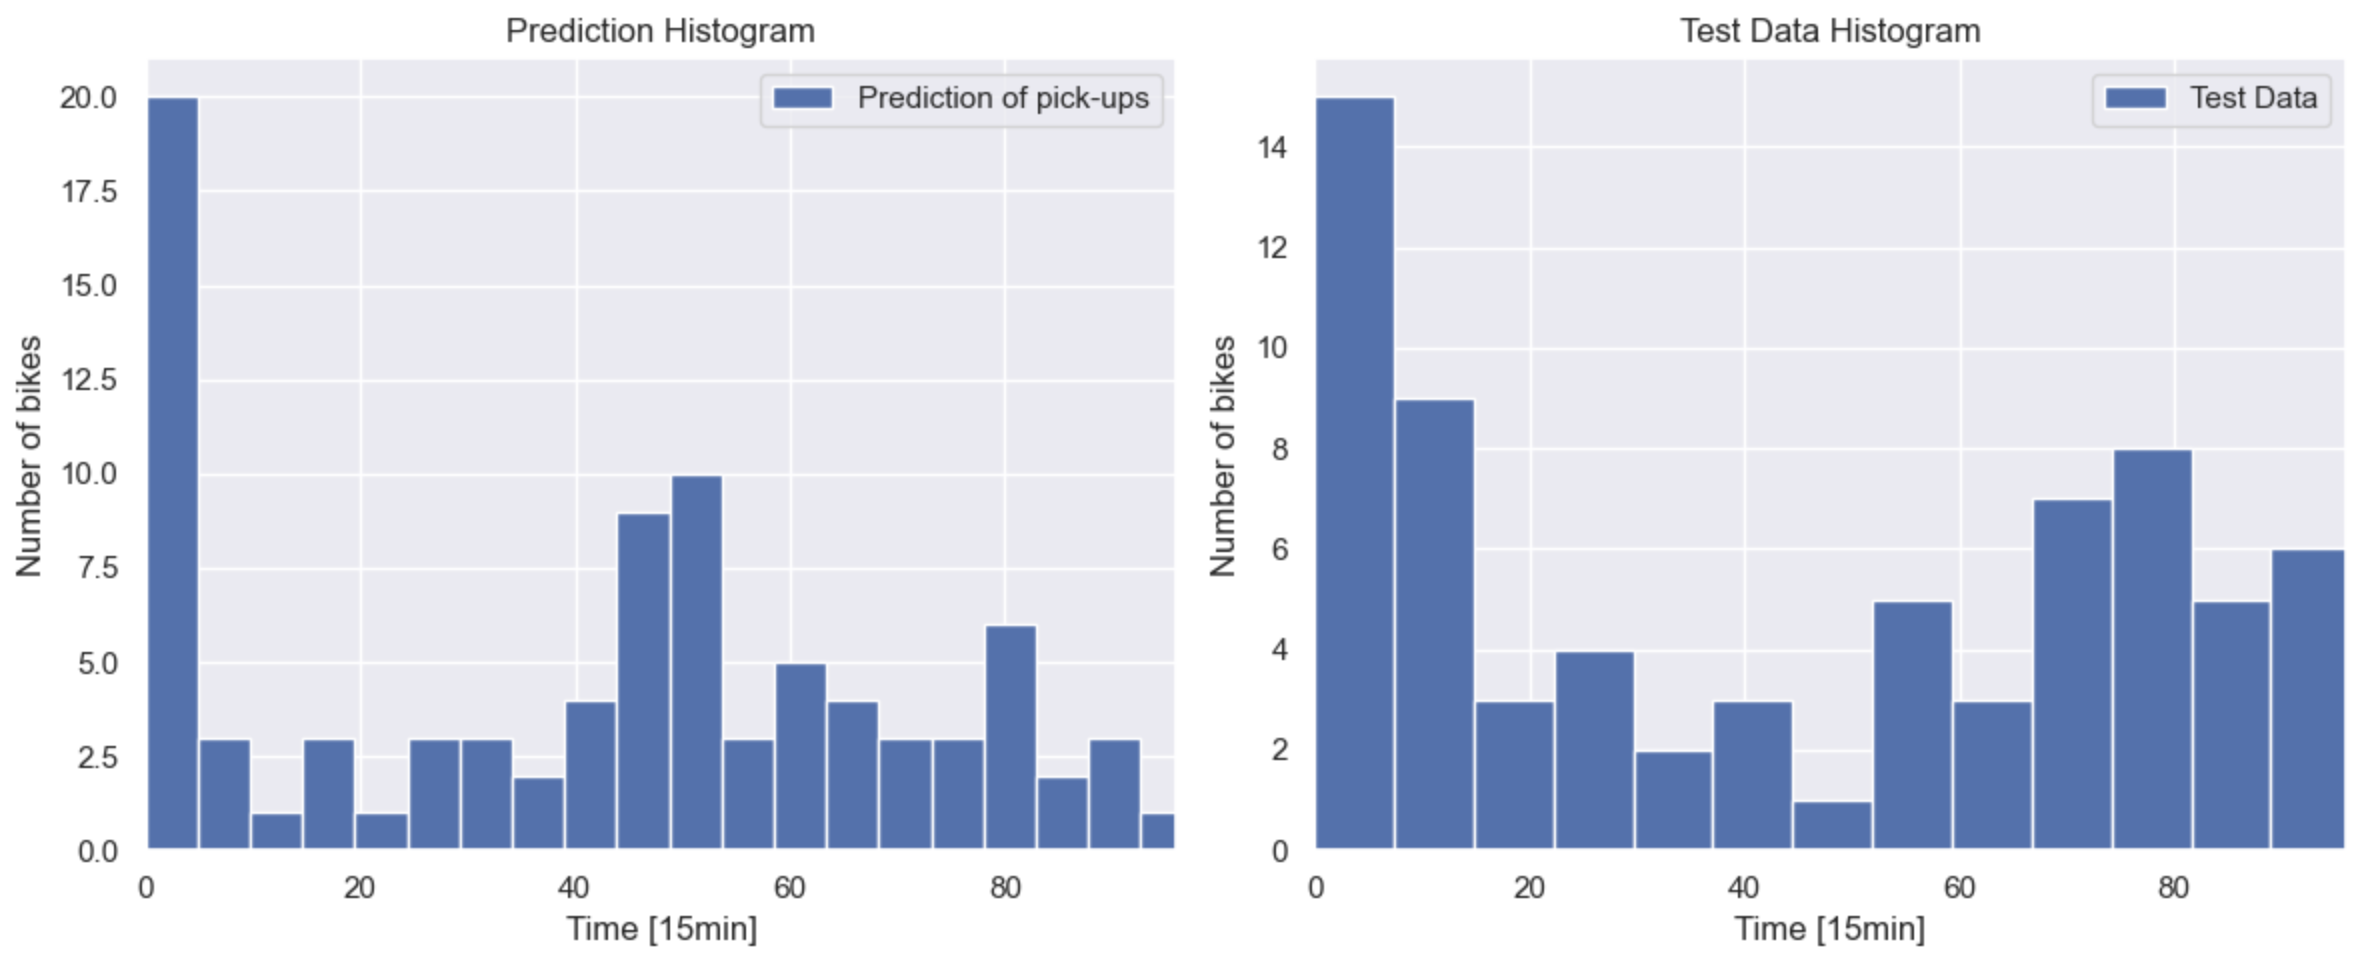

Likewise, we can look at the predicted departures (drop-offs) compared to the actual drop offs below here 

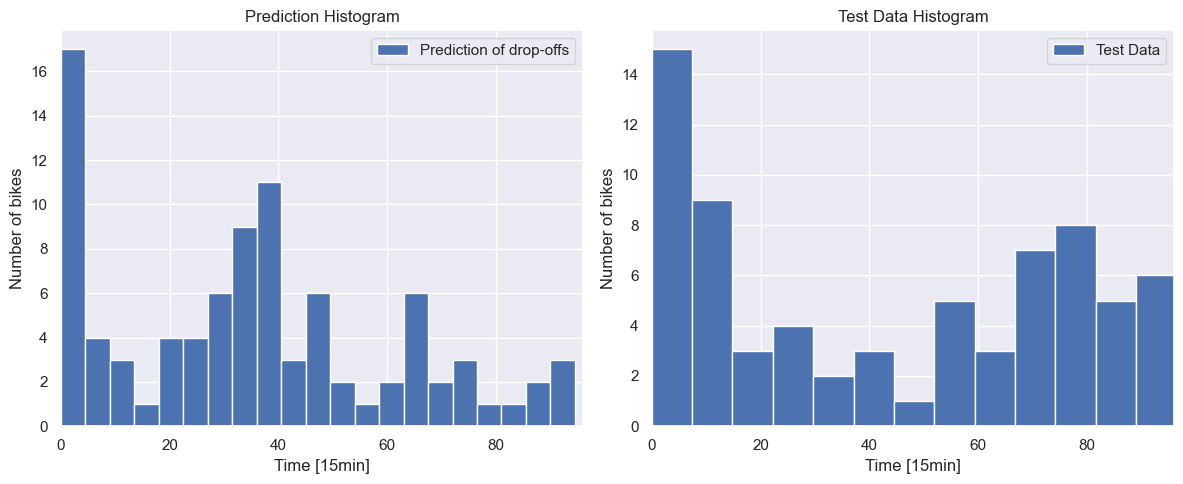

In [378]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))  # 1 row, 2 columns of subplots

# Plot the first histogram in the first subplot
axs[0].hist(y_pred_end[:96], bins=24, label="Prediction of drop-offs")
axs[0].set_title("Prediction Histogram")
axs[0].set_xlabel("Time [15min]")
axs[0].set_ylabel("Number of bikes")
axs[0].set_xlim(0, 96)  

# Plot the second histogram in the second subplot
axs[1].hist(y_test_start[:96], bins=24, label="Test Data")
axs[1].set_title("Test Data Histogram")
axs[1].set_xlabel("Time [15min]")
axs[1].set_ylabel("Number of bikes")
axs[1].set_xlim(0, 96)  

# Add a legend to each subplot
axs[0].legend()
axs[1].legend()

# Adjust the layout to prevent overlap
plt.tight_layout()
plt.show()

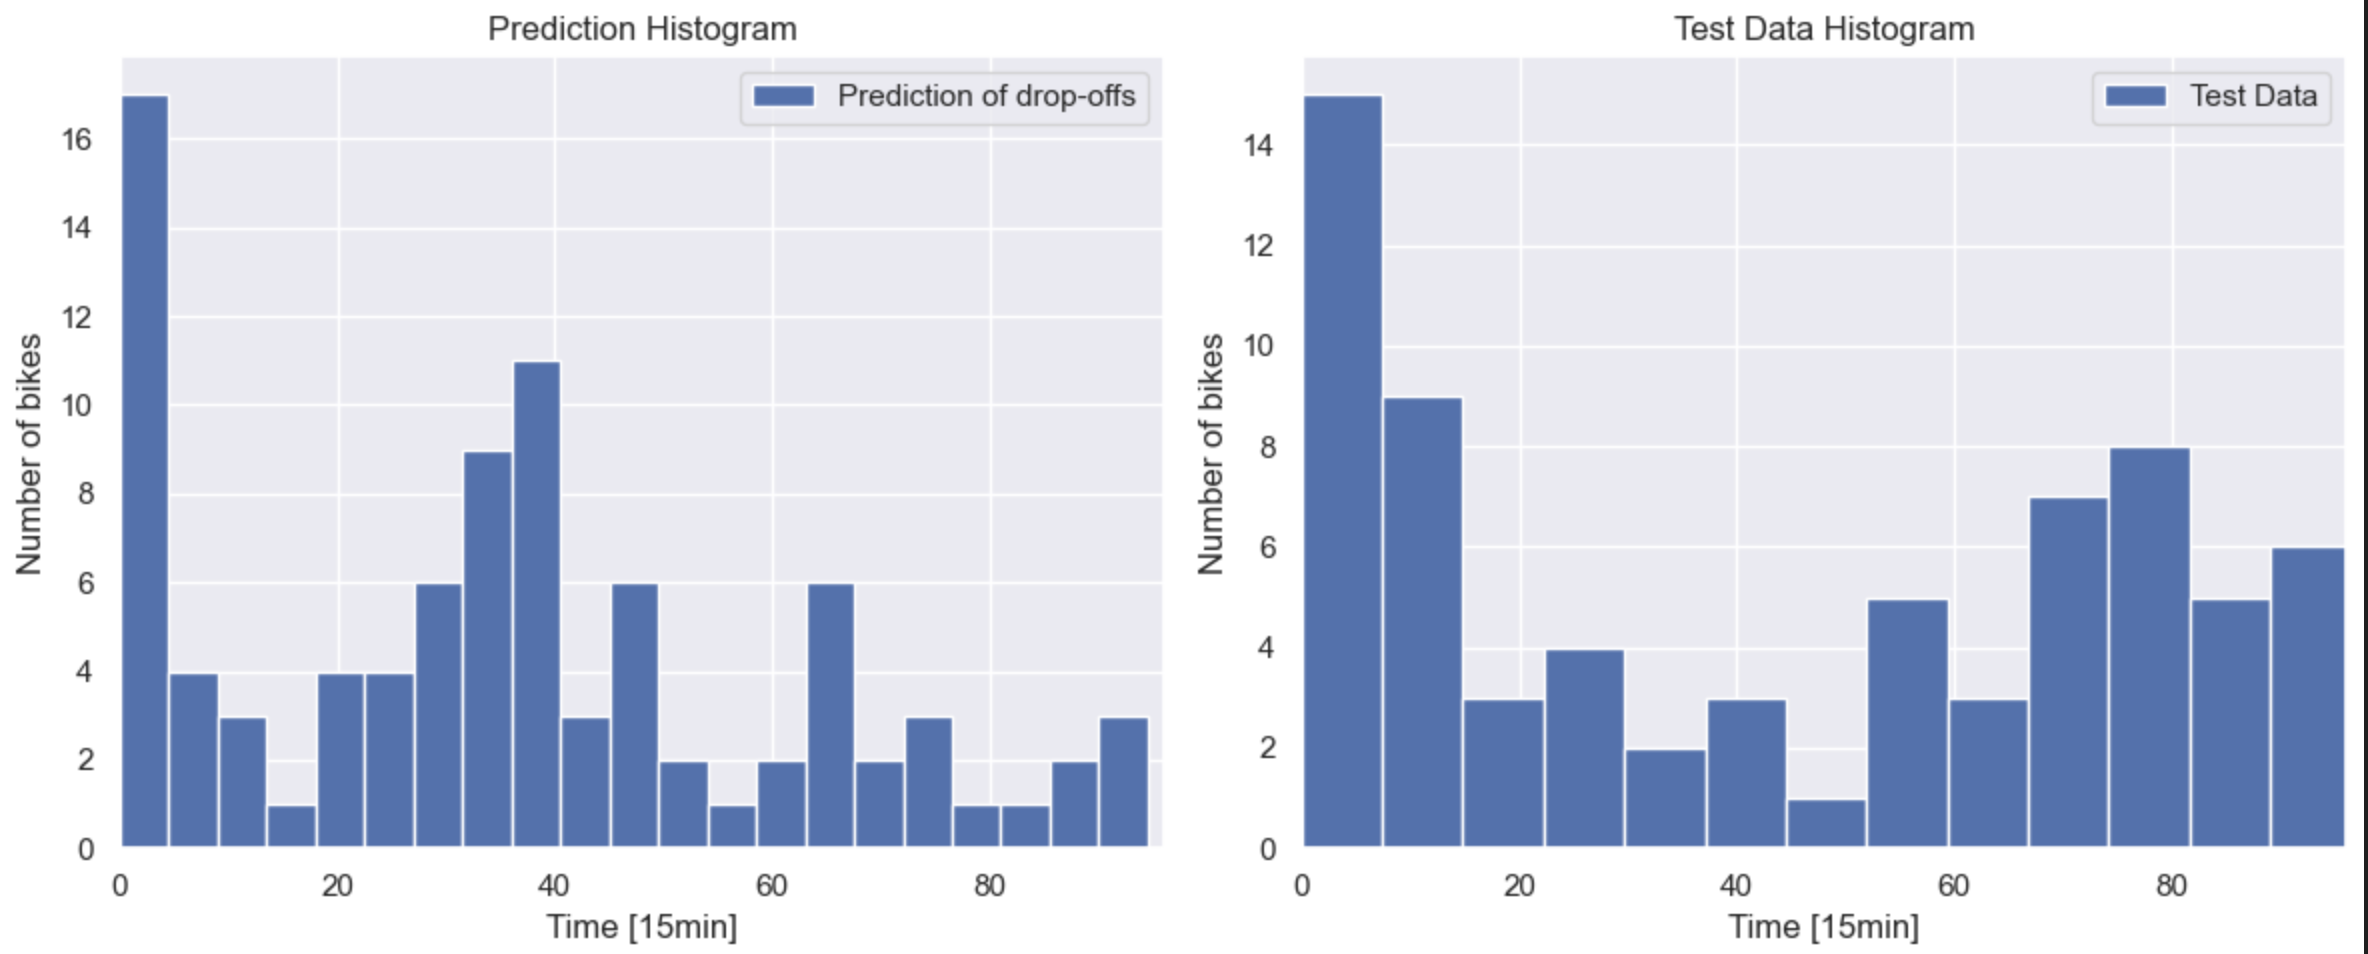

### **Required Number of Bikes at Each Cluster**

Now that we have predicted the number of pick-ups and drop-offs in just one cluster, we will do it for all 21 clusters. This will be necessary to compute the required number of bikes to be places at each cluster in the nights, to avoid having a deficit number of bikes compared to the demand. 

For this part, we will need to just redefine the train_evaluate_ann to now print all plots, because if we dont, it will print 52 plots. 

In [323]:
def train_evaluate_ann(X_train, y_train, X_val, y_val, X_test, y_test):
    
    # Build model 
    model = Sequential() # Initialize the model
    model.add(Dense(128, input_dim = X_train.shape[1], activation = "relu",  kernel_regularizer=regularizers.l2(0.01))) # hidden layer 
    model.add(Dropout(rate = 0.01)) # dropout 
    model.add(Dense(64, input_dim = X_train.shape[1], activation = "relu", kernel_regularizer=regularizers.l2(0.01))) # hidden layer 
    model.add(Dropout(rate = 0.01))  # dropout 
    model.add(Dense(64, input_dim = X_train.shape[1], activation = "relu", kernel_regularizer=regularizers.l2(0.01))) # hidden layer 
    model.add(Dropout(rate = 0.01)) # dropout 
    model.add(Dense(32, input_dim = X_train.shape[1], activation = "relu", kernel_regularizer=regularizers.l2(0.01))) # hidden layer 
    model.add(Dropout(rate = 0.01)) # dropout 
    model.add(Dense(1, activation = "linear"))  # Add an output layer with linear activation 
    model.compile(loss = 'mean_squared_error', optimizer = Adam(learning_rate = 0.001)) # Compile the model with mean squared error (MSE) loss and an optimizer

    # Fit the model
    history = model.fit(X_train, y_train, epochs = 100, batch_size = 32, validation_data = (X_val, y_val)) 
    
    # Predict
    y_pred = model.predict(X_test)
    y_pred = np.maximum(y_pred, 0)  # Ensure non-negative predictions
    y_pred = np.round(y_pred)

    # Visualize 
    plt.plot(range(len(y_pred)), y_pred, label = "Prediction", lw = 0.5) 
    plt.plot(range(len(y_pred)), y_test, label = "Test Data", lw = 0.5) 
    plt.xlabel("Time Interval")
    plt.ylabel("Value")
    plt.legend()
    #plt.show()

    # Evaluate the model and print metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(np.mean(mse))
    r2 = r2_score(y_test, y_pred)
    
    return mae, mse, rmse, r2, y_pred, y_test, history 

In [347]:
# Disabling the plot 
plt.ioff()

# Initialize an empty list to store the output values for each cluster
output_end = []
output_start = []

# Loop through the clusters
for i in range(21):
    # Call your train_evaluate_ann function for the i-th cluster
    mae_end, mse_end, rmse_end, r2_end, y_pred_end, y_test_end, history_end = train_evaluate_ann(
        X_train_clusters_end[i], y_train_clusters_end[i],
        X_val_clusters_end[i], y_val_clusters_end[i],
        X_test_clusters_end[i], y_test_clusters_end[i])

    # Call your train_evaluate_ann function for the i-th cluster
    mae_start, mse_start, rmse_start, r2_start, y_pred_start, y_test_start, history_start = train_evaluate_ann(
        X_train_clusters_start[i], y_train_clusters_start[i],
        X_val_clusters_start[i], y_val_clusters_start[i],
        X_test_clusters_start[i], y_test_clusters_start[i])
    
    # Append the output values as a list for the i-th cluster
    output_end.append([mae_end, mse_end, rmse_end, r2_end, y_pred_end, y_test_end, history_end])
    output_start.append([mae_start, mse_start, rmse_start, r2_start, y_pred_start, y_test_start, history_start])

# Create a pandas DataFrame from the output data
columns_end = ["mae_end", "mse_end", "rmse_end", "r2_end", "y_pred_end", "y_test_end", "history_end"]
output_df_end = pd.DataFrame(output_end, columns=columns_end)

columns_start = ["mae_start", "mse_start", "rmse_start", "r2_start", "y_pred_start", "y_test_start", "history_start"]
output_df_start = pd.DataFrame(output_start, columns=columns_start)

Epoch 1/100
726/726 [==============================] - 2s 1ms/step - loss: 168.2786 - val_loss: 129.7696
Epoch 2/100
726/726 [==============================] - 1s 1ms/step - loss: 67.2782 - val_loss: 142.4497
Epoch 3/100
726/726 [==============================] - 1s 714us/step - loss: 64.6495 - val_loss: 118.8909
Epoch 4/100
726/726 [==============================] - 1s 838us/step - loss: 63.5683 - val_loss: 123.2843
Epoch 5/100
726/726 [==============================] - 1s 735us/step - loss: 62.6422 - val_loss: 126.8072
Epoch 6/100
726/726 [==============================] - 1s 717us/step - loss: 62.8601 - val_loss: 124.1949
Epoch 7/100
726/726 [==============================] - 1s 856us/step - loss: 62.2790 - val_loss: 128.4051
Epoch 8/100
726/726 [==============================] - 1s 729us/step - loss: 61.8320 - val_loss: 132.6016
Epoch 9/100
726/726 [==============================] - 1s 798us/step - loss: 61.6360 - val_loss: 111.6228
Epoch 10/100
726/726 [===========================

Epoch 1/100
726/726 [==============================] - 2s 1ms/step - loss: 491.0836 - val_loss: 503.1251
Epoch 2/100
726/726 [==============================] - 1s 924us/step - loss: 413.3760 - val_loss: 509.0437
Epoch 3/100
726/726 [==============================] - 1s 777us/step - loss: 406.2939 - val_loss: 568.7644
Epoch 4/100
726/726 [==============================] - 1s 826us/step - loss: 401.1665 - val_loss: 548.1768
Epoch 5/100
726/726 [==============================] - 1s 785us/step - loss: 398.6527 - val_loss: 545.3859
Epoch 6/100
726/726 [==============================] - 1s 822us/step - loss: 393.9443 - val_loss: 499.0781
Epoch 7/100
726/726 [==============================] - 1s 768us/step - loss: 389.7079 - val_loss: 511.0210
Epoch 8/100
726/726 [==============================] - 1s 723us/step - loss: 389.7029 - val_loss: 605.4149
Epoch 9/100
726/726 [==============================] - 1s 694us/step - loss: 391.9913 - val_loss: 518.8846
Epoch 10/100
726/726 [=================

Epoch 1/100
727/727 [==============================] - 1s 812us/step - loss: 951.0741 - val_loss: 1187.8762
Epoch 2/100
727/727 [==============================] - 0s 673us/step - loss: 813.4985 - val_loss: 1154.3942
Epoch 3/100
727/727 [==============================] - 0s 673us/step - loss: 780.4547 - val_loss: 1086.1359
Epoch 4/100
727/727 [==============================] - 0s 675us/step - loss: 769.6981 - val_loss: 1075.0966
Epoch 5/100
727/727 [==============================] - 0s 676us/step - loss: 757.3727 - val_loss: 1128.2102
Epoch 6/100
727/727 [==============================] - 0s 673us/step - loss: 747.2049 - val_loss: 1020.1455
Epoch 7/100
727/727 [==============================] - 0s 674us/step - loss: 743.4695 - val_loss: 1086.8425
Epoch 8/100
727/727 [==============================] - 0s 674us/step - loss: 735.8028 - val_loss: 1228.6580
Epoch 9/100
727/727 [==============================] - 1s 736us/step - loss: 727.1851 - val_loss: 1052.0332
Epoch 10/100
727/727 [======

Epoch 1/100
727/727 [==============================] - 1s 893us/step - loss: 570.9788 - val_loss: 661.7214
Epoch 2/100
727/727 [==============================] - 0s 675us/step - loss: 485.5203 - val_loss: 693.6308
Epoch 3/100
727/727 [==============================] - 1s 785us/step - loss: 475.8522 - val_loss: 742.8597
Epoch 4/100
727/727 [==============================] - 1s 712us/step - loss: 461.8914 - val_loss: 706.8353
Epoch 5/100
727/727 [==============================] - 1s 761us/step - loss: 463.1970 - val_loss: 911.1167
Epoch 6/100
727/727 [==============================] - 1s 767us/step - loss: 463.8751 - val_loss: 679.5901
Epoch 7/100
727/727 [==============================] - 1s 879us/step - loss: 456.9583 - val_loss: 687.9056
Epoch 8/100
727/727 [==============================] - 0s 681us/step - loss: 456.1116 - val_loss: 750.8247
Epoch 9/100
727/727 [==============================] - 1s 765us/step - loss: 455.6346 - val_loss: 751.2922
Epoch 10/100
727/727 [===============

Epoch 1/100
726/726 [==============================] - 1s 781us/step - loss: 687.2993 - val_loss: 923.7002
Epoch 2/100
726/726 [==============================] - 0s 654us/step - loss: 584.9590 - val_loss: 946.1526
Epoch 3/100
726/726 [==============================] - 0s 656us/step - loss: 573.9308 - val_loss: 1059.2616
Epoch 4/100
726/726 [==============================] - 0s 658us/step - loss: 565.4741 - val_loss: 829.4683
Epoch 5/100
726/726 [==============================] - 0s 653us/step - loss: 560.0808 - val_loss: 921.0868
Epoch 6/100
726/726 [==============================] - 0s 656us/step - loss: 551.9713 - val_loss: 832.9632
Epoch 7/100
726/726 [==============================] - 0s 653us/step - loss: 554.3229 - val_loss: 798.2477
Epoch 8/100
726/726 [==============================] - 0s 656us/step - loss: 549.4412 - val_loss: 846.6282
Epoch 9/100
726/726 [==============================] - 0s 656us/step - loss: 545.6214 - val_loss: 866.9144
Epoch 10/100
726/726 [==============

Epoch 1/100
726/726 [==============================] - 1s 810us/step - loss: 123.9103 - val_loss: 121.3579
Epoch 2/100
726/726 [==============================] - 7s 10ms/step - loss: 95.6726 - val_loss: 123.0914
Epoch 3/100
726/726 [==============================] - 1s 700us/step - loss: 91.7036 - val_loss: 138.8977
Epoch 4/100
726/726 [==============================] - 1s 713us/step - loss: 91.2485 - val_loss: 126.6968
Epoch 5/100
726/726 [==============================] - 1s 717us/step - loss: 90.0222 - val_loss: 115.7968
Epoch 6/100
726/726 [==============================] - 1s 717us/step - loss: 89.3836 - val_loss: 120.0814
Epoch 7/100
726/726 [==============================] - 0s 663us/step - loss: 88.6317 - val_loss: 124.6455
Epoch 8/100
726/726 [==============================] - 0s 684us/step - loss: 87.7057 - val_loss: 127.9718
Epoch 9/100
726/726 [==============================] - 1s 694us/step - loss: 88.0912 - val_loss: 127.8004
Epoch 10/100
726/726 [========================

Epoch 1/100
726/726 [==============================] - 1s 1ms/step - loss: 133.3691 - val_loss: 158.0210
Epoch 2/100
726/726 [==============================] - 1s 761us/step - loss: 114.1191 - val_loss: 172.8626
Epoch 3/100
726/726 [==============================] - 1s 726us/step - loss: 112.5528 - val_loss: 180.8920
Epoch 4/100
726/726 [==============================] - 1s 723us/step - loss: 111.2140 - val_loss: 161.7858
Epoch 5/100
726/726 [==============================] - 1s 746us/step - loss: 110.7771 - val_loss: 161.8493
Epoch 6/100
726/726 [==============================] - 1s 863us/step - loss: 109.9860 - val_loss: 179.2634
Epoch 7/100
726/726 [==============================] - 1s 875us/step - loss: 110.1766 - val_loss: 145.3137
Epoch 8/100
726/726 [==============================] - 1s 796us/step - loss: 109.1930 - val_loss: 147.0956
Epoch 9/100
726/726 [==============================] - 1s 772us/step - loss: 108.8136 - val_loss: 184.4682
Epoch 10/100
726/726 [=================

Epoch 1/100
726/726 [==============================] - 1s 788us/step - loss: 87.3914 - val_loss: 84.2885
Epoch 2/100
726/726 [==============================] - 1s 702us/step - loss: 50.6845 - val_loss: 74.9300
Epoch 3/100
726/726 [==============================] - 1s 697us/step - loss: 48.9234 - val_loss: 74.5763
Epoch 4/100
726/726 [==============================] - 1s 826us/step - loss: 47.7964 - val_loss: 75.8535
Epoch 5/100
726/726 [==============================] - 1s 879us/step - loss: 47.6038 - val_loss: 67.7775
Epoch 6/100
726/726 [==============================] - 1s 770us/step - loss: 47.1551 - val_loss: 74.6650
Epoch 7/100
726/726 [==============================] - 1s 698us/step - loss: 47.0610 - val_loss: 85.1132
Epoch 8/100
726/726 [==============================] - 1s 706us/step - loss: 46.4615 - val_loss: 68.9573
Epoch 9/100
726/726 [==============================] - 1s 701us/step - loss: 46.6643 - val_loss: 67.8737
Epoch 10/100
726/726 [==============================] -

Epoch 1/100
726/726 [==============================] - 1s 871us/step - loss: 1006.2395 - val_loss: 1075.9015
Epoch 2/100
726/726 [==============================] - 1s 786us/step - loss: 835.4130 - val_loss: 985.3745
Epoch 3/100
726/726 [==============================] - 1s 777us/step - loss: 798.9625 - val_loss: 976.2747
Epoch 4/100
726/726 [==============================] - 1s 842us/step - loss: 781.8591 - val_loss: 1209.0731
Epoch 5/100
726/726 [==============================] - 1s 770us/step - loss: 751.6439 - val_loss: 1187.1272
Epoch 6/100
726/726 [==============================] - 1s 706us/step - loss: 744.6956 - val_loss: 934.7369
Epoch 7/100
726/726 [==============================] - 1s 707us/step - loss: 720.2957 - val_loss: 937.3779
Epoch 8/100
726/726 [==============================] - 1s 776us/step - loss: 712.4702 - val_loss: 938.6842
Epoch 9/100
726/726 [==============================] - 1s 725us/step - loss: 696.8495 - val_loss: 880.2998
Epoch 10/100
726/726 [===========

Epoch 1/100
726/726 [==============================] - 1s 816us/step - loss: 1390.8625 - val_loss: 1666.3622
Epoch 2/100
726/726 [==============================] - 0s 676us/step - loss: 1247.0229 - val_loss: 1710.4493
Epoch 3/100
726/726 [==============================] - 0s 672us/step - loss: 1209.9182 - val_loss: 1603.1616
Epoch 4/100
726/726 [==============================] - 0s 665us/step - loss: 1191.0481 - val_loss: 1618.8925
Epoch 5/100
726/726 [==============================] - 0s 668us/step - loss: 1180.1581 - val_loss: 1595.0344
Epoch 6/100
726/726 [==============================] - 0s 668us/step - loss: 1165.1071 - val_loss: 1538.5875
Epoch 7/100
726/726 [==============================] - 0s 670us/step - loss: 1149.3383 - val_loss: 1604.3470
Epoch 8/100
726/726 [==============================] - 0s 669us/step - loss: 1145.8015 - val_loss: 1622.6255
Epoch 9/100
726/726 [==============================] - 0s 668us/step - loss: 1133.3999 - val_loss: 1534.8251
Epoch 10/100
726/72

Epoch 1/100
726/726 [==============================] - 1s 767us/step - loss: 565.8309 - val_loss: 652.9611
Epoch 2/100
726/726 [==============================] - 0s 669us/step - loss: 464.4813 - val_loss: 662.1979
Epoch 3/100
726/726 [==============================] - 1s 730us/step - loss: 456.8335 - val_loss: 779.2155
Epoch 4/100
726/726 [==============================] - 0s 668us/step - loss: 446.7747 - val_loss: 663.6926
Epoch 5/100
726/726 [==============================] - 0s 670us/step - loss: 443.5768 - val_loss: 656.1102
Epoch 6/100
726/726 [==============================] - 0s 672us/step - loss: 438.2654 - val_loss: 757.3671
Epoch 7/100
726/726 [==============================] - 0s 673us/step - loss: 435.8098 - val_loss: 729.2278
Epoch 8/100
726/726 [==============================] - 0s 676us/step - loss: 434.7305 - val_loss: 689.3039
Epoch 9/100
726/726 [==============================] - 0s 670us/step - loss: 431.4615 - val_loss: 782.7959
Epoch 10/100
726/726 [===============

Epoch 1/100
727/727 [==============================] - 1s 790us/step - loss: 105.2973 - val_loss: 186.0409
Epoch 2/100
727/727 [==============================] - 1s 688us/step - loss: 79.3586 - val_loss: 187.8582
Epoch 3/100
727/727 [==============================] - 1s 693us/step - loss: 76.8189 - val_loss: 146.8061
Epoch 4/100
727/727 [==============================] - 1s 783us/step - loss: 76.7658 - val_loss: 159.2447
Epoch 5/100
727/727 [==============================] - 1s 690us/step - loss: 75.6559 - val_loss: 177.3937
Epoch 6/100
727/727 [==============================] - 1s 695us/step - loss: 74.8813 - val_loss: 170.9366
Epoch 7/100
727/727 [==============================] - 1s 690us/step - loss: 74.8415 - val_loss: 176.2258
Epoch 8/100
727/727 [==============================] - 1s 688us/step - loss: 73.9766 - val_loss: 149.0163
Epoch 9/100
727/727 [==============================] - 1s 688us/step - loss: 74.3771 - val_loss: 165.0798
Epoch 10/100
727/727 [=======================

Epoch 1/100
726/726 [==============================] - 1s 775us/step - loss: 78.5806 - val_loss: 84.0346
Epoch 2/100
726/726 [==============================] - 1s 761us/step - loss: 50.8689 - val_loss: 72.7333
Epoch 3/100
726/726 [==============================] - 0s 681us/step - loss: 48.6587 - val_loss: 76.3112
Epoch 4/100
726/726 [==============================] - 0s 682us/step - loss: 47.9409 - val_loss: 79.5079
Epoch 5/100
726/726 [==============================] - 0s 665us/step - loss: 47.4966 - val_loss: 74.8732
Epoch 6/100
726/726 [==============================] - 0s 686us/step - loss: 47.2162 - val_loss: 81.7107
Epoch 7/100
726/726 [==============================] - 0s 662us/step - loss: 46.6620 - val_loss: 66.1542
Epoch 8/100
726/726 [==============================] - 1s 734us/step - loss: 46.4328 - val_loss: 83.8749
Epoch 9/100
726/726 [==============================] - 1s 861us/step - loss: 45.7977 - val_loss: 74.2917
Epoch 10/100
726/726 [==============================] -

Epoch 1/100
726/726 [==============================] - 1s 775us/step - loss: 418.4344 - val_loss: 608.8730
Epoch 2/100
726/726 [==============================] - 0s 686us/step - loss: 358.3722 - val_loss: 509.1110
Epoch 3/100
726/726 [==============================] - 0s 680us/step - loss: 349.3858 - val_loss: 479.9554
Epoch 4/100
726/726 [==============================] - 0s 675us/step - loss: 346.4829 - val_loss: 589.5575
Epoch 5/100
726/726 [==============================] - 0s 679us/step - loss: 342.6714 - val_loss: 579.4648
Epoch 6/100
726/726 [==============================] - 0s 679us/step - loss: 341.0033 - val_loss: 525.1583
Epoch 7/100
726/726 [==============================] - 0s 679us/step - loss: 342.2080 - val_loss: 525.3506
Epoch 8/100
726/726 [==============================] - 0s 679us/step - loss: 338.5630 - val_loss: 544.2354
Epoch 9/100
726/726 [==============================] - 0s 680us/step - loss: 337.0004 - val_loss: 543.9417
Epoch 10/100
726/726 [===============

Epoch 1/100
726/726 [==============================] - 1s 782us/step - loss: 374.7386 - val_loss: 524.3361
Epoch 2/100
726/726 [==============================] - 0s 684us/step - loss: 320.7284 - val_loss: 458.7660
Epoch 3/100
726/726 [==============================] - 0s 675us/step - loss: 314.6313 - val_loss: 505.1277
Epoch 4/100
726/726 [==============================] - 1s 716us/step - loss: 309.3330 - val_loss: 432.7123
Epoch 5/100
726/726 [==============================] - 0s 671us/step - loss: 306.7657 - val_loss: 435.0526
Epoch 6/100
726/726 [==============================] - 1s 689us/step - loss: 304.9674 - val_loss: 444.2427
Epoch 7/100
726/726 [==============================] - 0s 673us/step - loss: 299.0949 - val_loss: 433.6920
Epoch 8/100
726/726 [==============================] - 0s 676us/step - loss: 302.0340 - val_loss: 493.9234
Epoch 9/100
726/726 [==============================] - 0s 671us/step - loss: 299.1101 - val_loss: 492.5049
Epoch 10/100
726/726 [===============

Epoch 1/100
727/727 [==============================] - 1s 781us/step - loss: 526.8466 - val_loss: 723.9069
Epoch 2/100
727/727 [==============================] - 0s 660us/step - loss: 433.0952 - val_loss: 625.7607
Epoch 3/100
727/727 [==============================] - 0s 661us/step - loss: 421.3937 - val_loss: 615.9536
Epoch 4/100
727/727 [==============================] - 0s 684us/step - loss: 420.3283 - val_loss: 723.6543
Epoch 5/100
727/727 [==============================] - 1s 694us/step - loss: 414.2376 - val_loss: 621.7590
Epoch 6/100
727/727 [==============================] - 1s 695us/step - loss: 414.9554 - val_loss: 641.9671
Epoch 7/100
727/727 [==============================] - 1s 695us/step - loss: 409.6212 - val_loss: 622.0191
Epoch 8/100
727/727 [==============================] - 1s 697us/step - loss: 408.8456 - val_loss: 610.2830
Epoch 9/100
727/727 [==============================] - 1s 696us/step - loss: 405.1071 - val_loss: 590.5716
Epoch 10/100
727/727 [===============

Epoch 1/100
726/726 [==============================] - 1s 848us/step - loss: 1446.7517 - val_loss: 1571.2588
Epoch 2/100
726/726 [==============================] - 1s 700us/step - loss: 1316.2267 - val_loss: 1551.2369
Epoch 3/100
726/726 [==============================] - 1s 696us/step - loss: 1249.6083 - val_loss: 1473.1779
Epoch 4/100
726/726 [==============================] - 1s 696us/step - loss: 1199.1780 - val_loss: 1520.9314
Epoch 5/100
726/726 [==============================] - 1s 693us/step - loss: 1144.0458 - val_loss: 1437.1501
Epoch 6/100
726/726 [==============================] - 1s 693us/step - loss: 1133.1718 - val_loss: 1383.8573
Epoch 7/100
726/726 [==============================] - 1s 700us/step - loss: 1101.4075 - val_loss: 1414.7118
Epoch 8/100
726/726 [==============================] - 1s 697us/step - loss: 1103.6970 - val_loss: 1489.6362
Epoch 9/100
726/726 [==============================] - 1s 783us/step - loss: 1085.6229 - val_loss: 1394.8350
Epoch 10/100
726/72

Epoch 1/100
726/726 [==============================] - 1s 773us/step - loss: 169.3321 - val_loss: 211.4508
Epoch 2/100
726/726 [==============================] - 1s 713us/step - loss: 150.7393 - val_loss: 198.7685
Epoch 3/100
726/726 [==============================] - 0s 682us/step - loss: 145.9340 - val_loss: 207.0995
Epoch 4/100
726/726 [==============================] - 1s 754us/step - loss: 144.6657 - val_loss: 201.9316
Epoch 5/100
726/726 [==============================] - 0s 685us/step - loss: 142.2305 - val_loss: 210.6971
Epoch 6/100
726/726 [==============================] - 0s 677us/step - loss: 141.1115 - val_loss: 188.8291
Epoch 7/100
726/726 [==============================] - 0s 681us/step - loss: 140.1220 - val_loss: 178.5283
Epoch 8/100
726/726 [==============================] - 0s 684us/step - loss: 138.3850 - val_loss: 224.6016
Epoch 9/100
726/726 [==============================] - 0s 682us/step - loss: 136.7977 - val_loss: 188.1545
Epoch 10/100
726/726 [===============

Epoch 1/100
726/726 [==============================] - 1s 957us/step - loss: 56.0820 - val_loss: 66.1331
Epoch 2/100
726/726 [==============================] - 1s 801us/step - loss: 42.6459 - val_loss: 52.4742
Epoch 3/100
726/726 [==============================] - 1s 820us/step - loss: 42.1430 - val_loss: 62.4596
Epoch 4/100
726/726 [==============================] - 1s 769us/step - loss: 41.1503 - val_loss: 55.5438
Epoch 5/100
726/726 [==============================] - 1s 969us/step - loss: 40.8530 - val_loss: 54.4904
Epoch 6/100
726/726 [==============================] - 1s 836us/step - loss: 40.9353 - val_loss: 55.5074
Epoch 7/100
726/726 [==============================] - 1s 723us/step - loss: 40.7770 - val_loss: 52.3839
Epoch 8/100
726/726 [==============================] - 1s 766us/step - loss: 40.4742 - val_loss: 69.4669
Epoch 9/100
726/726 [==============================] - 1s 798us/step - loss: 40.3181 - val_loss: 55.0448
Epoch 10/100
726/726 [==============================] -

Epoch 1/100
726/726 [==============================] - 1s 837us/step - loss: 469.6857 - val_loss: 452.0349
Epoch 2/100
726/726 [==============================] - 1s 882us/step - loss: 407.8553 - val_loss: 410.0981
Epoch 3/100
726/726 [==============================] - 0s 646us/step - loss: 399.1655 - val_loss: 483.0464
Epoch 4/100
726/726 [==============================] - 0s 651us/step - loss: 391.0944 - val_loss: 429.7475
Epoch 5/100
726/726 [==============================] - 0s 666us/step - loss: 385.3289 - val_loss: 452.6351
Epoch 6/100
726/726 [==============================] - 1s 865us/step - loss: 389.0548 - val_loss: 419.4119
Epoch 7/100
726/726 [==============================] - 1s 752us/step - loss: 384.4571 - val_loss: 451.1387
Epoch 8/100
726/726 [==============================] - 1s 708us/step - loss: 384.3647 - val_loss: 409.7426
Epoch 9/100
726/726 [==============================] - 1s 712us/step - loss: 377.6026 - val_loss: 397.9863
Epoch 10/100
726/726 [===============

Epoch 1/100
727/727 [==============================] - 1s 777us/step - loss: 1268.0214 - val_loss: 1594.5439
Epoch 2/100
727/727 [==============================] - 1s 717us/step - loss: 1066.3989 - val_loss: 1374.0420
Epoch 3/100
727/727 [==============================] - 1s 704us/step - loss: 1033.9598 - val_loss: 1534.4417
Epoch 4/100
727/727 [==============================] - 0s 670us/step - loss: 1007.9587 - val_loss: 1418.7916
Epoch 5/100
727/727 [==============================] - 0s 657us/step - loss: 990.4074 - val_loss: 1479.8093
Epoch 6/100
727/727 [==============================] - 0s 664us/step - loss: 1001.1993 - val_loss: 1322.4636
Epoch 7/100
727/727 [==============================] - 0s 678us/step - loss: 988.3002 - val_loss: 1733.9785
Epoch 8/100
727/727 [==============================] - 1s 716us/step - loss: 977.7728 - val_loss: 1630.6970
Epoch 9/100
727/727 [==============================] - 0s 678us/step - loss: 977.1548 - val_loss: 1292.6979
Epoch 10/100
727/727 [=

Epoch 1/100
726/726 [==============================] - 1s 802us/step - loss: 442.1255 - val_loss: 605.6230
Epoch 2/100
726/726 [==============================] - 1s 740us/step - loss: 385.2768 - val_loss: 549.3966
Epoch 3/100
726/726 [==============================] - 0s 649us/step - loss: 378.9524 - val_loss: 499.9902
Epoch 4/100
726/726 [==============================] - 0s 650us/step - loss: 371.6581 - val_loss: 585.8221
Epoch 5/100
726/726 [==============================] - 0s 659us/step - loss: 373.2043 - val_loss: 677.4531
Epoch 6/100
726/726 [==============================] - 0s 656us/step - loss: 368.3499 - val_loss: 523.3087
Epoch 7/100
726/726 [==============================] - 0s 664us/step - loss: 364.6428 - val_loss: 604.1929
Epoch 8/100
726/726 [==============================] - 0s 657us/step - loss: 363.1800 - val_loss: 546.2971
Epoch 9/100
726/726 [==============================] - 0s 650us/step - loss: 364.2378 - val_loss: 667.2706
Epoch 10/100
726/726 [===============

Epoch 1/100
726/726 [==============================] - 1s 799us/step - loss: 412.4937 - val_loss: 350.5326
Epoch 2/100
726/726 [==============================] - 1s 866us/step - loss: 298.3460 - val_loss: 332.6316
Epoch 3/100
726/726 [==============================] - 1s 1ms/step - loss: 295.8196 - val_loss: 340.6357
Epoch 4/100
726/726 [==============================] - 1s 887us/step - loss: 288.6957 - val_loss: 344.2253
Epoch 5/100
726/726 [==============================] - 1s 722us/step - loss: 284.5292 - val_loss: 335.0206
Epoch 6/100
726/726 [==============================] - 1s 711us/step - loss: 281.7494 - val_loss: 321.7917
Epoch 7/100
726/726 [==============================] - 1s 980us/step - loss: 281.4964 - val_loss: 349.0640
Epoch 8/100
726/726 [==============================] - 1s 784us/step - loss: 279.3505 - val_loss: 356.5910
Epoch 9/100
726/726 [==============================] - 1s 731us/step - loss: 277.6850 - val_loss: 320.7574
Epoch 10/100
726/726 [=================

Epoch 1/100
726/726 [==============================] - 1s 745us/step - loss: 61.3188 - val_loss: 80.7504
Epoch 2/100
726/726 [==============================] - 0s 650us/step - loss: 44.8007 - val_loss: 58.7399
Epoch 3/100
726/726 [==============================] - 0s 638us/step - loss: 43.0926 - val_loss: 55.7202
Epoch 4/100
726/726 [==============================] - 0s 630us/step - loss: 42.7494 - val_loss: 59.7332
Epoch 5/100
726/726 [==============================] - 0s 638us/step - loss: 42.3397 - val_loss: 55.0707
Epoch 6/100
726/726 [==============================] - 0s 638us/step - loss: 41.8015 - val_loss: 57.7662
Epoch 7/100
726/726 [==============================] - 0s 646us/step - loss: 42.0505 - val_loss: 65.4014
Epoch 8/100
726/726 [==============================] - 0s 651us/step - loss: 41.5703 - val_loss: 67.5761
Epoch 9/100
726/726 [==============================] - 0s 648us/step - loss: 41.5729 - val_loss: 52.9268
Epoch 10/100
726/726 [==============================] -

Epoch 1/100
727/727 [==============================] - 1s 826us/step - loss: 645.6297 - val_loss: 1052.9708
Epoch 2/100
727/727 [==============================] - 0s 662us/step - loss: 566.9883 - val_loss: 776.1840
Epoch 3/100
727/727 [==============================] - 0s 660us/step - loss: 553.7413 - val_loss: 872.8611
Epoch 4/100
727/727 [==============================] - 0s 662us/step - loss: 545.4466 - val_loss: 788.7167
Epoch 5/100
727/727 [==============================] - 0s 666us/step - loss: 535.0538 - val_loss: 736.3033
Epoch 6/100
727/727 [==============================] - 0s 663us/step - loss: 530.6985 - val_loss: 823.3980
Epoch 7/100
727/727 [==============================] - 0s 660us/step - loss: 528.5923 - val_loss: 856.8026
Epoch 8/100
727/727 [==============================] - 0s 662us/step - loss: 525.9810 - val_loss: 775.4412
Epoch 9/100
727/727 [==============================] - 0s 664us/step - loss: 523.8143 - val_loss: 915.8568
Epoch 10/100
727/727 [==============

Epoch 1/100
727/727 [==============================] - 1s 861us/step - loss: 1328.5038 - val_loss: 1628.4486
Epoch 2/100
727/727 [==============================] - 1s 706us/step - loss: 1026.6814 - val_loss: 1335.4888
Epoch 3/100
727/727 [==============================] - 1s 710us/step - loss: 995.2805 - val_loss: 1210.5709
Epoch 4/100
727/727 [==============================] - 1s 709us/step - loss: 993.4576 - val_loss: 1247.3818
Epoch 5/100
727/727 [==============================] - 1s 725us/step - loss: 973.7548 - val_loss: 1207.6769
Epoch 6/100
727/727 [==============================] - 1s 701us/step - loss: 979.6495 - val_loss: 1771.0741
Epoch 7/100
727/727 [==============================] - 1s 695us/step - loss: 1002.5391 - val_loss: 1241.6747
Epoch 8/100
727/727 [==============================] - 1s 721us/step - loss: 985.8500 - val_loss: 1344.4379
Epoch 9/100
727/727 [==============================] - 1s 714us/step - loss: 951.8936 - val_loss: 1417.0717
Epoch 10/100
727/727 [===

Epoch 1/100
726/726 [==============================] - 1s 783us/step - loss: 180.2595 - val_loss: 139.2193
Epoch 2/100
726/726 [==============================] - 1s 760us/step - loss: 87.8254 - val_loss: 117.2865
Epoch 3/100
726/726 [==============================] - 1s 809us/step - loss: 85.5173 - val_loss: 129.0450
Epoch 4/100
726/726 [==============================] - 1s 920us/step - loss: 85.2601 - val_loss: 123.3940
Epoch 5/100
726/726 [==============================] - 1s 880us/step - loss: 84.5142 - val_loss: 129.2890
Epoch 6/100
726/726 [==============================] - 1s 832us/step - loss: 84.5284 - val_loss: 154.5276
Epoch 7/100
726/726 [==============================] - 1s 775us/step - loss: 84.3963 - val_loss: 159.5371
Epoch 8/100
726/726 [==============================] - 1s 921us/step - loss: 83.4112 - val_loss: 114.9705
Epoch 9/100
726/726 [==============================] - 1s 1ms/step - loss: 83.4466 - val_loss: 127.6656
Epoch 10/100
726/726 [=========================

Epoch 1/100
726/726 [==============================] - 1s 863us/step - loss: 937.2759 - val_loss: 1090.0787
Epoch 2/100
726/726 [==============================] - 0s 677us/step - loss: 834.0248 - val_loss: 973.2385
Epoch 3/100
726/726 [==============================] - 1s 728us/step - loss: 796.9816 - val_loss: 1000.5891
Epoch 4/100
726/726 [==============================] - 1s 701us/step - loss: 781.8295 - val_loss: 956.9658
Epoch 5/100
726/726 [==============================] - 1s 739us/step - loss: 776.4140 - val_loss: 940.2761
Epoch 6/100
726/726 [==============================] - 0s 671us/step - loss: 767.5045 - val_loss: 954.0037
Epoch 7/100
726/726 [==============================] - 0s 679us/step - loss: 765.6881 - val_loss: 916.7745
Epoch 8/100
726/726 [==============================] - 0s 658us/step - loss: 753.3705 - val_loss: 916.9451
Epoch 9/100
726/726 [==============================] - 0s 674us/step - loss: 745.7449 - val_loss: 901.1015
Epoch 10/100
726/726 [=============

Epoch 1/100
726/726 [==============================] - 1s 769us/step - loss: 271.4970 - val_loss: 303.4750
Epoch 2/100
726/726 [==============================] - 0s 680us/step - loss: 227.1230 - val_loss: 322.8354
Epoch 3/100
726/726 [==============================] - 0s 671us/step - loss: 223.9860 - val_loss: 290.0382
Epoch 4/100
726/726 [==============================] - 0s 673us/step - loss: 221.6514 - val_loss: 306.0364
Epoch 5/100
726/726 [==============================] - 1s 709us/step - loss: 219.8965 - val_loss: 352.4489
Epoch 6/100
726/726 [==============================] - 1s 736us/step - loss: 218.6559 - val_loss: 289.1776
Epoch 7/100
726/726 [==============================] - 0s 670us/step - loss: 217.4533 - val_loss: 321.8025
Epoch 8/100
726/726 [==============================] - 0s 672us/step - loss: 217.2217 - val_loss: 318.5408
Epoch 9/100
726/726 [==============================] - 0s 670us/step - loss: 216.3218 - val_loss: 341.9392
Epoch 10/100
726/726 [===============

Epoch 1/100
726/726 [==============================] - 1s 737us/step - loss: 102.3873 - val_loss: 131.5486
Epoch 2/100
726/726 [==============================] - 0s 661us/step - loss: 88.2409 - val_loss: 137.0097
Epoch 3/100
726/726 [==============================] - 0s 656us/step - loss: 85.1587 - val_loss: 124.2658
Epoch 4/100
726/726 [==============================] - 3s 4ms/step - loss: 84.0949 - val_loss: 135.7744
Epoch 5/100
726/726 [==============================] - 0s 619us/step - loss: 83.7064 - val_loss: 122.5010
Epoch 6/100
726/726 [==============================] - 0s 593us/step - loss: 82.1598 - val_loss: 110.6858
Epoch 7/100
726/726 [==============================] - 0s 638us/step - loss: 81.5153 - val_loss: 135.2578
Epoch 8/100
726/726 [==============================] - 1s 698us/step - loss: 80.3187 - val_loss: 123.1740
Epoch 9/100
726/726 [==============================] - 0s 642us/step - loss: 79.4741 - val_loss: 144.3656
Epoch 10/100
726/726 [=========================

Epoch 1/100
726/726 [==============================] - 1s 964us/step - loss: 187.9039 - val_loss: 235.4675
Epoch 2/100
726/726 [==============================] - 1s 785us/step - loss: 162.1356 - val_loss: 225.7936
Epoch 3/100
726/726 [==============================] - 1s 761us/step - loss: 158.4665 - val_loss: 198.9145
Epoch 4/100
726/726 [==============================] - 1s 806us/step - loss: 155.2100 - val_loss: 190.5611
Epoch 5/100
726/726 [==============================] - 1s 761us/step - loss: 155.8826 - val_loss: 226.7257
Epoch 6/100
726/726 [==============================] - 0s 680us/step - loss: 153.5983 - val_loss: 196.8690
Epoch 7/100
726/726 [==============================] - 1s 758us/step - loss: 151.4182 - val_loss: 194.1493
Epoch 8/100
726/726 [==============================] - 1s 772us/step - loss: 152.5840 - val_loss: 236.4125
Epoch 9/100
726/726 [==============================] - 1s 778us/step - loss: 151.1121 - val_loss: 187.5023
Epoch 10/100
726/726 [===============

Epoch 1/100
727/727 [==============================] - 1s 860us/step - loss: 366.7886 - val_loss: 427.1500
Epoch 2/100
727/727 [==============================] - 1s 696us/step - loss: 325.4825 - val_loss: 427.4875
Epoch 3/100
727/727 [==============================] - 1s 696us/step - loss: 319.6014 - val_loss: 418.5355
Epoch 4/100
727/727 [==============================] - 1s 693us/step - loss: 312.1914 - val_loss: 418.4124
Epoch 5/100
727/727 [==============================] - 0s 684us/step - loss: 308.1474 - val_loss: 403.4115
Epoch 6/100
727/727 [==============================] - 1s 703us/step - loss: 306.2128 - val_loss: 448.2264
Epoch 7/100
727/727 [==============================] - 0s 682us/step - loss: 307.0949 - val_loss: 449.4971
Epoch 8/100
727/727 [==============================] - 0s 667us/step - loss: 300.4324 - val_loss: 383.7428
Epoch 9/100
727/727 [==============================] - 1s 688us/step - loss: 299.7456 - val_loss: 429.6706
Epoch 10/100
727/727 [===============

Epoch 1/100
727/727 [==============================] - 1s 780us/step - loss: 1196.4318 - val_loss: 1593.7272
Epoch 2/100
727/727 [==============================] - 1s 705us/step - loss: 1027.8875 - val_loss: 1426.1493
Epoch 3/100
727/727 [==============================] - 1s 690us/step - loss: 990.5399 - val_loss: 1823.7251
Epoch 4/100
727/727 [==============================] - 1s 696us/step - loss: 958.6063 - val_loss: 1594.0474
Epoch 5/100
727/727 [==============================] - 1s 688us/step - loss: 960.4061 - val_loss: 1774.8431
Epoch 6/100
727/727 [==============================] - 1s 691us/step - loss: 936.3753 - val_loss: 1439.4030
Epoch 7/100
727/727 [==============================] - 1s 694us/step - loss: 932.6993 - val_loss: 1643.5679
Epoch 8/100
727/727 [==============================] - 1s 691us/step - loss: 938.8697 - val_loss: 1445.8153
Epoch 9/100
727/727 [==============================] - 1s 725us/step - loss: 912.1550 - val_loss: 1351.2859
Epoch 10/100
727/727 [====

Epoch 1/100
726/726 [==============================] - 1s 918us/step - loss: 168.4818 - val_loss: 199.5706
Epoch 2/100
726/726 [==============================] - 1s 819us/step - loss: 142.6568 - val_loss: 197.4188
Epoch 3/100
726/726 [==============================] - 1s 784us/step - loss: 140.0292 - val_loss: 219.3884
Epoch 4/100
726/726 [==============================] - 1s 737us/step - loss: 136.7832 - val_loss: 198.7094
Epoch 5/100
726/726 [==============================] - 1s 769us/step - loss: 135.6118 - val_loss: 201.8699
Epoch 6/100
726/726 [==============================] - 0s 664us/step - loss: 134.7280 - val_loss: 187.6539
Epoch 7/100
726/726 [==============================] - 0s 665us/step - loss: 133.9934 - val_loss: 189.9337
Epoch 8/100
726/726 [==============================] - 0s 670us/step - loss: 133.7563 - val_loss: 192.3738
Epoch 9/100
726/726 [==============================] - 0s 661us/step - loss: 134.0794 - val_loss: 221.7310
Epoch 10/100
726/726 [===============

Epoch 1/100
726/726 [==============================] - 1s 945us/step - loss: 579.2379 - val_loss: 603.1588
Epoch 2/100
726/726 [==============================] - 1s 779us/step - loss: 490.9911 - val_loss: 578.6004
Epoch 3/100
726/726 [==============================] - 1s 826us/step - loss: 477.8960 - val_loss: 576.0989
Epoch 4/100
726/726 [==============================] - 1s 702us/step - loss: 471.9331 - val_loss: 567.5458
Epoch 5/100
726/726 [==============================] - 1s 696us/step - loss: 462.7080 - val_loss: 565.3539
Epoch 6/100
726/726 [==============================] - 1s 688us/step - loss: 460.2152 - val_loss: 574.9598
Epoch 7/100
726/726 [==============================] - 1s 699us/step - loss: 456.8801 - val_loss: 577.9290
Epoch 8/100
726/726 [==============================] - 1s 692us/step - loss: 451.6664 - val_loss: 595.3859
Epoch 9/100
726/726 [==============================] - 0s 681us/step - loss: 450.6125 - val_loss: 820.1779
Epoch 10/100
726/726 [===============

Epoch 1/100
727/727 [==============================] - 1s 790us/step - loss: 905.3890 - val_loss: 1237.8187
Epoch 2/100
727/727 [==============================] - 1s 691us/step - loss: 768.5368 - val_loss: 1225.6805
Epoch 3/100
727/727 [==============================] - 0s 680us/step - loss: 729.3120 - val_loss: 1106.9536
Epoch 4/100
727/727 [==============================] - 0s 684us/step - loss: 758.4300 - val_loss: 1357.3486
Epoch 5/100
727/727 [==============================] - 0s 645us/step - loss: 725.0441 - val_loss: 1137.5824
Epoch 6/100
727/727 [==============================] - 0s 645us/step - loss: 713.8563 - val_loss: 1211.7904
Epoch 7/100
727/727 [==============================] - 0s 646us/step - loss: 713.0669 - val_loss: 1078.8890
Epoch 8/100
727/727 [==============================] - 1s 724us/step - loss: 706.8302 - val_loss: 1141.1945
Epoch 9/100
727/727 [==============================] - 1s 744us/step - loss: 702.9413 - val_loss: 1089.5973
Epoch 10/100
727/727 [======

Epoch 1/100
726/726 [==============================] - 1s 752us/step - loss: 447.2468 - val_loss: 465.6068
Epoch 2/100
726/726 [==============================] - 0s 661us/step - loss: 352.0374 - val_loss: 553.6440
Epoch 3/100
726/726 [==============================] - 0s 654us/step - loss: 341.4648 - val_loss: 465.3910
Epoch 4/100
726/726 [==============================] - 0s 654us/step - loss: 330.0242 - val_loss: 444.8530
Epoch 5/100
726/726 [==============================] - 0s 657us/step - loss: 333.1950 - val_loss: 431.6307
Epoch 6/100
726/726 [==============================] - 0s 656us/step - loss: 326.3554 - val_loss: 443.0450
Epoch 7/100
726/726 [==============================] - 0s 656us/step - loss: 324.2979 - val_loss: 428.6181
Epoch 8/100
726/726 [==============================] - 0s 657us/step - loss: 322.3394 - val_loss: 441.8494
Epoch 9/100
726/726 [==============================] - 0s 657us/step - loss: 316.0378 - val_loss: 442.1292
Epoch 10/100
726/726 [===============

Epoch 1/100
726/726 [==============================] - 1s 798us/step - loss: 239.5848 - val_loss: 330.2259
Epoch 2/100
726/726 [==============================] - 0s 666us/step - loss: 206.9224 - val_loss: 258.7443
Epoch 3/100
726/726 [==============================] - 1s 754us/step - loss: 201.3400 - val_loss: 282.6021
Epoch 4/100
726/726 [==============================] - 0s 657us/step - loss: 195.6179 - val_loss: 256.9991
Epoch 5/100
726/726 [==============================] - 0s 650us/step - loss: 192.6010 - val_loss: 260.7553
Epoch 6/100
726/726 [==============================] - 0s 654us/step - loss: 191.6153 - val_loss: 260.2447
Epoch 7/100
726/726 [==============================] - 0s 651us/step - loss: 188.0512 - val_loss: 227.8184
Epoch 8/100
726/726 [==============================] - 0s 652us/step - loss: 188.4321 - val_loss: 230.7673
Epoch 9/100
726/726 [==============================] - 0s 650us/step - loss: 185.5415 - val_loss: 413.5154
Epoch 10/100
726/726 [===============

Epoch 1/100
726/726 [==============================] - 1s 760us/step - loss: 388.4910 - val_loss: 447.7702
Epoch 2/100
726/726 [==============================] - 0s 658us/step - loss: 322.1326 - val_loss: 487.1497
Epoch 3/100
726/726 [==============================] - 0s 653us/step - loss: 311.2144 - val_loss: 399.3654
Epoch 4/100
726/726 [==============================] - 0s 651us/step - loss: 308.1205 - val_loss: 423.2596
Epoch 5/100
726/726 [==============================] - 0s 651us/step - loss: 308.0075 - val_loss: 441.8456
Epoch 6/100
726/726 [==============================] - 0s 646us/step - loss: 306.0314 - val_loss: 404.6036
Epoch 7/100
726/726 [==============================] - 0s 647us/step - loss: 304.5717 - val_loss: 397.6315
Epoch 8/100
726/726 [==============================] - 0s 646us/step - loss: 302.3596 - val_loss: 404.7673
Epoch 9/100
726/726 [==============================] - 0s 644us/step - loss: 300.4928 - val_loss: 439.2769
Epoch 10/100
726/726 [===============

Epoch 1/100
727/727 [==============================] - 1s 763us/step - loss: 1209.5852 - val_loss: 1349.8750
Epoch 2/100
727/727 [==============================] - 0s 682us/step - loss: 1059.0339 - val_loss: 1830.2173
Epoch 3/100
727/727 [==============================] - 0s 677us/step - loss: 1062.8018 - val_loss: 1307.8889
Epoch 4/100
727/727 [==============================] - 0s 679us/step - loss: 1018.4761 - val_loss: 1354.9233
Epoch 5/100
727/727 [==============================] - 0s 678us/step - loss: 1005.4460 - val_loss: 1295.4923
Epoch 6/100
727/727 [==============================] - 0s 675us/step - loss: 1005.6835 - val_loss: 1426.8143
Epoch 7/100
727/727 [==============================] - 0s 675us/step - loss: 997.6152 - val_loss: 1342.0970
Epoch 8/100
727/727 [==============================] - 0s 674us/step - loss: 995.5037 - val_loss: 1307.4673
Epoch 9/100
727/727 [==============================] - 0s 672us/step - loss: 983.8223 - val_loss: 1276.4987
Epoch 10/100
727/727 [

Epoch 1/100
726/726 [==============================] - 1s 741us/step - loss: 141.3385 - val_loss: 167.3154
Epoch 2/100
726/726 [==============================] - 0s 661us/step - loss: 96.1711 - val_loss: 150.8656
Epoch 3/100
726/726 [==============================] - 0s 649us/step - loss: 93.3109 - val_loss: 147.3546
Epoch 4/100
726/726 [==============================] - 0s 651us/step - loss: 92.5711 - val_loss: 135.9946
Epoch 5/100
726/726 [==============================] - 0s 649us/step - loss: 91.8539 - val_loss: 141.4763
Epoch 6/100
726/726 [==============================] - 0s 652us/step - loss: 91.3593 - val_loss: 152.8909
Epoch 7/100
726/726 [==============================] - 0s 652us/step - loss: 91.3038 - val_loss: 175.8078
Epoch 8/100
726/726 [==============================] - 0s 649us/step - loss: 91.8068 - val_loss: 123.1795
Epoch 9/100
726/726 [==============================] - 0s 650us/step - loss: 90.9797 - val_loss: 132.5788
Epoch 10/100
726/726 [=======================

Epoch 1/100
726/726 [==============================] - 1s 755us/step - loss: 383.1605 - val_loss: 462.2239
Epoch 2/100
726/726 [==============================] - 0s 656us/step - loss: 331.6110 - val_loss: 413.5928
Epoch 3/100
726/726 [==============================] - 1s 719us/step - loss: 313.7221 - val_loss: 405.9547
Epoch 4/100
726/726 [==============================] - 0s 651us/step - loss: 307.2161 - val_loss: 431.7131
Epoch 5/100
726/726 [==============================] - 0s 653us/step - loss: 304.6285 - val_loss: 411.7442
Epoch 6/100
726/726 [==============================] - 0s 652us/step - loss: 303.6677 - val_loss: 380.3760
Epoch 7/100
726/726 [==============================] - 0s 657us/step - loss: 295.0576 - val_loss: 404.0104
Epoch 8/100
726/726 [==============================] - 0s 652us/step - loss: 295.3165 - val_loss: 436.4924
Epoch 9/100
726/726 [==============================] - 0s 660us/step - loss: 290.0228 - val_loss: 401.7435
Epoch 10/100
726/726 [===============

output_df_end
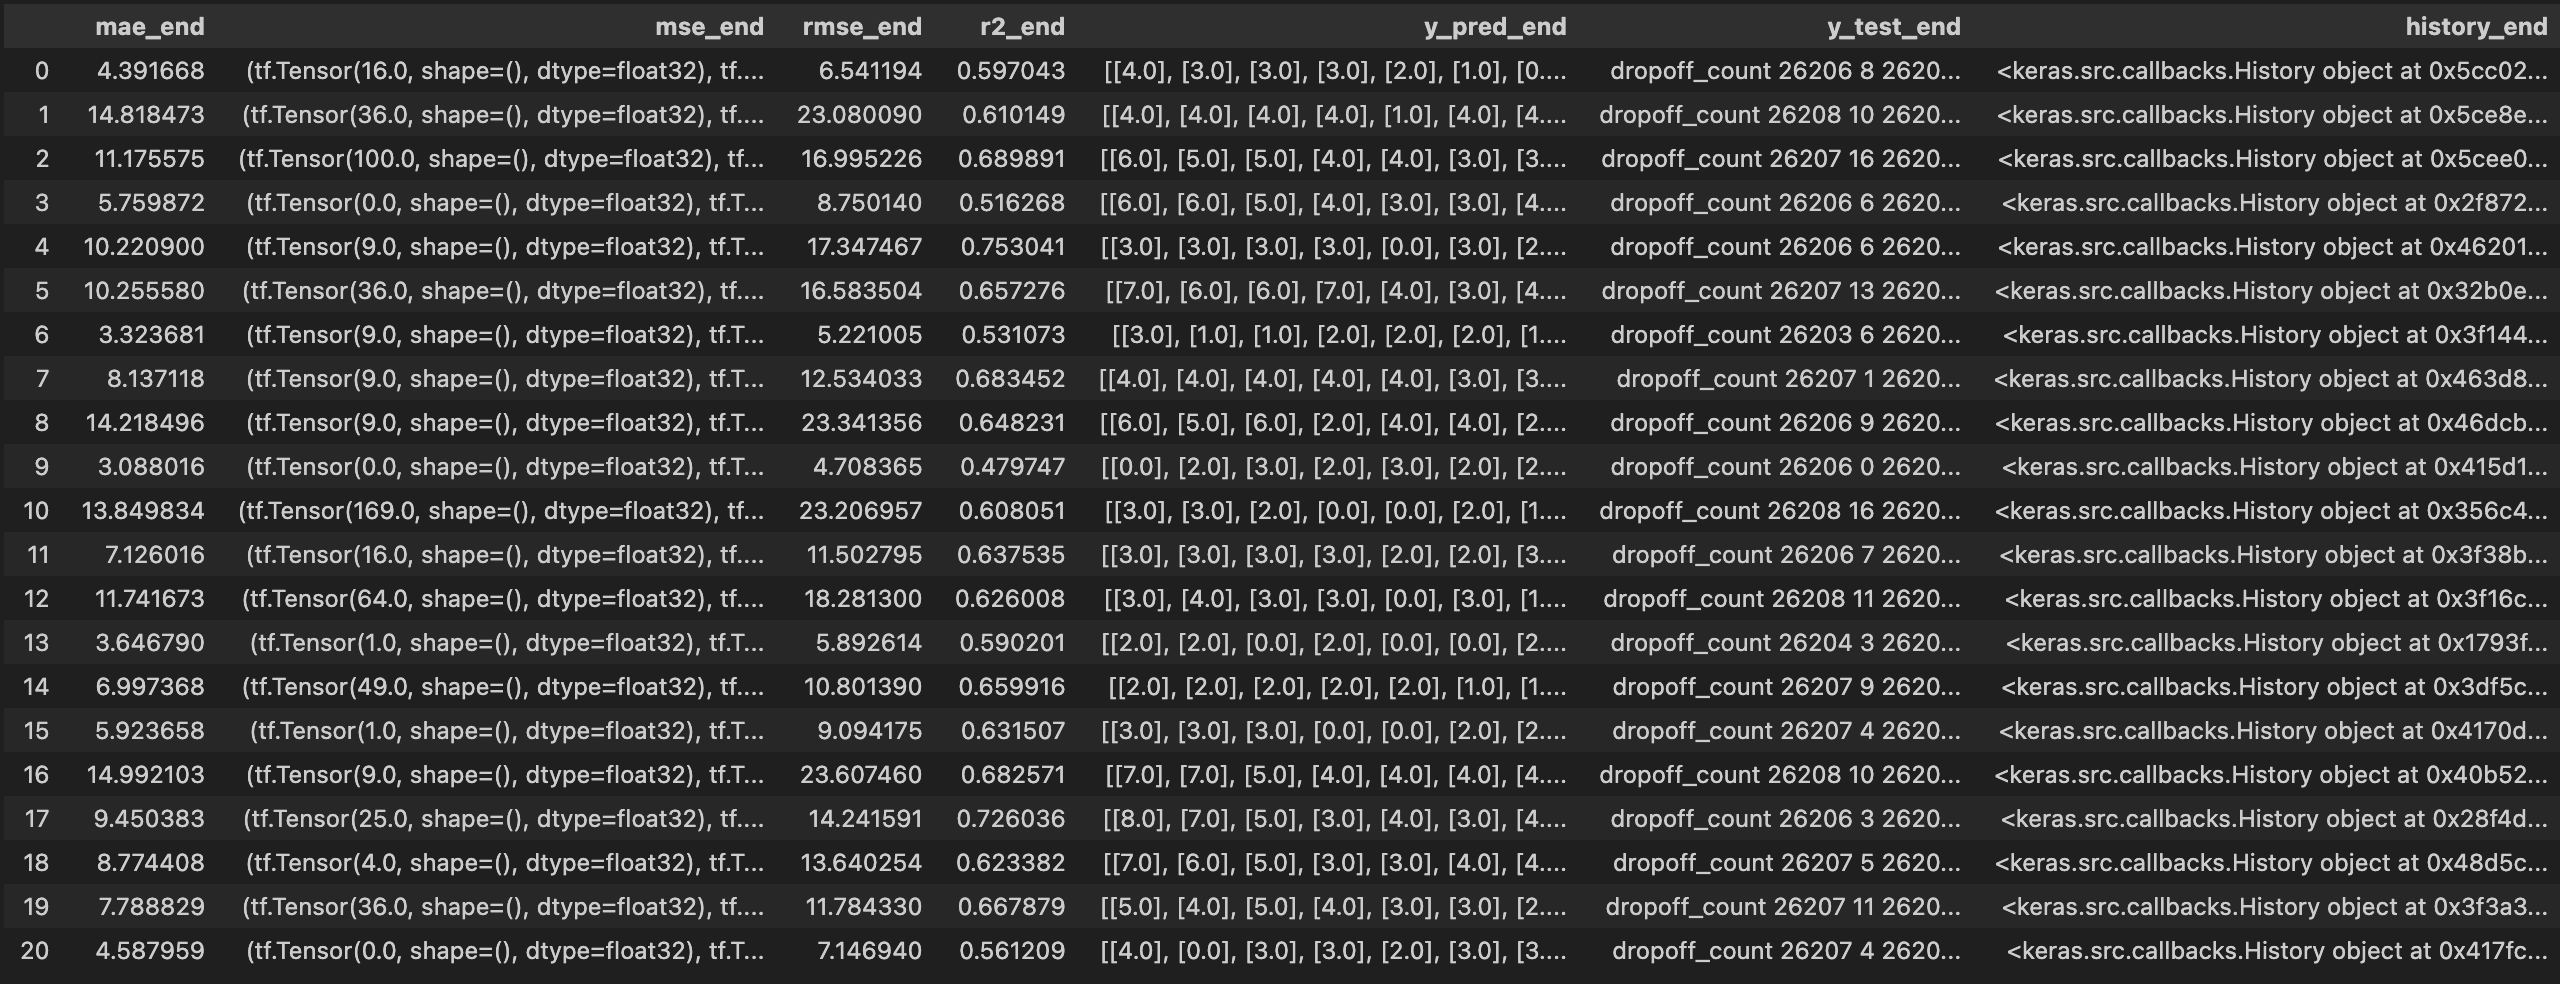


output_df_start
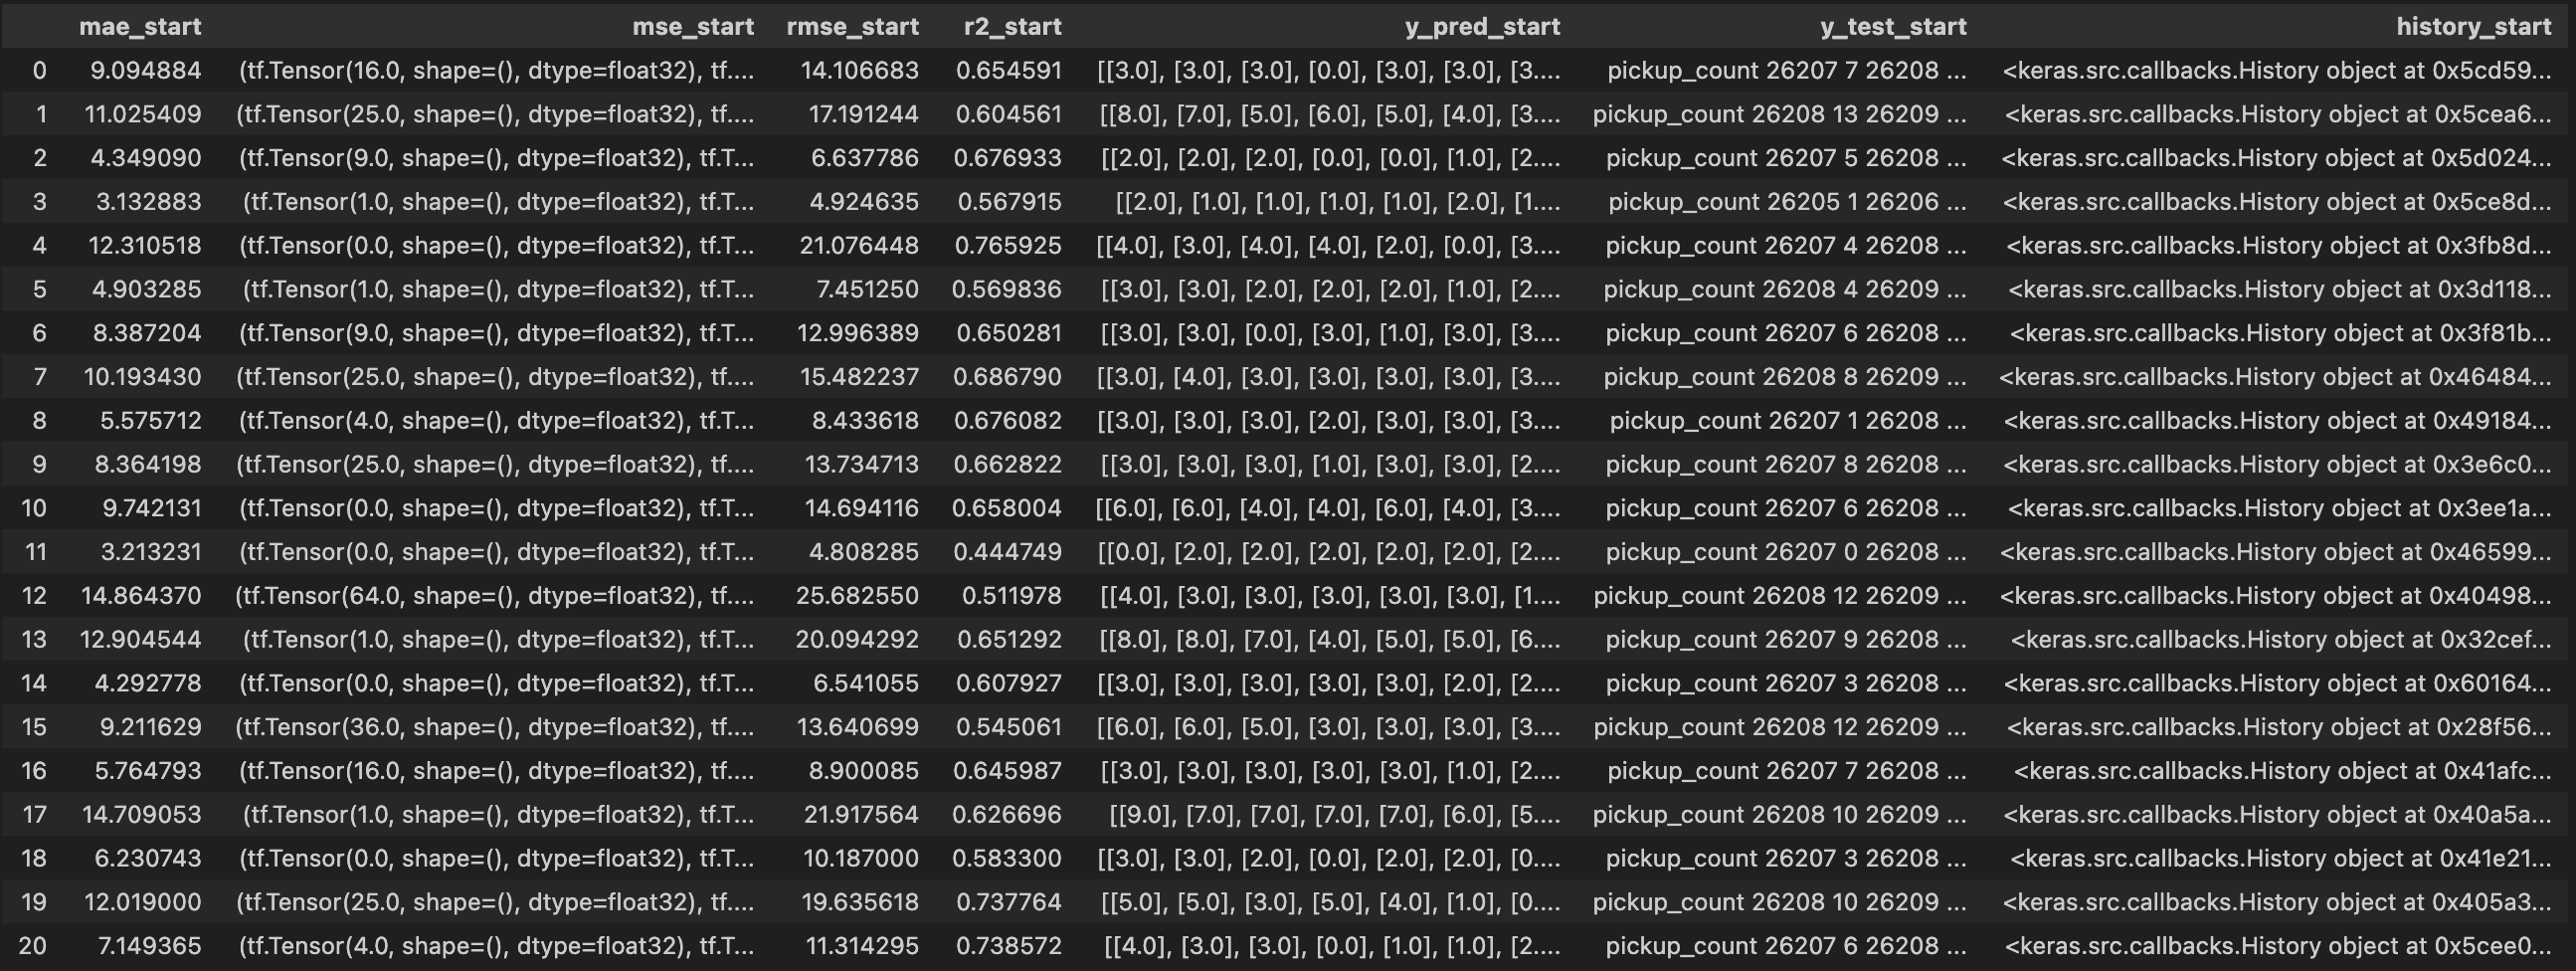

In [330]:
# Turn plots on again. 
plt.ion()

Now we know the predicted number of pick-ups and drop-offs for each cluster of each day. The output_df_end and output_df_start will contain MAE, MSE, RMSE, R2, y_pred, y_test, and history for both the pick-ups and drop-offs resepctively. 

We expect that Bike City will want to conduct a rolling forecast in real life, meaning that they predict the pick-ups and drop-offs for tomorrow, and then after tomorrow has happend, they will take the actual values of tomorrow into their training data, before they predict the consecutive day. 

We can now compute the required number of bikes to be placed at each cluster in the night between day 0 and day 1. 
This is calculated by finding the largest deficit of bikes that each cluster experiences in any 15-minute interval throughout the following day, based on the predicted pick-ups and drop-offs. 

In [364]:
# The largest deficit in any interval so far - initialised at 0 
min_balance = np.zeros(n_clusters)

# Now we loop through each cluster 
for i in range(n_clusters): 

    # Initialize balance 
    live_balance = 0 

    # For each of the 15-minue intervals in the day 
    for t in range(96):

        # Calculate live balance 
        live_balance += output_df_end['y_pred_end'][i][t] - output_df_start['y_pred_start'][i][t]

        # If live balance is smaller than min_balance, we give min_balance a new value 
        if live_balance < min_balance[i]: 
            min_balance[i] = live_balance 

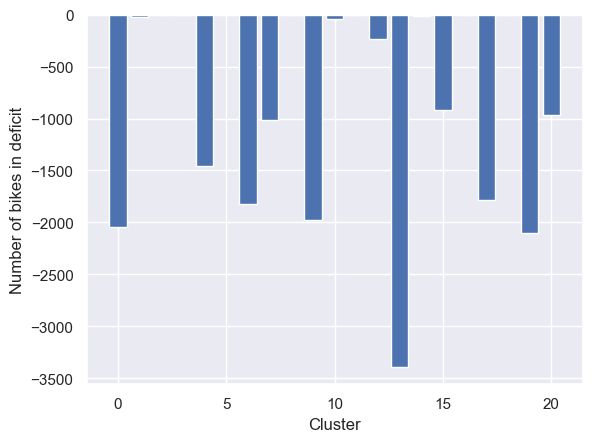

In [365]:
plt.bar(np.arange(n_clusters), min_balance)
plt.xlabel("Cluster") 
plt.ylabel("Number of bikes in deficit") 
plt.show()

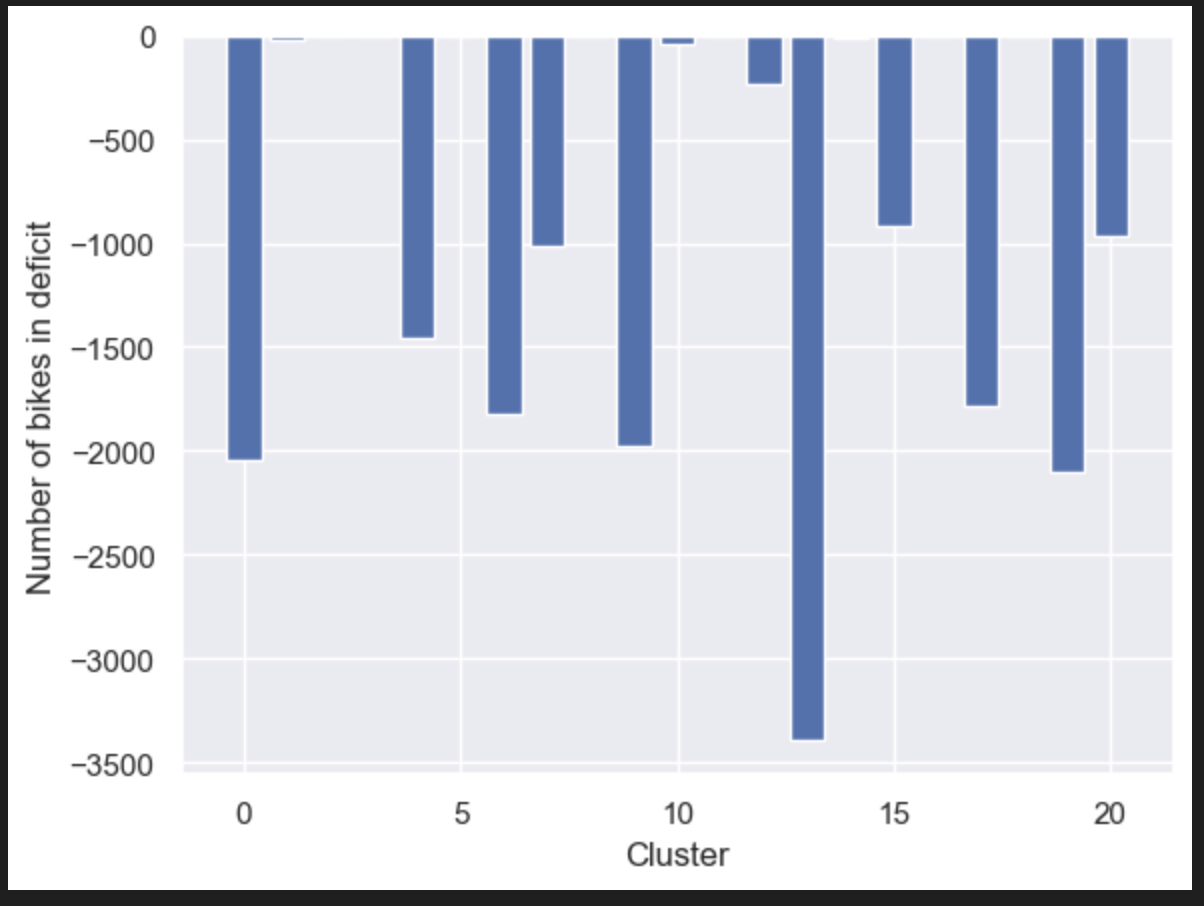

Here we can see that cluster 13 is the cluster with the largest deficit. We can also see that there are some clusters that are not in deficit. We can find those that are in surplus as well. 

In [366]:
num_days = len(y_pred_start) // 96 

repositioning_amount = np.zeros((n_clusters, num_days)) 

for day in range(num_days):
    for i in range(n_clusters):
        # Calculate the net difference for each cluster at the end of the day
        amount = np.sum(output_df_end['y_pred_end'][i][day*96 : (day+1)*96]) - np.sum(output_df_start['y_pred_start'][i][day*96 : (day+1)*96])
        repositioning_amount[i, day] = amount

# Create names
column_names = [f"day{i+1}" for i in range(num_days)]
row_names = [f"cluster{i}" for i in range(n_clusters)]

# Set names
repositioning_amount = pd.DataFrame(repositioning_amount, columns=column_names)
repositioning_amount.index = row_names

In [368]:
# Specify the day you want to focus on
day_to_focus = "day1"

# Find clusters in deficit (negative values) and surplus (positive values)
deficit_clusters = day_data[repositioning_amount[day_to_focus] < 0]
surplus_clusters = day_data[repositioning_amount[day_to_focus] > 0]

# Print the clusters in deficit and surplus
print(f"Clusters in deficit on {day_to_focus}:")
print(deficit_clusters)

print(f"Clusters in durplus on {day_to_focus}:")
print(surplus_clusters) 

Clusters in deficit on day1:
cluster0    -2123.0
cluster4     -794.0
cluster6    -1770.0
cluster7     -797.0
cluster9    -2120.0
cluster12    -816.0
cluster13   -3002.0
cluster15   -1150.0
cluster17   -1650.0
cluster19   -1977.0
cluster20    -564.0
Name: day1, dtype: float64
Clusters in durplus on day1:
cluster1      421.0
cluster2     2859.0
cluster3      413.0
cluster5     1753.0
cluster8     1750.0
cluster10     446.0
cluster11    1679.0
cluster14     803.0
cluster16    3596.0
cluster18    1666.0
Name: day1, dtype: float64


Output: 

Clusters in deficit on day1:
- cluster0    -2123.0
- cluster4     -794.0
- cluster6    -1770.0
- cluster7     -797.0
- cluster9    -2120.0
- cluster12    -816.0
- cluster13   -3002.0
- cluster15   -1150.0
- cluster17   -1650.0
- cluster19   -1977.0
- cluster20    -564.0

Clusters in durplus on day1:
- cluster1      421.0
- cluster2     2859.0
- cluster3      413.0
- cluster5     1753.0
- cluster8     1750.0
- cluster10     446.0
- cluster11    1679.0
- cluster14     803.0
- cluster16    3596.0
- cluster18    1666.0

# Section 4: Conclusions

### **Conclusion**

In conclusion, it proved to be a better prediction to use an ANN rather than a Linear Regression model. 

### **Contributions**

Section 1: Introduction + Data Analysis & Visualizations 
- Data Cleaning: Emma, August & Clara 
- Visualization: Fridtjof 

Section 2: Exploratory Data Analysis 
- EDA - Bike rentals and time usage across time periods: Fridtjof 
- EDA - Classification of demand based on weekdays and weeekends: Fridtjof 

Section 3: Prediction Challenge 
- Clustering: August 
- Predictions - Linear Regression: Emma 
- Predictions, Data Preparations: Emma & Clara 
- Predictions - Artifical Neural Network: Clara 
- Predictions - Required Number of bikes: Clara

Section 4: Conclusions 
- Conclusion: Fridtjof, August, Emma & Clara 

### **Word count**

In [3]:
import json

with open('BAfullproject.ipynb') as json_file:
    data = json.load(json_file)

#print(data)

wordCount = 0
for each in data['cells']:
    cellType = each['cell_type']
    if cellType == "markdown":
        content = each['source']
        for line in content:
            temp = [word for word in line.split() if "#" not in word] # we might need to filter for more markdown keywords here
            wordCount = wordCount + len(temp)
            
print(wordCount)
#We need to reduce number of words for final submission

3423
